# Juno Mag Data - Plotting Bmag, Bx, By and Bz 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime
from scipy.io import readsav
import os
import pandas as pd
import math
import scipy
import numpy.polynomial.polynomial as nppol
import warnings


print('Radio astronomy project')
print('18319184')

Elliot Devon-Hurley
18319184


In [2]:
#Load data from Juno Bmag file
data = np.loadtxt('juno_fgm_b_mag_2016-2020.txt', dtype= 'str')


#Assign the timestamp column
Date = data[:,0]


#Do the same for the mag field amplitude
Bmag = data[:,1].astype(float)


#Change timestamps into datetime format
time_table = [datetime.strptime(i,"%Y-%m-%dT%H:%M:%S.%f") for i in Date]

In [3]:
#Load data from Juno BxByBz file (JSO coordiantes)
data2 = np.loadtxt('juno_fgm_bxbybz_jso_2016-2020.txt', dtype= 'str')


#Assign timestamp column
Date2 = data2[:,0].astype(str)


#Assign BxByBz Data
Bx = data2[:,1].astype(float)


By = data2[:,2].astype(float)

                                                
Bz = data2[:,3].astype(float)

#Change timestamps to dattime format
time_table2 = [datetime.strptime(i,"%Y-%m-%dT%H:%M:%S.%f") for i in Date2]

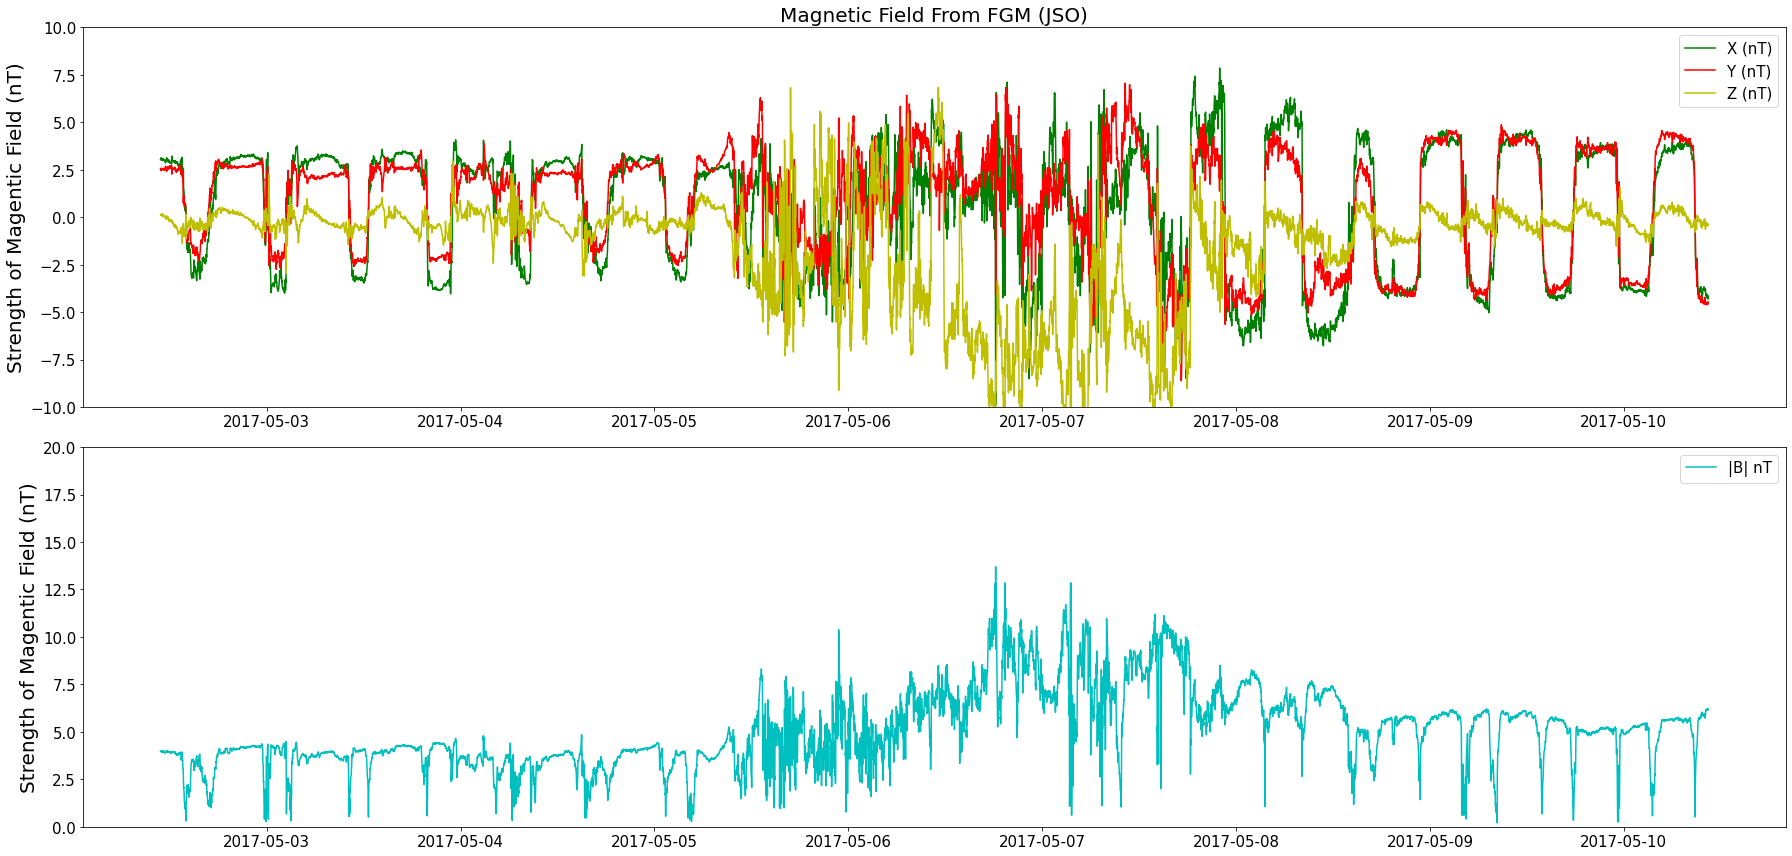

In [4]:
#major_locator =mdates.DayLocator(interval=5) # ticks with label every 5 days
#minor_locator=mdates.DayLocator(interval=1) # ticks every 1 day
#dateFmt = mdates.DateFormatter("%j")


#Producing a plot of the change in BxByBz with time... the slices after each plotted variable refers to choosing a 
#specific date range
plt.figure(figsize=(25,12))
plt.subplot(211)
plt.plot(time_table[419000: 430500], Bx[419000: 430500], "-", color = "g", label = "X (nT)")
plt.plot(time_table2[419000: 430500], By[419000: 430500], "-", color = "r", label = "Y (nT)")
plt.plot(time_table2[419000: 430500], Bz[419000: 430500], "-", color = "y", label = "Z (nT)")
plt.ylabel('Strength of Magentic Field (nT)', fontsize = 20)
plt.legend(fontsize=15)
plt.ylim(-10,10)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.title('Magnetic Field From FGM (JSO)', fontsize = 20)


#Producing a plot of the change in Bmag with time... the slices after each plotted variable refers to choosing a 
#specific date range
plt.subplot(212)
plt.plot(time_table[419000: 430500], Bmag[419000: 430500], "-", color = "c", label = "|B| nT" )
plt.ylabel('Strength of Magentic Field (nT)', fontsize = 20)
plt.legend(fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.ylim(0,20)

plt.tight_layout()
plt.show()

In [4]:
#Load data from Juno BxByBz (IAU Coordinates)
data3 = np.loadtxt('juno_fgm_bxbybz_iau_orbits_2016_2020.txt', dtype= 'str')

#Assign timestamp
Date3 = data3[:,0].astype(str)


#Assign BxByBz
Bx2 = data3[:,1].astype(float)


By2 = data3[:,2].astype(float)


Bz2 = data3[:,3].astype(float)


#Change timestamps to datetime format
time_table3 = [datetime.strptime(i,"%Y-%m-%dT%H:%M:%S.%f") for i in Date3]

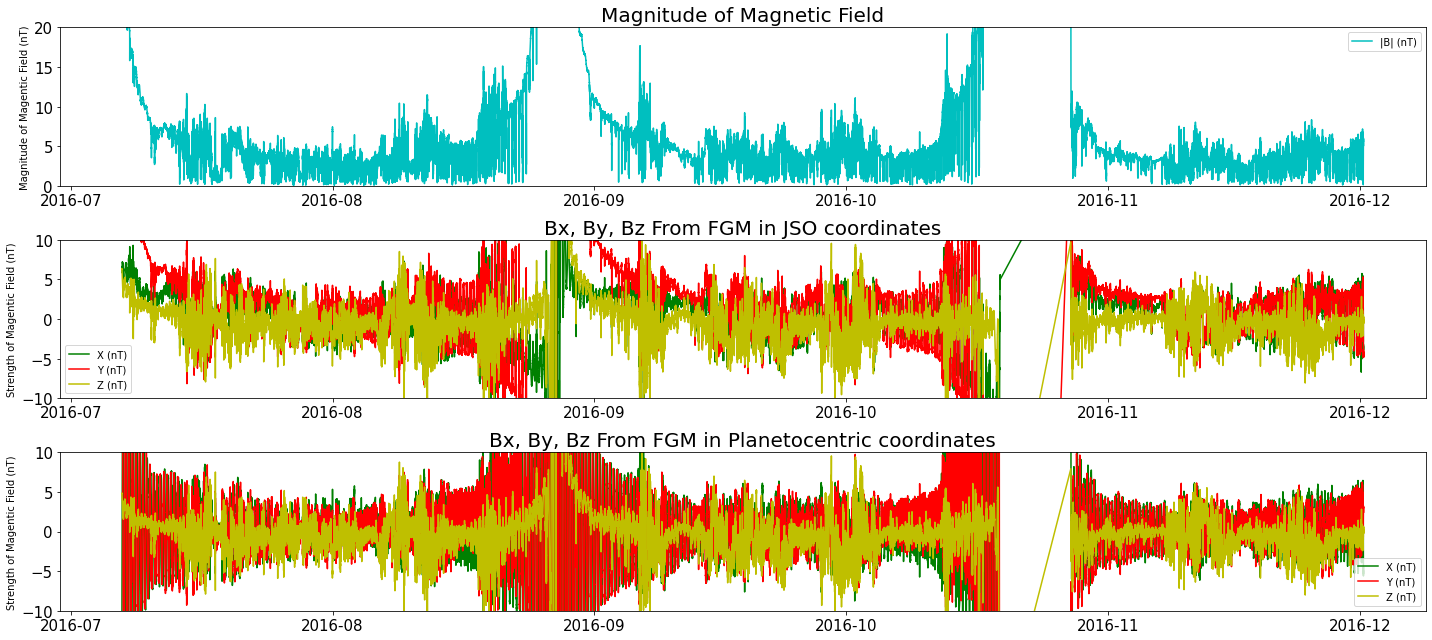

In [5]:
#Final plots of Bmag, BxByBz (JSO), BxByBz (IAU).... I prefer JSO

plt.figure(figsize=(20,9))

plt.subplot(312)
plt.plot(time_table2[0:200000], Bx[0:200000], "-", color = "g", label = "X (nT)")
plt.plot(time_table2[0:200000], By[0:200000], "-", color = "r", label = "Y (nT)")
plt.plot(time_table2[0:200000], Bz[0:200000], "-", color = "y", label = "Z (nT)")
plt.ylabel('Strength of Magentic Field (nT)')
plt.legend(fontsize=10)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.ylim(-10,10)
plt.title('Bx, By, Bz From FGM in JSO coordinates', fontsize = 20)


plt.subplot(313)
plt.plot(time_table3[0:200000], Bx2[0:200000], "-", color = "g", label = "X (nT)")
plt.plot(time_table3[0:200000], By2[0:200000], "-", color = "r", label = "Y (nT)")
plt.plot(time_table3[0:200000], Bz2[0:200000], "-", color = "y", label = "Z (nT)")
plt.ylabel('Strength of Magentic Field (nT)')
plt.legend(fontsize=10)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.ylim(-10,10)
plt.title('Bx, By, Bz From FGM in Planetocentric coordinates', fontsize = 20)


plt.subplot(311)
plt.plot(time_table[0:200000], Bmag[0:200000], "-", color = "c", label = "|B| (nT)" )
plt.ylabel('Magnitude of Magentic Field (nT)')
plt.legend(fontsize=10)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.ylim(0,20)
plt.title('Magnitude of Magnetic Field', fontsize = 20)


plt.tight_layout()
plt.show()

# Ephemeris Data - Radius

In [6]:
#Load Juno Radius File
data4 = np.loadtxt('juno_jup_r_2016-2020.txt', dtype= 'str')

In [7]:
#Assign Timestamp Data
Date4 = data4[:,0].astype(str)

#Change timestamp to datetime format
time_table4 = [datetime.strptime(i,"%Y-%m-%dT%H:%M:%S.%f") for i in Date4]

In [8]:
#Assign Timestamp Data
Radius = data4[:,1].astype(float)


#Printing the first 100 radius
first100Radius = Radius[0:26400]
#print(first100Radius)

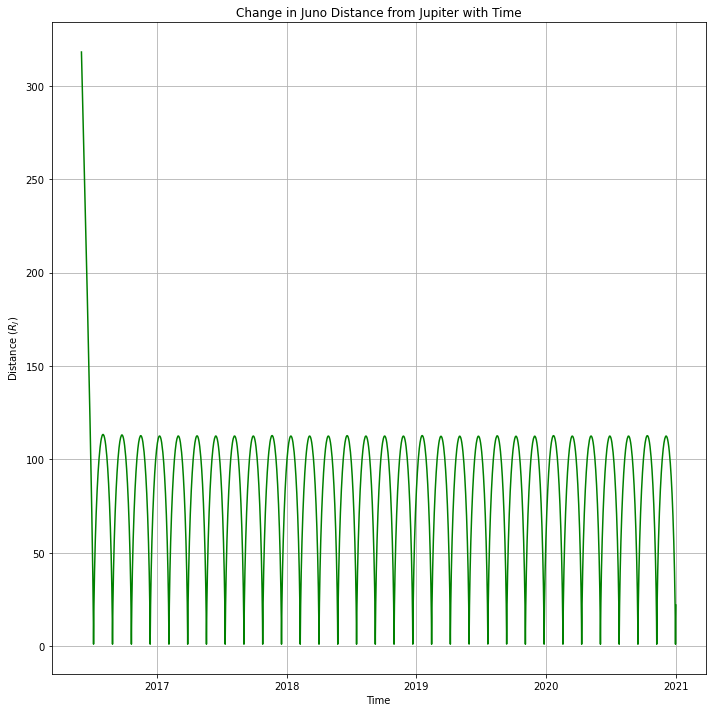

In [9]:
#Plot of the Distance of Juno from Jupiter over time... Useful for locating when orbits begin and end
plt.figure(figsize = (10,10))
plt.plot(time_table4, Radius, '-', color = 'g')
plt.title('Change in Juno Distance from Jupiter with Time')
plt.ylabel('Distance ($R_J$)')
plt.xlabel('Time')
#plt.xlim(datetime.datetime(2016, 6, 1), datetime.datetime(2016, 12, 20))  ##This line will noly work when the datetime.datetime code has been ran below
plt.grid()


plt.tight_layout()
plt.show()

# Trajectory Plots

In [10]:
#Loading in Data from JSO coordinates file
Data5 = np.loadtxt('juno_jup_xyz_jso_2016_2020.txt', dtype= 'str')

XcoordJSO = Data5[:,1].astype(float)

YcoordJSO =Data5[:,2].astype(float)

ZcoordJSO =Data5[:,3].astype(float)




#Loading data from Juno MP crossing file
mp_crossing_edit1 = np.loadtxt('grl55876-sup-0002-2017gl073177-ts01_Edit1.1 copy.csv', delimiter = ',', dtype= 'str')

#Assigning the radius data
distance_mp_edit1 = mp_crossing_edit1[:,5].astype(float)
print(distance_mp_edit1)

#Assigning the DOY data
DOY_mp_edit1 = mp_crossing_edit1[:,1].astype(float)
print(DOY_mp_edit1)


#Assigning the XYZ coordinates of each MP crossing location data
XcoordJSO1 = mp_crossing_edit1[:,6].astype(float)

YcoordJSO1 = mp_crossing_edit1[:,7].astype(float)

ZcoordJSO1 = mp_crossing_edit1[:,8].astype(float)




#Loading data from Juno BS crossing file
bs_crossing_edit1 = np.loadtxt('grl55876-sup-0003-2017gl073177-ts02 Edit_1.1.csv', delimiter = ',', dtype= 'str')

#Assigning the radius data
distance_bs_edit1 = bs_crossing_edit1[:,5].astype(float)
print(distance_bs_edit1)

#Assigning the DOY data
DOY_bs_edit1 = bs_crossing_edit1[:,1].astype(float)
print(DOY_bs_edit1)

#Assigning the XYZ coordinates of each BS crossing location data
XcoordJSO2 = bs_crossing_edit1[:,6].astype(float)

YcoordJSO2 =bs_crossing_edit1[:,7].astype(float)

ZcoordJSO2 =bs_crossing_edit1[:,8].astype(float)




[113.9   84.4   80.    79.7   79.    76.3   73.5   82.    83.7   85.3
  85.7   89.9   98.3   98.6   99.9  100.9  101.5  101.5  104.7  106.5
 106.9  108.4  108.8  109.   113.   113.3  113.3  113.2  113.1  113.1
 113.1  112.9  112.9  109.8  109.6  109.5  107.6  107.3  107.2  107.2
 101.2  100.6  100.1   99.4   99.2   98.3   98.    82.6   84.4   85.3
  91.8  106.3  109.2  111.6  112.01 112.3  112.4  113.   113.   113.1
 113.   110.7  109.   107.5  107.3  106.6  106.5  105.6  105.3  105.
  98.   107.4  107.9  108.1  109.6  109.7  112.6  112.7  112.7  112.7
 112.7  112.7  112.6  111.1  110.9  108.1  104.5  101.8  101.7  101.7
 101.7  101.7  101.6  101.5  101.3  101.   100.1 ]
[177. 180. 181. 181. 181. 181. 181. 196. 197. 197. 197. 198. 201. 201.
 202. 202. 203. 203. 204. 205. 205. 206. 207. 207. 212. 214. 214. 214.
 215. 215. 215. 215. 215. 219. 219. 220. 221. 221. 221. 221. 224. 224.
 225. 225. 225. 225. 225. 250. 250. 251. 252. 258. 260. 263. 263. 264.
 264. 266. 266. 267. 267. 272. 273. 

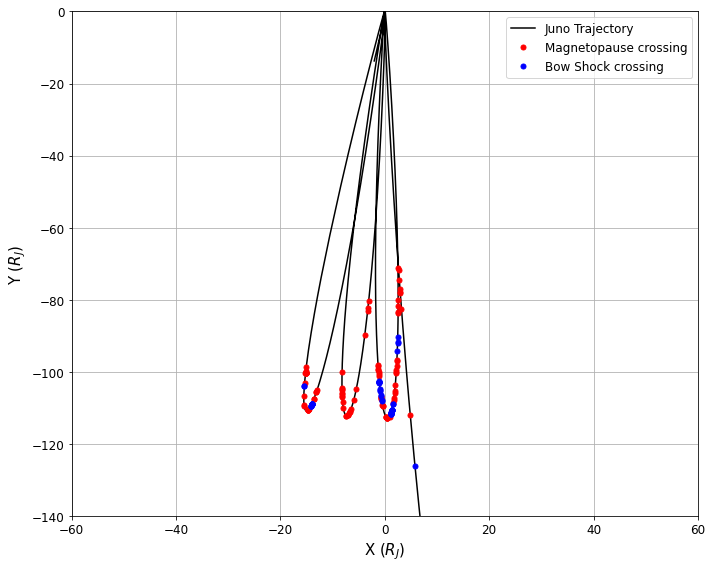

In [11]:
#Plotting a figure to show the orbital trajectory of Juno in the XY plane. Also containing the Known BS and Mp 
#Crossing locations on said trajectory
plt.figure(figsize = (10,8))
plt.plot(XcoordJSO[5000:56000], YcoordJSO[5000:56000], color = 'k', label = 'Juno Trajectory')
plt.plot(XcoordJSO1[0:97], YcoordJSO1[0:97], 'o', color = 'r', label = 'Magnetopause crossing', markersize = 5)
plt.plot(XcoordJSO2[0:51], YcoordJSO2[0:51], 'o', color = 'b', label = 'Bow Shock crossing', markersize = 5)
plt.ylim(-140,0)
plt.xlim(-60,60)
plt.xlabel('X $(R_J)$',fontsize = 15)
plt.ylabel('Y $(R_J)$',fontsize = 15)
plt.grid()
plt.legend(fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.tight_layout()

plt.show()

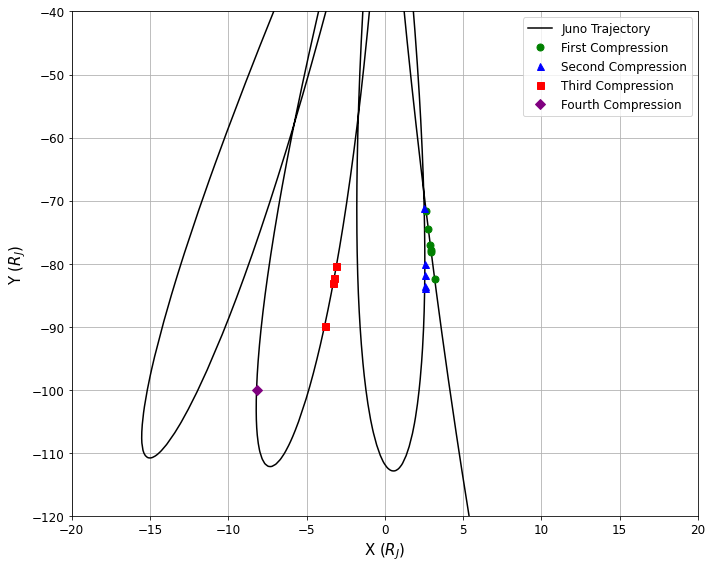

In [12]:
#Plot for report showing the crossings that indicated compression
plt.figure(figsize = (10,8))
plt.plot(XcoordJSO[5000:56000], YcoordJSO[5000:56000], color = 'k', label = 'Juno Trajectory')
plt.plot(XcoordJSO1[1:7], YcoordJSO1[1:7], 'o', color = 'green', label = 'First Compression', markersize = 7)
plt.plot(XcoordJSO1[7:12], YcoordJSO1[7:12], '^', color = 'blue', label = 'Second Compression', markersize = 7)
plt.plot(XcoordJSO1[47:51], YcoordJSO1[47:51], 's', color = 'red', label = 'Third Compression', markersize = 7)
plt.plot(XcoordJSO1[70], YcoordJSO1[70], 'D', color = 'purple', label = 'Fourth Compression', markersize = 7)
plt.ylim(-140,0)
plt.xlim(-60,60)
plt.xlabel('X $(R_J)$',fontsize = 15)
plt.ylabel('Y $(R_J)$',fontsize = 15)
plt.grid()
plt.legend(fontsize = 15)
plt.legend(fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlim(-20, 20)
plt.ylim(-120, -40)
plt.tight_layout()

plt.show()

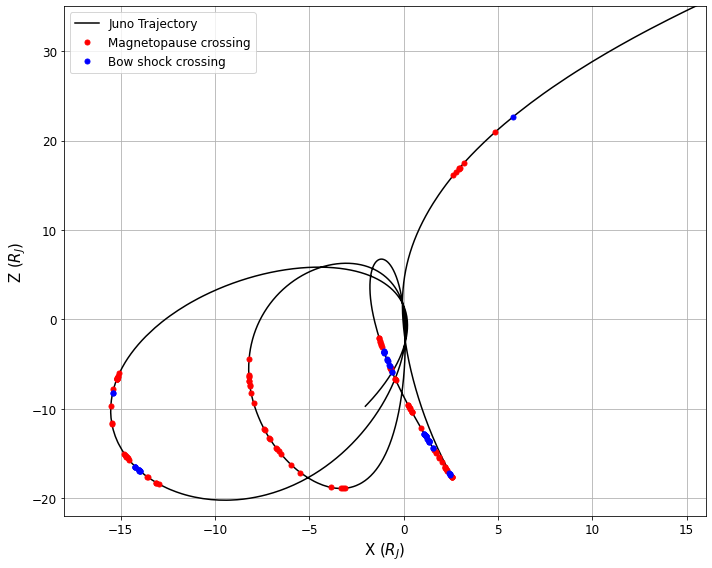

In [13]:
#Same figure as above in XZ Plane
plt.figure(figsize = (10,8))
plt.plot(XcoordJSO[0:56000], ZcoordJSO[0:56000], color = 'k', label = 'Juno Trajectory')
plt.plot(XcoordJSO1[0:97], ZcoordJSO1[0:97], 'o', color = 'r', label = 'Magnetopause crossing', markersize = 5)
plt.plot(XcoordJSO2[0:51], ZcoordJSO2[0:51], 'o', color = 'b', label = 'Bow shock crossing', markersize = 5)

plt.xlabel('X $(R_J)$',fontsize = 15)
plt.ylabel('Z $(R_J)$',fontsize = 15)
plt.legend(fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlim(-18, 16)
plt.ylim(-22, 35)
plt.grid()

plt.tight_layout()
plt.show()

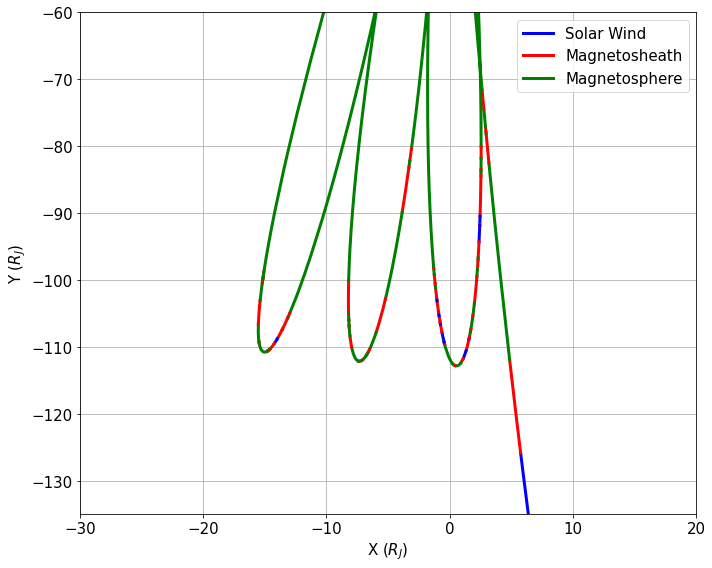

In [14]:
#Figure 4 Hospodarksy Paper - a colour coded plot showing what region of the magnetosphere the spacecraft is in.
plt.figure(figsize = (10,8))
plt.plot(XcoordJSO[0:6725], YcoordJSO[0:6725], color = 'b', label = 'Solar Wind', linewidth = 3)
plt.plot(XcoordJSO[6725:7167], YcoordJSO[6725:7167], color = 'r', label = 'Magnetosheath', linewidth = 3)
plt.plot(XcoordJSO[7167:8044], YcoordJSO[7167:8044], color = 'g', label = 'Magnetosphere', linewidth = 3)
plt.plot(XcoordJSO[8044:8167], YcoordJSO[8044:8167], color = 'r', linewidth = 3)
plt.plot(XcoordJSO[8167:8176], YcoordJSO[8167:8176], color = 'g', linewidth = 3)
plt.plot(XcoordJSO[8176:8196], YcoordJSO[8176:8196], color = 'r', linewidth = 3)
plt.plot(XcoordJSO[8196:8270], YcoordJSO[8196:8270], color = 'g', linewidth = 3)
plt.plot(XcoordJSO[8270:8347], YcoordJSO[8270:8347], color = 'r', linewidth = 3)
plt.plot(XcoordJSO[8347:12639], YcoordJSO[8347:12639], color = 'g', linewidth = 3)
plt.plot(XcoordJSO[12639:12758], YcoordJSO[12639:12758], color = 'r', linewidth = 3)
plt.plot(XcoordJSO[12758:12876], YcoordJSO[12758:12876], color = 'g', linewidth = 3)
plt.plot(XcoordJSO[12876:12901], YcoordJSO[12876:12901], color = 'r', linewidth = 3)
plt.plot(XcoordJSO[12901:12948], YcoordJSO[12901:12948], color = 'g', linewidth = 3)
plt.plot(XcoordJSO[12948:13434], YcoordJSO[12948:13434], color = 'r', linewidth = 3)
plt.plot(XcoordJSO[13434:13551], YcoordJSO[13434:13551], color = 'b', linewidth = 3)
plt.plot(XcoordJSO[13551:13563], YcoordJSO[13551:13563], color = 'r', linewidth = 3)
plt.plot(XcoordJSO[13563:13791], YcoordJSO[13563:13791], color = 'b', linewidth = 3)
plt.plot(XcoordJSO[13791:14032], YcoordJSO[13791:14032], color = 'r', linewidth = 3)
plt.plot(XcoordJSO[14032:14072], YcoordJSO[14032:14072], color = 'g', linewidth = 3)
plt.plot(XcoordJSO[14072:14223], YcoordJSO[14072:14223], color = 'r', linewidth = 3)
plt.plot(XcoordJSO[14223:14342], YcoordJSO[14223:14342], color = 'g', linewidth = 3)
plt.plot(XcoordJSO[14342:14421], YcoordJSO[14342:14421], color = 'r', linewidth = 3)
plt.plot(XcoordJSO[14421:14423], YcoordJSO[14421:14423], color = 'g', linewidth = 3)
plt.plot(XcoordJSO[14423:14861], YcoordJSO[14423:14861], color = 'r', linewidth = 3)
plt.plot(XcoordJSO[14861:15144], YcoordJSO[14861:15144], color = 'g', linewidth = 3)
plt.plot(XcoordJSO[15144:15214], YcoordJSO[15144:15214], color = 'r', linewidth = 3)
plt.plot(XcoordJSO[15214:15489], YcoordJSO[15214:15489], color = 'g', linewidth = 3)
plt.plot(XcoordJSO[15489:15566], YcoordJSO[15489:15566], color = 'r', linewidth = 3)
plt.plot(XcoordJSO[15566:15726], YcoordJSO[15566:15726], color = 'g', linewidth = 3)
plt.plot(XcoordJSO[15726:15816], YcoordJSO[15726:15816], color = 'r', linewidth = 3)
plt.plot(XcoordJSO[15816:15825], YcoordJSO[15816:15825], color = 'b', linewidth = 3)
plt.plot(XcoordJSO[15825:16241], YcoordJSO[15825:16241], color = 'r', linewidth = 3)
plt.plot(XcoordJSO[16241:16667], YcoordJSO[16241:16667], color = 'b', linewidth = 3)
plt.plot(XcoordJSO[16667:16995], YcoordJSO[16667:16995], color = 'r', linewidth = 3)
plt.plot(XcoordJSO[16995:17802], YcoordJSO[16995:17802], color = 'g', linewidth = 3)
plt.plot(XcoordJSO[17802:18129], YcoordJSO[17802:18129], color = 'r', linewidth = 3)
plt.plot(XcoordJSO[18129:19246], YcoordJSO[18129:19246], color = 'g', linewidth = 3)
plt.plot(XcoordJSO[19246:19293], YcoordJSO[19246:19293], color = 'r', linewidth = 3)
plt.plot(XcoordJSO[19293:19311], YcoordJSO[19293:19311], color = 'g', linewidth = 3)
plt.plot(XcoordJSO[19311:19627], YcoordJSO[19311:19627], color = 'b', linewidth = 3)
plt.plot(XcoordJSO[19627:19855], YcoordJSO[19627:19855], color = 'r', linewidth = 3)
plt.plot(XcoordJSO[19855:19911], YcoordJSO[19855:19911], color = 'b', linewidth = 3)
plt.plot(XcoordJSO[19911:20063], YcoordJSO[19911:20063], color = 'r', linewidth = 3)
plt.plot(XcoordJSO[20063:20149], YcoordJSO[20063:20149], color = 'b', linewidth = 3)
plt.plot(XcoordJSO[20149:20396], YcoordJSO[20149:20396], color = 'r', linewidth = 3)
plt.plot(XcoordJSO[20396:20467], YcoordJSO[20396:20467], color = 'b', linewidth = 3)
plt.plot(XcoordJSO[20467:20653], YcoordJSO[20467:20653], color = 'r', linewidth = 3)
plt.plot(XcoordJSO[20653:20728], YcoordJSO[20653:20728], color = 'g', linewidth = 3)
plt.plot(XcoordJSO[20728:20887], YcoordJSO[20728:20887], color = 'r', linewidth = 3)
plt.plot(XcoordJSO[20887:20989], YcoordJSO[20887:20989], color = 'g', linewidth = 3)
plt.plot(XcoordJSO[20989:21022], YcoordJSO[20989:21022], color = 'r', linewidth = 3)
plt.plot(XcoordJSO[21022:28066], YcoordJSO[21022:28066], color = 'g', linewidth = 3)
plt.plot(XcoordJSO[28066:28196], YcoordJSO[28066:28196], color = 'r', linewidth = 3)
plt.plot(XcoordJSO[28196:28261], YcoordJSO[28196:28261], color = 'g', linewidth = 3)
plt.plot(XcoordJSO[28261:28797], YcoordJSO[28261:28797], color = 'r', linewidth = 3)
plt.plot(XcoordJSO[28797:30224], YcoordJSO[28797:30224], color = 'g', linewidth = 3)
plt.plot(XcoordJSO[30224:31076], YcoordJSO[30224:31076], color = 'r', linewidth = 3)
plt.plot(XcoordJSO[31076:31763], YcoordJSO[31076:31763], color = 'g', linewidth = 3)
plt.plot(XcoordJSO[31763:31926], YcoordJSO[31763:31926], color = 'r', linewidth = 3)
plt.plot(XcoordJSO[31926:32051], YcoordJSO[31926:32051], color = 'g', linewidth = 3)
plt.plot(XcoordJSO[32051:32126], YcoordJSO[32051:32126], color = 'r', linewidth = 3)
plt.plot(XcoordJSO[32126:32572], YcoordJSO[32126:32572], color = 'g', linewidth = 3)
plt.plot(XcoordJSO[32572:32658], YcoordJSO[32572:32658], color = 'r', linewidth = 3)
plt.plot(XcoordJSO[32658:33048], YcoordJSO[32658:33048], color = 'g', linewidth = 3)
plt.plot(XcoordJSO[33048:33083], YcoordJSO[33048:33083], color = 'r', linewidth = 3)
plt.plot(XcoordJSO[33083:34289], YcoordJSO[33083:34289], color = 'g', linewidth = 3)
plt.plot(XcoordJSO[34289:34715], YcoordJSO[34289:34715], color = 'r', linewidth = 3)
plt.plot(XcoordJSO[34715:35005], YcoordJSO[34715:35005], color = 'g', linewidth = 3)
plt.plot(XcoordJSO[35005:35045], YcoordJSO[35005:35045], color = 'r', linewidth = 3)
plt.plot(XcoordJSO[35045:35181], YcoordJSO[35045:35181], color = 'g', linewidth = 3)
plt.plot(XcoordJSO[35181:35202], YcoordJSO[35181:35202], color = 'r', linewidth = 3)
plt.plot(XcoordJSO[35202:35347], YcoordJSO[35202:35347], color = 'g', linewidth = 3)
plt.plot(XcoordJSO[35347:35395], YcoordJSO[35347:35395], color = 'r', linewidth = 3)
plt.plot(XcoordJSO[35395:35435], YcoordJSO[35395:35435], color = 'g', linewidth = 3)
plt.plot(XcoordJSO[35435:36053], YcoordJSO[35435:36053], color = 'r', linewidth = 3)
plt.plot(XcoordJSO[36053:46075], YcoordJSO[36053:46075], color = 'g', linewidth = 3)
plt.plot(XcoordJSO[46075:46186], YcoordJSO[46075:46186], color = 'r', linewidth = 3)
plt.plot(XcoordJSO[46186:46216], YcoordJSO[46186:46216], color = 'g', linewidth = 3)
plt.plot(XcoordJSO[46216:46576], YcoordJSO[46216:46576], color = 'r', linewidth = 3)
plt.plot(XcoordJSO[46576:46584], YcoordJSO[46576:46584], color = 'g', linewidth = 3)
plt.plot(XcoordJSO[46584:46973], YcoordJSO[46584:46973], color = 'r', linewidth = 3)
plt.plot(XcoordJSO[46973:47222], YcoordJSO[46973:47222], color = 'b', linewidth = 3)
plt.plot(XcoordJSO[47222:47620], YcoordJSO[47222:47620], color = 'r', linewidth = 3)
plt.plot(XcoordJSO[47620:47700], YcoordJSO[47620:47700], color = 'g', linewidth = 3)
plt.plot(XcoordJSO[47700:47757], YcoordJSO[47700:47757], color = 'r', linewidth = 3)
plt.plot(XcoordJSO[47757:47778], YcoordJSO[47757:47778], color = 'g', linewidth = 3)
plt.plot(XcoordJSO[47778:47815], YcoordJSO[47778:47815], color = 'r', linewidth = 3)
plt.plot(XcoordJSO[47815:47867], YcoordJSO[47815:47867], color = 'g', linewidth = 3)
plt.plot(XcoordJSO[47867:47937], YcoordJSO[47867:47937], color = 'r', linewidth = 3)
plt.plot(XcoordJSO[47937:49320], YcoordJSO[47937:49320], color = 'g', linewidth = 3)
plt.plot(XcoordJSO[49320:49383], YcoordJSO[49320:49383], color = 'r', linewidth = 3)
plt.plot(XcoordJSO[49383:50094], YcoordJSO[49383:50094], color = 'g', linewidth = 3)
plt.plot(XcoordJSO[50094:50600], YcoordJSO[50094:50600], color = 'r', linewidth = 3)
plt.plot(XcoordJSO[50600:50601], YcoordJSO[50600:50601], color = 'b', linewidth = 3)
plt.plot(XcoordJSO[50601:50736], YcoordJSO[50601:50736], color = 'r', linewidth = 3)
plt.plot(XcoordJSO[50736:51122], YcoordJSO[50736:51122], color = 'g', linewidth = 3)
plt.plot(XcoordJSO[51122:51186], YcoordJSO[51122:51186], color = 'r', linewidth = 3)
plt.plot(XcoordJSO[51186:51223], YcoordJSO[51186:51223], color = 'g', linewidth = 3)
plt.plot(XcoordJSO[51223:51337], YcoordJSO[51223:51337], color = 'r', linewidth = 3)
plt.plot(XcoordJSO[51186:56000], YcoordJSO[51186:56000], color = 'g', linewidth = 3)
plt.ylim(-135,-60)
plt.xlim(-30,20)

plt.xlabel('X $(R_J)$',fontsize = 15)
plt.ylabel('Y $(R_J)$',fontsize = 15)
plt.grid()
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend(fontsize=15)

plt.tight_layout()

plt.show()

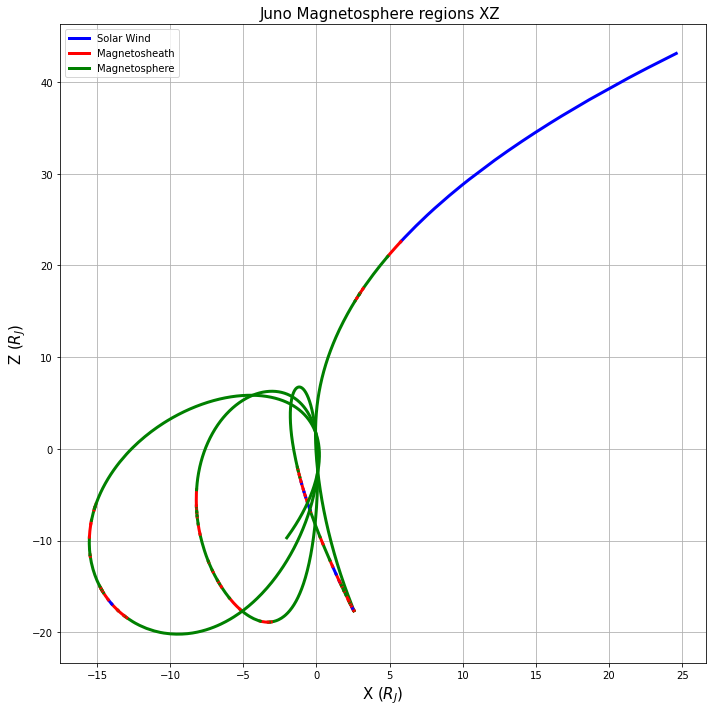

In [15]:
#Figure 4 Hospodarsky in the XZ plane - a colour coded plot showing what region of the magnetosphere the spacecraft is in.

plt.figure(figsize = (10,10))
plt.plot(XcoordJSO[0:6725], ZcoordJSO[0:6725], color = 'b', label = 'Solar Wind', linewidth = 3)
plt.plot(XcoordJSO[6725:7167], ZcoordJSO[6725:7167], color = 'r', label = 'Magnetosheath', linewidth = 3)
plt.plot(XcoordJSO[7167:8044], ZcoordJSO[7167:8044], color = 'g', label = 'Magnetosphere', linewidth = 3)
plt.plot(XcoordJSO[8044:8167], ZcoordJSO[8044:8167], color = 'r', linewidth = 3)
plt.plot(XcoordJSO[8167:8176], ZcoordJSO[8167:8176], color = 'g', linewidth = 3)
plt.plot(XcoordJSO[8176:8196], ZcoordJSO[8176:8196], color = 'r', linewidth = 3)
plt.plot(XcoordJSO[8196:8270], ZcoordJSO[8196:8270], color = 'g', linewidth = 3)
plt.plot(XcoordJSO[8270:8347], ZcoordJSO[8270:8347], color = 'r', linewidth = 3)
plt.plot(XcoordJSO[8347:12639], ZcoordJSO[8347:12639], color = 'g', linewidth = 3)
plt.plot(XcoordJSO[12639:12758], ZcoordJSO[12639:12758], color = 'r', linewidth = 3)
plt.plot(XcoordJSO[12758:12876], ZcoordJSO[12758:12876], color = 'g', linewidth = 3)
plt.plot(XcoordJSO[12876:12901], ZcoordJSO[12876:12901], color = 'r', linewidth = 3)
plt.plot(XcoordJSO[12901:12948], ZcoordJSO[12901:12948], color = 'g', linewidth = 3)
plt.plot(XcoordJSO[12948:13434], ZcoordJSO[12948:13434], color = 'r', linewidth = 3)
plt.plot(XcoordJSO[13434:13551], ZcoordJSO[13434:13551], color = 'b', linewidth = 3)
plt.plot(XcoordJSO[13551:13563], ZcoordJSO[13551:13563], color = 'r', linewidth = 3)
plt.plot(XcoordJSO[13563:13791], ZcoordJSO[13563:13791], color = 'b', linewidth = 3)
plt.plot(XcoordJSO[13791:14032], ZcoordJSO[13791:14032], color = 'r', linewidth = 3)
plt.plot(XcoordJSO[14032:14072], ZcoordJSO[14032:14072], color = 'g', linewidth = 3)
plt.plot(XcoordJSO[14072:14223], ZcoordJSO[14072:14223], color = 'r', linewidth = 3)
plt.plot(XcoordJSO[14223:14342], ZcoordJSO[14223:14342], color = 'g', linewidth = 3)
plt.plot(XcoordJSO[14342:14421], ZcoordJSO[14342:14421], color = 'r', linewidth = 3)
plt.plot(XcoordJSO[14421:14423], ZcoordJSO[14421:14423], color = 'g', linewidth = 3)
plt.plot(XcoordJSO[14423:14861], ZcoordJSO[14423:14861], color = 'r', linewidth = 3)
plt.plot(XcoordJSO[14861:15144], ZcoordJSO[14861:15144], color = 'g', linewidth = 3)
plt.plot(XcoordJSO[15144:15214], ZcoordJSO[15144:15214], color = 'r', linewidth = 3)
plt.plot(XcoordJSO[15214:15489], ZcoordJSO[15214:15489], color = 'g', linewidth = 3)
plt.plot(XcoordJSO[15489:15566], ZcoordJSO[15489:15566], color = 'r', linewidth = 3)
plt.plot(XcoordJSO[15566:15726], ZcoordJSO[15566:15726], color = 'g', linewidth = 3)
plt.plot(XcoordJSO[15726:15816], ZcoordJSO[15726:15816], color = 'r', linewidth = 3)
plt.plot(XcoordJSO[15816:15825], ZcoordJSO[15816:15825], color = 'b', linewidth = 3)
plt.plot(XcoordJSO[15825:16241], ZcoordJSO[15825:16241], color = 'r', linewidth = 3)
plt.plot(XcoordJSO[16241:16667], ZcoordJSO[16241:16667], color = 'b', linewidth = 3)
plt.plot(XcoordJSO[16667:16995], ZcoordJSO[16667:16995], color = 'r', linewidth = 3)
plt.plot(XcoordJSO[16995:17802], ZcoordJSO[16995:17802], color = 'g', linewidth = 3)
plt.plot(XcoordJSO[17802:18129], ZcoordJSO[17802:18129], color = 'r', linewidth = 3)
plt.plot(XcoordJSO[18129:19246], ZcoordJSO[18129:19246], color = 'g', linewidth = 3)
plt.plot(XcoordJSO[19246:19293], ZcoordJSO[19246:19293], color = 'r', linewidth = 3)
plt.plot(XcoordJSO[19293:19311], ZcoordJSO[19293:19311], color = 'g', linewidth = 3)
plt.plot(XcoordJSO[19311:19627], ZcoordJSO[19311:19627], color = 'b', linewidth = 3)
plt.plot(XcoordJSO[19627:19855], ZcoordJSO[19627:19855], color = 'r', linewidth = 3)
plt.plot(XcoordJSO[19855:19911], ZcoordJSO[19855:19911], color = 'b', linewidth = 3)
plt.plot(XcoordJSO[19911:20063], ZcoordJSO[19911:20063], color = 'r', linewidth = 3)
plt.plot(XcoordJSO[20063:20149], ZcoordJSO[20063:20149], color = 'b', linewidth = 3)
plt.plot(XcoordJSO[20149:20396], ZcoordJSO[20149:20396], color = 'r', linewidth = 3)
plt.plot(XcoordJSO[20396:20467], ZcoordJSO[20396:20467], color = 'b', linewidth = 3)
plt.plot(XcoordJSO[20467:20653], ZcoordJSO[20467:20653], color = 'r', linewidth = 3)
plt.plot(XcoordJSO[20653:20728], ZcoordJSO[20653:20728], color = 'g', linewidth = 3)
plt.plot(XcoordJSO[20728:20887], ZcoordJSO[20728:20887], color = 'r', linewidth = 3)
plt.plot(XcoordJSO[20887:20989], ZcoordJSO[20887:20989], color = 'g', linewidth = 3)
plt.plot(XcoordJSO[20989:21022], ZcoordJSO[20989:21022], color = 'r', linewidth = 3)
plt.plot(XcoordJSO[21022:28066], ZcoordJSO[21022:28066], color = 'g', linewidth = 3)
plt.plot(XcoordJSO[28066:28196], ZcoordJSO[28066:28196], color = 'r', linewidth = 3)
plt.plot(XcoordJSO[28196:28261], ZcoordJSO[28196:28261], color = 'g', linewidth = 3)
plt.plot(XcoordJSO[28261:28797], ZcoordJSO[28261:28797], color = 'r', linewidth = 3)
plt.plot(XcoordJSO[28797:30224], ZcoordJSO[28797:30224], color = 'g', linewidth = 3)
plt.plot(XcoordJSO[30224:31076], ZcoordJSO[30224:31076], color = 'r', linewidth = 3)
plt.plot(XcoordJSO[31076:31763], ZcoordJSO[31076:31763], color = 'g', linewidth = 3)
plt.plot(XcoordJSO[31763:31926], ZcoordJSO[31763:31926], color = 'r', linewidth = 3)
plt.plot(XcoordJSO[31926:32051], ZcoordJSO[31926:32051], color = 'g', linewidth = 3)
plt.plot(XcoordJSO[32051:32126], ZcoordJSO[32051:32126], color = 'r', linewidth = 3)
plt.plot(XcoordJSO[32126:32572], ZcoordJSO[32126:32572], color = 'g', linewidth = 3)
plt.plot(XcoordJSO[32572:32658], ZcoordJSO[32572:32658], color = 'r', linewidth = 3)
plt.plot(XcoordJSO[32658:33048], ZcoordJSO[32658:33048], color = 'g', linewidth = 3)
plt.plot(XcoordJSO[33048:33083], ZcoordJSO[33048:33083], color = 'r', linewidth = 3)
plt.plot(XcoordJSO[33083:34289], ZcoordJSO[33083:34289], color = 'g', linewidth = 3)
plt.plot(XcoordJSO[34289:34715], ZcoordJSO[34289:34715], color = 'r', linewidth = 3)
plt.plot(XcoordJSO[34715:35005], ZcoordJSO[34715:35005], color = 'g', linewidth = 3)
plt.plot(XcoordJSO[35005:35045], ZcoordJSO[35005:35045], color = 'r', linewidth = 3)
plt.plot(XcoordJSO[35045:35181], ZcoordJSO[35045:35181], color = 'g', linewidth = 3)
plt.plot(XcoordJSO[35181:35202], ZcoordJSO[35181:35202], color = 'r', linewidth = 3)
plt.plot(XcoordJSO[35202:35347], ZcoordJSO[35202:35347], color = 'g', linewidth = 3)
plt.plot(XcoordJSO[35347:35395], ZcoordJSO[35347:35395], color = 'r', linewidth = 3)
plt.plot(XcoordJSO[35395:35435], ZcoordJSO[35395:35435], color = 'g', linewidth = 3)
plt.plot(XcoordJSO[35435:36053], ZcoordJSO[35435:36053], color = 'r', linewidth = 3)
plt.plot(XcoordJSO[36053:46075], ZcoordJSO[36053:46075], color = 'g', linewidth = 3)
plt.plot(XcoordJSO[46075:46186], ZcoordJSO[46075:46186], color = 'r', linewidth = 3)
plt.plot(XcoordJSO[46186:46216], ZcoordJSO[46186:46216], color = 'g', linewidth = 3)
plt.plot(XcoordJSO[46216:46576], ZcoordJSO[46216:46576], color = 'r', linewidth = 3)
plt.plot(XcoordJSO[46576:46584], ZcoordJSO[46576:46584], color = 'g', linewidth = 3)
plt.plot(XcoordJSO[46584:46973], ZcoordJSO[46584:46973], color = 'r', linewidth = 3)
plt.plot(XcoordJSO[46973:47222], ZcoordJSO[46973:47222], color = 'b', linewidth = 3)
plt.plot(XcoordJSO[47222:47620], ZcoordJSO[47222:47620], color = 'r', linewidth = 3)
plt.plot(XcoordJSO[47620:47700], ZcoordJSO[47620:47700], color = 'g', linewidth = 3)
plt.plot(XcoordJSO[47700:47757], ZcoordJSO[47700:47757], color = 'r', linewidth = 3)
plt.plot(XcoordJSO[47757:47778], ZcoordJSO[47757:47778], color = 'g', linewidth = 3)
plt.plot(XcoordJSO[47778:47815], ZcoordJSO[47778:47815], color = 'r', linewidth = 3)
plt.plot(XcoordJSO[47815:47867], ZcoordJSO[47815:47867], color = 'g', linewidth = 3)
plt.plot(XcoordJSO[47867:47937], ZcoordJSO[47867:47937], color = 'r', linewidth = 3)
plt.plot(XcoordJSO[47937:49320], ZcoordJSO[47937:49320], color = 'g', linewidth = 3)
plt.plot(XcoordJSO[49320:49383], ZcoordJSO[49320:49383], color = 'r', linewidth = 3)
plt.plot(XcoordJSO[49383:50094], ZcoordJSO[49383:50094], color = 'g', linewidth = 3)
plt.plot(XcoordJSO[50094:50600], ZcoordJSO[50094:50600], color = 'r', linewidth = 3)
plt.plot(XcoordJSO[50600:50601], ZcoordJSO[50600:50601], color = 'b', linewidth = 3)
plt.plot(XcoordJSO[50601:50736], ZcoordJSO[50601:50736], color = 'r', linewidth = 3)
plt.plot(XcoordJSO[50736:51122], ZcoordJSO[50736:51122], color = 'g', linewidth = 3)
plt.plot(XcoordJSO[51122:51186], ZcoordJSO[51122:51186], color = 'r', linewidth = 3)
plt.plot(XcoordJSO[51186:51223], ZcoordJSO[51186:51223], color = 'g', linewidth = 3)
plt.plot(XcoordJSO[51223:51337], ZcoordJSO[51223:51337], color = 'r', linewidth = 3)
plt.plot(XcoordJSO[51186:56000], ZcoordJSO[51186:56000], color = 'g', linewidth = 3)
plt.title('Juno Magnetosphere regions XZ ', fontsize = 15)
plt.xlabel('X $(R_J)$',fontsize = 15)
plt.ylabel('Z $(R_J)$',fontsize = 15)
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()

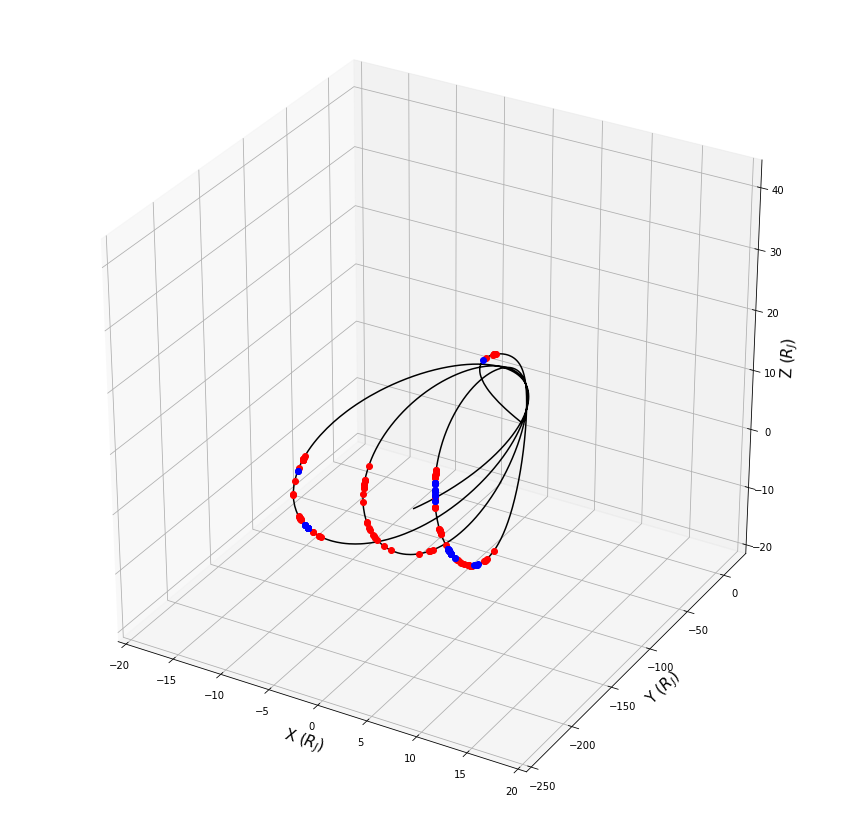

In [16]:
#Creating a 3D plot of JUno Trajectory with boundary crossings

from mpl_toolkits import mplot3d
fig = plt.figure(figsize = (15,15))
ax = plt.axes(projection="3d")

z = ZcoordJSO[0:57000]
x = XcoordJSO[0:57000]
y = YcoordJSO[0:57000]

z1 = ZcoordJSO1[0:97]
x1 = XcoordJSO1[0:97]
y1 = YcoordJSO1[0:97]

z2 = ZcoordJSO2[0:51]
x2 = XcoordJSO2[0:51]
y2 = YcoordJSO2[0:51]


ax.plot3D(x, y, z, color = 'k')
ax.plot3D(x1, y1, z1, 'o', color = "r")
ax.plot3D(x2, y2, z2, 'o', color = "b")

plt.xlim(-20, 20)
plt.ylim(-250, 25)


ax.set_xlabel('X $(R_J)$',fontsize = 15)
ax.set_ylabel('Y $(R_J)$',fontsize = 15)
ax.set_zlabel('Z $(R_J)$',fontsize = 15)




plt.show()

# Histograms for BS and MP Crossing Events

In [17]:
#Loading in data from Hospodarsky crossing file (mp)
mp_crossing = np.loadtxt('grl55876-sup-0002-2017gl073177-ts01.csv', delimiter=',', dtype= 'str')

In [18]:
#Loading in data from Hospodarsky crossing file (bs)
bs_crossing = np.loadtxt('grl55876-sup-0003-2017gl073177-ts02.csv',delimiter=',', dtype= 'str')

In [19]:
#Assigning the values for Juno distance(R_j) and the DOY at which the crossing occurs (mp)

distance_mp = mp_crossing[:,5].astype(float)

DOY_mp = mp_crossing[:,1].astype(float)

print(distance_mp.mean())
print(np.median(distance_mp))
print(np.std(distance_mp))

103.43721649484537
106.9
10.08546864647892


In [20]:
#Assigning the values for Juno distance(R_j) and the DOY at which the crossing occurs (bs)
distance_bs = bs_crossing[:,5].astype(float)

DOY_bs = bs_crossing[:,1].astype(float)

print(distance_bs.mean())
print(np.median(distance_bs))
print(np.std(distance_bs))

108.33333333333333
111.1
6.002210921628164


In [21]:
#Magentopause crossings inbound by orbit
mp_in_approach = (distance_mp[0], distance_mp[2], distance_mp[4], distance_mp[6])

mp_in_orb1 = (distance_mp[8], distance_mp[10], distance_mp[12], distance_mp[14], distance_mp[16], distance_mp[18], distance_mp[20], distance_mp[22],distance_mp[24],distance_mp[26],distance_mp[28],distance_mp[30],distance_mp[32],distance_mp[34],distance_mp[36],distance_mp[38],distance_mp[40],distance_mp[42],distance_mp[44],distance_mp[46])

mp_in_orb2 = (distance_mp[48],distance_mp[50],distance_mp[52],distance_mp[54],distance_mp[56],distance_mp[58],distance_mp[60],distance_mp[62],distance_mp[64],distance_mp[66],distance_mp[68],distance_mp[70])

mp_in_orb3 = (distance_mp[72],distance_mp[74],distance_mp[76],distance_mp[78],distance_mp[80],distance_mp[82],distance_mp[84],distance_mp[86],distance_mp[88],distance_mp[90],distance_mp[92], distance_mp[94], distance_mp[96])


In [22]:
#Magentopause crossings outbound by orbit
mp_out_approach = (distance_mp[1], distance_mp[3], distance_mp[5])

mp_out_orb1 = (distance_mp[7], distance_mp[9], distance_mp[11], distance_mp[13], distance_mp[15], distance_mp[17], distance_mp[19], distance_mp[21], distance_mp[23],distance_mp[25],distance_mp[27],distance_mp[29],distance_mp[31],distance_mp[33],distance_mp[35],distance_mp[37],distance_mp[39],distance_mp[41],distance_mp[43],distance_mp[45])

mp_out_orb2 = (distance_mp[47],distance_mp[49],distance_mp[51],distance_mp[53],distance_mp[55],distance_mp[57],distance_mp[59],distance_mp[61],distance_mp[63],distance_mp[65],distance_mp[67],distance_mp[69])

mp_out_orb3 = (distance_mp[71],distance_mp[73],distance_mp[75],distance_mp[77],distance_mp[79],distance_mp[81],distance_mp[83],distance_mp[85],distance_mp[87],distance_mp[89],distance_mp[91],distance_mp[93], distance_mp[95])

In [23]:
#Bow Shock crossings inbound by orbit
bs_in_approach = (distance_bs[0:1])

bs_in_orb1 = (distance_bs[2], distance_bs[4], distance_bs[6], distance_bs[8], distance_bs[10], distance_bs[12], distance_bs[14], distance_bs[16], distance_bs[18], distance_bs[20], distance_bs[22], distance_bs[24], distance_bs[26], distance_bs[28], distance_bs[30], distance_bs[32], distance_bs[34], distance_bs[36])

bs_in_orb3 = (distance_bs[38], distance_bs[40], distance_bs[42], distance_bs[44], distance_bs[46], distance_bs[48], distance_bs[50])


In [24]:
#Bow Shock crossings outbound by orbit
bs_out_orb1 = (distance_bs[1], distance_bs[3], distance_bs[5], distance_bs[7], distance_bs[9], distance_bs[11], distance_bs[13], distance_bs[15], distance_bs[17], distance_bs[19], distance_bs[21], distance_bs[23], distance_bs[25], distance_bs[27], distance_bs[29], distance_bs[31], distance_bs[33], distance_bs[35])

bs_out_orb3 = (distance_bs[37], distance_bs[39], distance_bs[41], distance_bs[43], distance_bs[45], distance_bs[47], distance_bs[49])

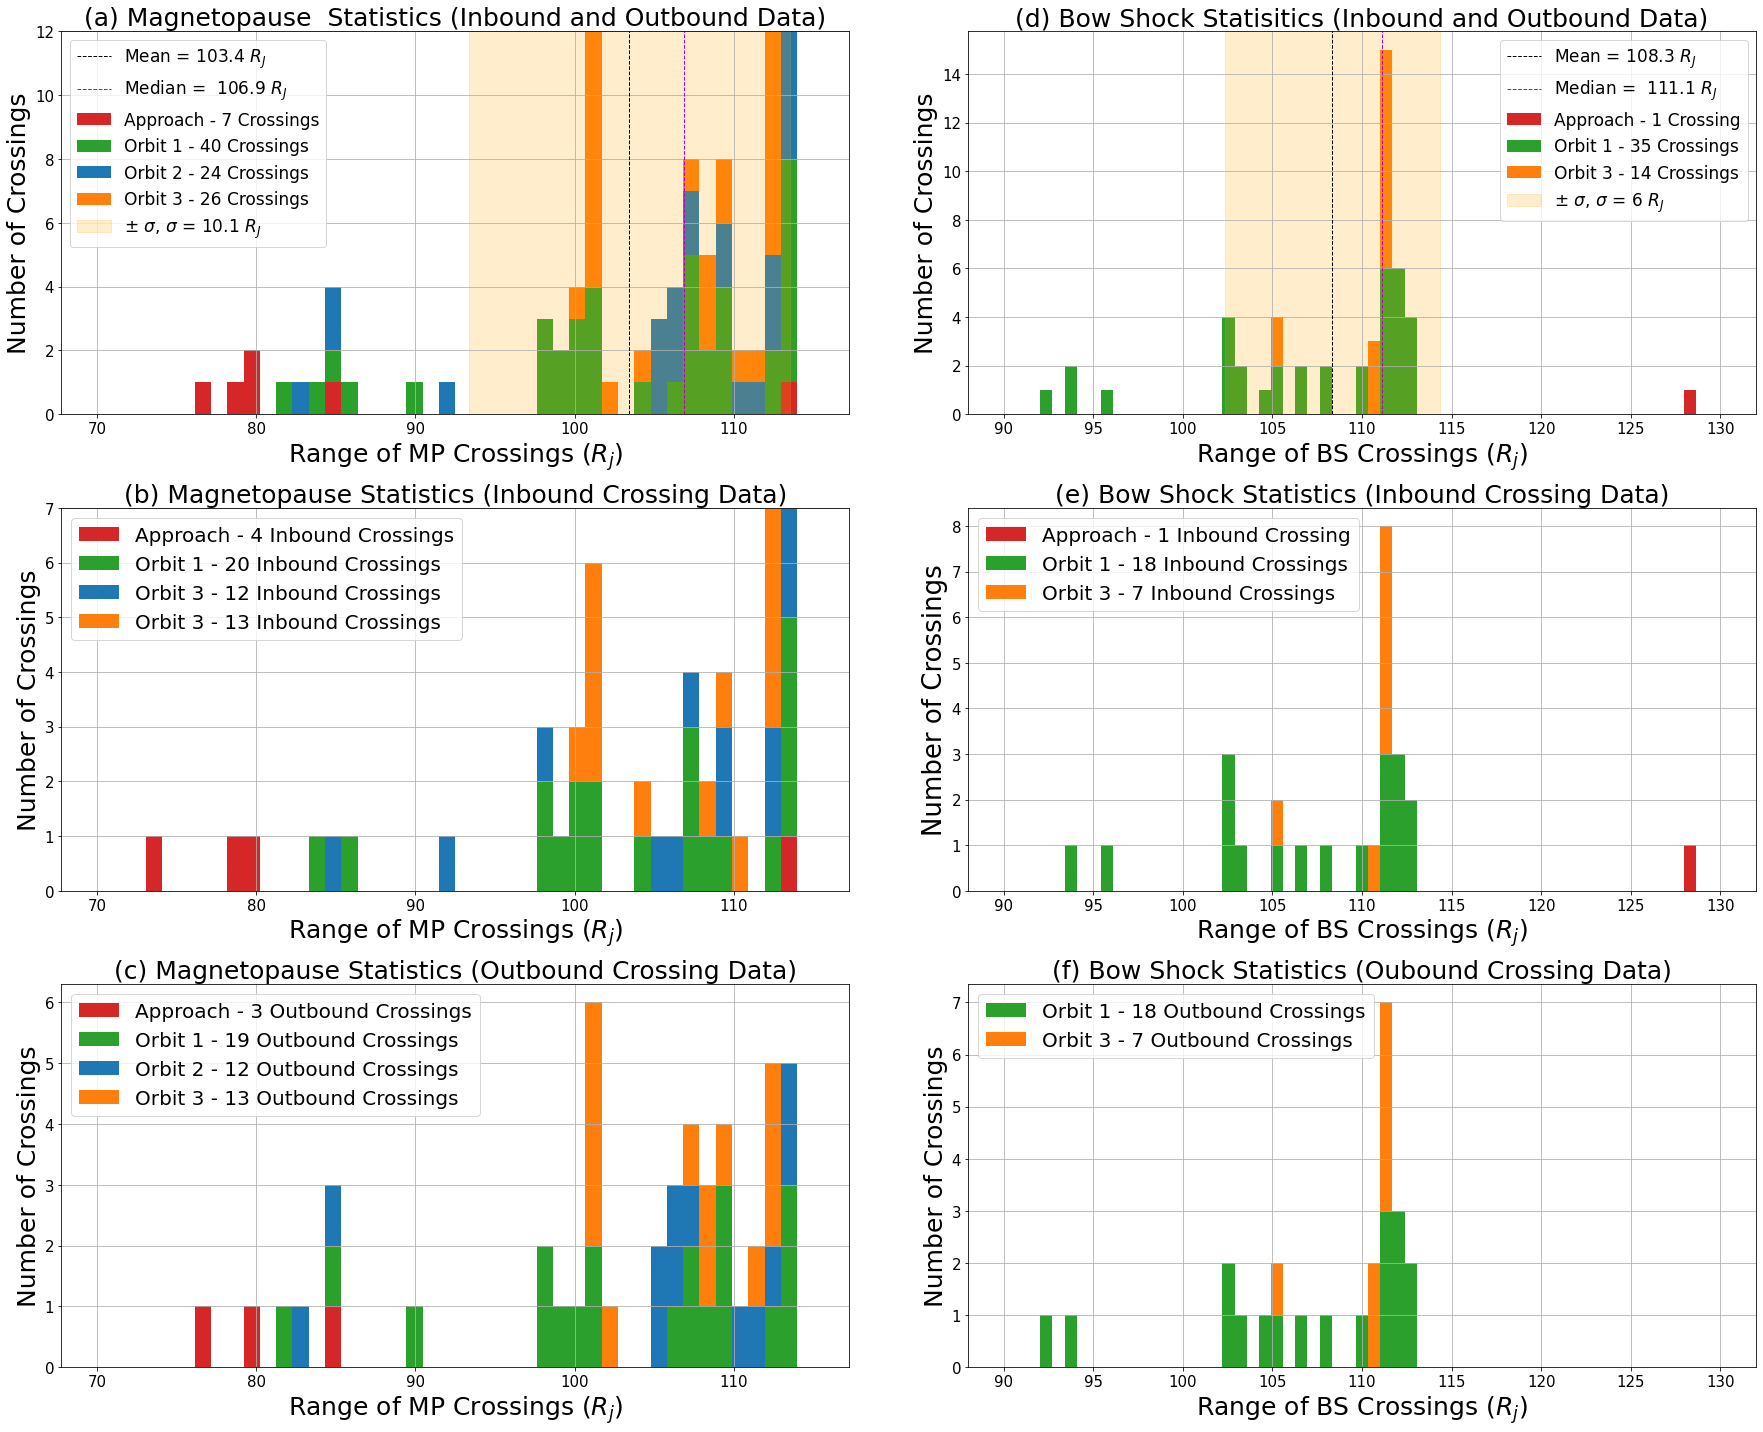

In [25]:
#Creating appropriate bins for each plot
bins_mp = np.linspace(70, 115, 45)
bins_bs = np.linspace(90, 130, 60)

t1 = distance_mp[0:6]
t2 = distance_mp[7:46]
t3 = distance_mp[47:70]
t4 = distance_mp[71: 97]


u1 = distance_bs[0:1]
u2 = distance_bs[1:36]
u3 = distance_bs[37:51]


#Standard Deviation for mp
xstd5 = (distance_mp.mean() - np.std(distance_mp))
xstd6 = (distance_mp.mean() + np.std(distance_mp))

#Standard Deviation for bs 
xstd7 = (distance_bs.mean() - np.std(distance_bs))
xstd8 = (distance_bs.mean() + np.std(distance_bs))



fig = plt.figure(figsize = (25,20))

#MP in and out
ax = fig.add_subplot(321)
plt.hist([t1, t2, t3, t4], bins_mp, stacked = True, color = ["tab:red", "tab:green", "tab:blue", "tab:orange"] ,histtype='bar', density=False, linewidth = 3, label = ["Approach - 7 Crossings","Orbit 1 - 40 Crossings","Orbit 2 - 24 Crossings","Orbit 3 - 26 Crossings"])
plt.axvline(distance_mp.mean(), color='k', linestyle='dashed', linewidth=1, label = 'Mean = 103.4 $R_J$')
plt.axvline(np.median(distance_mp), color='m', linestyle='dashed', linewidth=1, label = 'Median =  106.9 $R_J$')
ax.axvspan(xstd5, xstd6, alpha=0.2, color='orange', label = "$\pm$ $\sigma$, $\sigma$ = 10.1 $R_J$")
plt.xlabel('Range of MP Crossings ($R_j$)', fontsize = 25)
plt.ylabel('Number of Crossings', fontsize = 25)
plt.title('(a) Magnetopause  Statistics (Inbound and Outbound Data)', fontsize = 25)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.grid()
plt.legend(fontsize=17)

#MP inbound
ax2 = fig.add_subplot(323)
plt.hist([mp_in_approach, mp_in_orb1, mp_in_orb2, mp_in_orb3], bins_mp, stacked = True ,color = ["tab:red", "tab:green", "tab:blue", "tab:orange"], histtype='bar', density=False,linewidth = 3, label = ["Approach - 4 Inbound Crossings", "Orbit 1 - 20 Inbound Crossings",'Orbit 3 - 12 Inbound Crossings', 'Orbit 3 - 13 Inbound Crossings'])
plt.xlabel('Range of MP Crossings ($R_j$)', fontsize = 25)
plt.ylabel('Number of Crossings', fontsize = 25)
plt.title('(b) Magnetopause Statistics (Inbound Crossing Data)', fontsize = 25)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.grid()
plt.legend(fontsize=20)

#MP outbound
ax3 = fig.add_subplot(325)
plt.hist(([mp_out_approach, mp_out_orb1, mp_out_orb2, mp_out_orb3]), bins_mp, stacked = True ,color = ["tab:red", "tab:green", "tab:blue", "tab:orange"], histtype='bar', density=False,linewidth = 3, label = (["Approach - 3 Outbound Crossings", "Orbit 1 - 19 Outbound Crossings", 'Orbit 2 - 12 Outbound Crossings', 'Orbit 3 - 13 Outbound Crossings']))
plt.xlabel('Range of MP Crossings ($R_j$)', fontsize = 25)
plt.ylabel('Number of Crossings', fontsize = 25)
plt.title('(c) Magnetopause Statistics (Outbound Crossing Data)', fontsize = 25)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.grid()
plt.legend(fontsize=20)

#BS inbound and outbound
ax4 = fig.add_subplot(322)
plt.hist([u1, u2, u3], bins_bs, stacked = True, histtype='bar', density=False, color = ["tab:red", "tab:green", "tab:orange"], linewidth = 3, label = ["Approach - 1 Crossing", "Orbit 1 - 35 Crossings", 'Orbit 3 - 14 Crossings'])
plt.axvline(distance_bs.mean(), color='k', linestyle='dashed', linewidth=1, label = 'Mean = 108.3 $R_J$')
plt.axvline(np.median(distance_bs), color='m', linestyle='dashed', linewidth=1, label = 'Median =  111.1 $R_J$')
ax4.axvspan(xstd7, xstd8, alpha=0.2, color='orange', label = "$\pm$ $\sigma$, $\sigma$ = 6 $R_J$")
plt.ylabel('Number of Crossings', fontsize = 25)
plt.xlabel('Range of BS Crossings ($R_j$)', fontsize = 25)
plt.title('(d) Bow Shock Statisitics (Inbound and Outbound Data)', fontsize = 25)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.grid()
plt.legend(fontsize=17)


#BS inbound
ax5 = fig.add_subplot(324)
plt.hist([bs_in_approach, bs_in_orb1, bs_in_orb3], bins_bs, stacked = True, histtype='bar', density=False, color = ["tab:red", "tab:green", "tab:orange"], linewidth = 3, label = ["Approach - 1 Inbound Crossing", "Orbit 1 - 18 Inbound Crossings", 'Orbit 3 - 7 Inbound Crossings'])
plt.ylabel('Number of Crossings', fontsize = 26)
plt.xlabel('Range of BS Crossings ($R_j$)', fontsize = 25)
plt.title('(e) Bow Shock Statistics (Inbound Crossing Data)', fontsize = 25)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.grid()
plt.legend(fontsize=20)

#BS outbound
ax2 = fig.add_subplot(326)
plt.hist([bs_out_orb1, bs_out_orb3], bins_bs, stacked = True, histtype='bar', density=False, color = ["tab:green", "tab:orange"], linewidth = 3, label = ["Orbit 1 - 18 Outbound Crossings", 'Orbit 3 - 7 Outbound Crossings'])
plt.ylabel('Number of Crossings', fontsize = 25)
plt.xlabel('Range of BS Crossings ($R_j$)', fontsize = 25)
plt.title('(f) Bow Shock Statistics (Oubound Crossing Data)', fontsize = 25)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.grid()
plt.legend(fontsize=20)


plt.tight_layout()
plt.show()

# Timeseries

In [26]:
#Loading in the nKom file
file_nKom = readsav("nKOM_2016100-2019174_timeseries_d15_channels_0-51_zlincal_calibrated.sav")

In [27]:
print(file_nKom.keys())

dict_keys(['timeseries', 'time', 'frequencies'])


In [28]:
#Assigning frequency and timeseries to relevant columns
frequencies_n = file_nKom['frequencies']

timeseries_nKom = file_nKom['timeseries']

print(frequencies_n)

[  1.001       1.123       1.2695      1.416       1.5869      1.7822
   2.002       2.2461002   2.5147      2.832       3.1738      3.54
   3.9795      4.4677997   5.0049      5.6152      6.2988      7.0801
   7.959       8.9355     10.01       11.23       12.622      14.16
  15.869      17.798      19.971      19.958      22.339      25.085
  28.198      31.677      35.522      39.917      44.861      50.171
  56.213      63.171      70.862      79.468      89.172     100.16
 112.43      126.16      141.54      140.14      157.23      177.73
 198.24      222.17      249.51      280.27     ]


In [29]:
def doy2016_to_yyyyddd(doy, origin):  
### Function to change "day of a specific year" format to yyyyddd ###

    aa = np.arange(61, dtype=float)+origin  # array of years starting from year of origin
    deb = np.zeros([61], dtype=float)  # zeros
    for i in range(1, len(deb)):  # categorising start point for each year
        if i % 4 == 1:
            deb[i:] = deb[i:]+366.
        else:
            deb[i:] = deb[i:]+365.

    yyyyddd = np.zeros(len(doy), dtype=float)

    for i in range(0, len(doy)):
        j = doy[i]-deb
        yyyyddd[i] = (aa[j >= 1][-1])*1000.+j[j >= 1][-1]

    return(yyyyddd)

from doy2016_to_yyyyddd import doy2016_to_yyyyddd
time_n = np.array(file_nKom['time'])
time_n = doy2016_to_yyyyddd(time_n,2016)

from doy_to_ymd import * 
t_hours_tmp = (time_n[:] - (np.array(time_n,dtype=int))[:])*24
time_n = doy_float_to_ymd(np.array(np.array(time_n,dtype = int), dtype = str), t_hours_tmp)  


print(time_n)

[datetime.datetime(2016, 4, 9, 0, 0)
 datetime.datetime(2016, 4, 9, 0, 0, 14, 999999)
 datetime.datetime(2016, 4, 9, 0, 0, 29, 999998) ...
 datetime.datetime(2019, 6, 23, 23, 59, 15, 3)
 datetime.datetime(2019, 6, 23, 23, 59, 30, 2)
 datetime.datetime(2019, 6, 23, 23, 59, 45, 1)]


# Below are the time series of various compressions. For the report

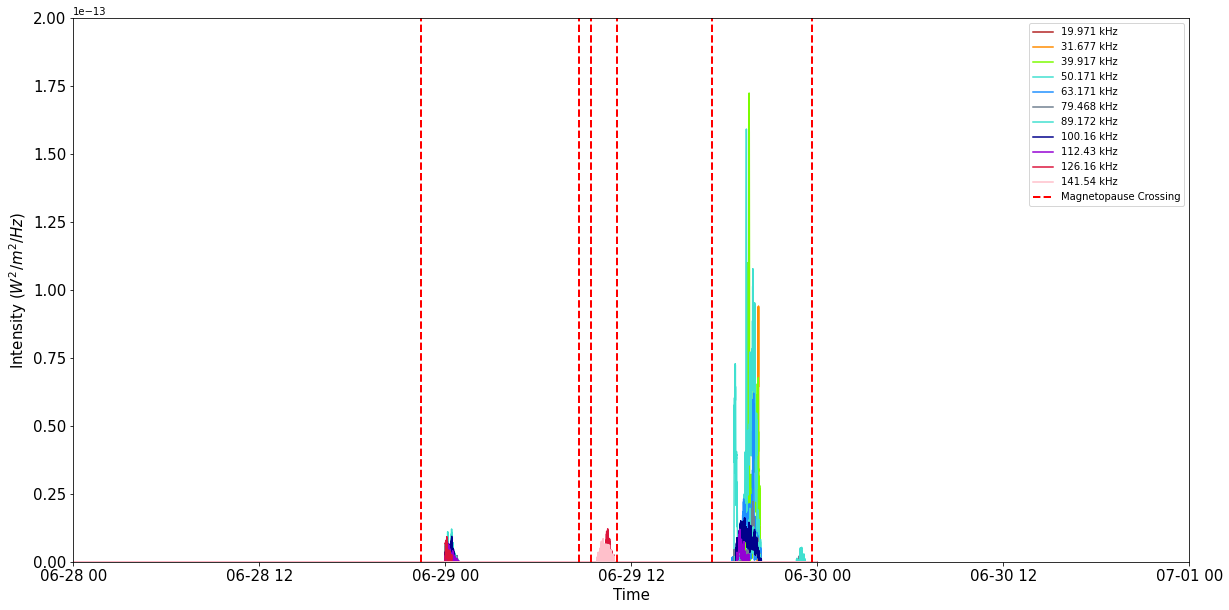

In [12]:

plt.figure(figsize = (20,10))
plt.plot(time_n, timeseries_nKom[:,26], color = 'firebrick', label = '19.971 kHz')

plt.plot(time_n, timeseries_nKom[:,31], color = 'darkorange', label = '31.677 kHz')

plt.plot(time_n, timeseries_nKom[:,33], color = 'lawngreen', label = '39.917 kHz')

plt.plot(time_n, timeseries_nKom[:,35], color = 'turquoise', label = '50.171 kHz')

plt.plot(time_n, timeseries_nKom[:,37], color = 'dodgerblue', label = '63.171 kHz')

plt.plot(time_n, timeseries_nKom[:,39], color = 'slategray', label = '79.468 kHz')

plt.plot(time_n, timeseries_nKom[:,40], color = 'turquoise', label = '89.172 kHz')

plt.plot(time_n, timeseries_nKom[:,41], color = 'darkblue', label = '100.16 kHz')

plt.plot(time_n, timeseries_nKom[:,42], color = 'darkviolet', label = '112.43 kHz')

plt.plot(time_n, timeseries_nKom[:,43], color = 'crimson', label = '126.16 kHz')

plt.plot(time_n, timeseries_nKom[:,44], color = 'pink', label = '141.54 kHz')


plt.axvline(x = datetime.datetime(2016, 6, 28, 22, 27), color='r', linestyle='dashed', linewidth=2, label = 'Magnetopause Crossing')
plt.axvline(x = datetime.datetime(2016, 6, 29, 8, 40), color='r', linestyle='dashed', linewidth=2)
plt.axvline(x = datetime.datetime(2016, 6, 29, 9, 23), color='r', linestyle='dashed', linewidth=2)
plt.axvline(x = datetime.datetime(2016, 6, 29, 11, 7), color='r', linestyle='dashed', linewidth=2)
plt.axvline(x = datetime.datetime(2016, 6, 29, 17, 12), color='r', linestyle='dashed', linewidth=2)
plt.axvline(x = datetime.datetime(2016, 6, 29, 23, 41), color='r', linestyle='dashed', linewidth=2)
plt.xlabel("Time", fontsize = 15)
plt.ylabel("Intensity ($W^2/m^2/Hz$)", fontsize =15)
plt.xlim(datetime.datetime(2016, 6, 28), datetime.datetime(2016, 7, 1))
plt.legend(fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.ylim(0, 2e-13)
plt.legend()
plt.show()

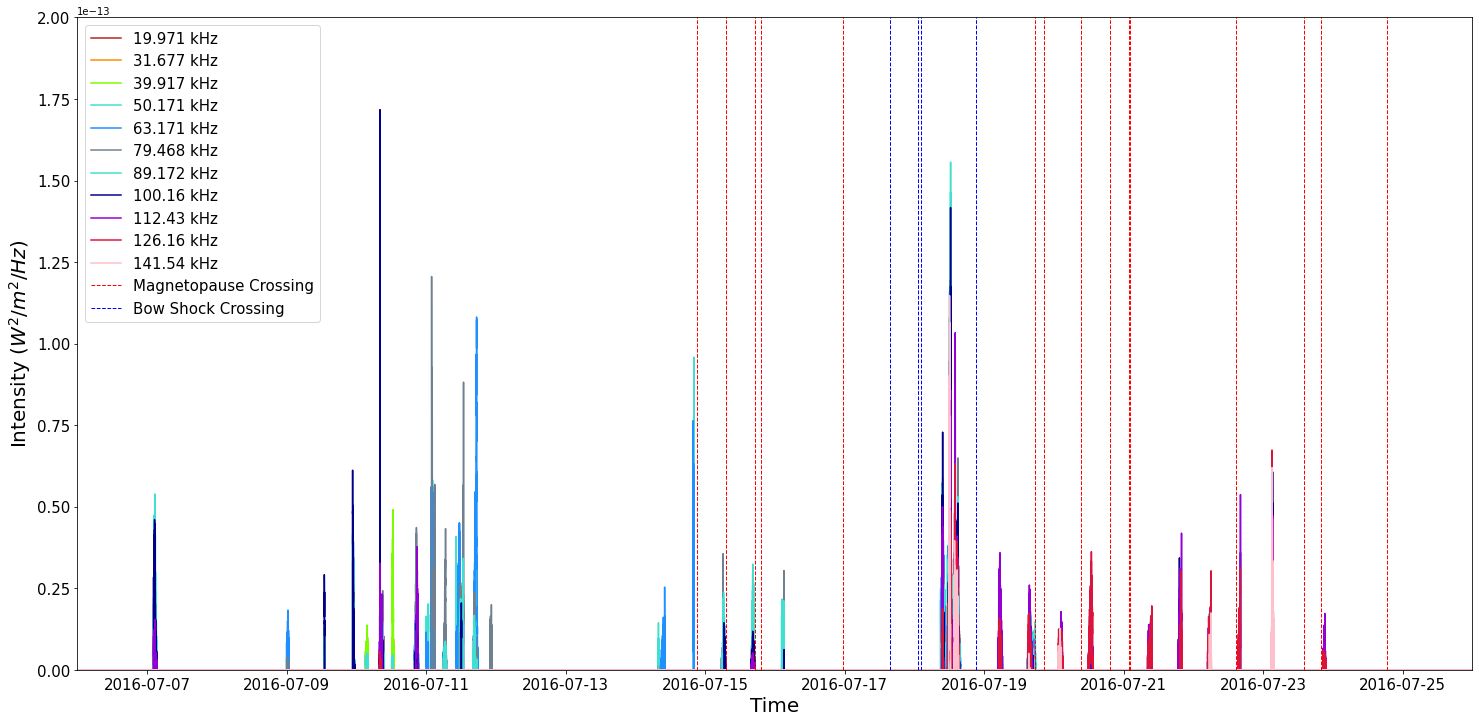

In [14]:

plt.figure(figsize = (25,12))

plt.plot(time_n, timeseries_nKom[:,26], color = 'firebrick', label = '19.971 kHz')

plt.plot(time_n, timeseries_nKom[:,31], color = 'darkorange', label = '31.677 kHz')

plt.plot(time_n, timeseries_nKom[:,33], color = 'lawngreen', label = '39.917 kHz')

plt.plot(time_n, timeseries_nKom[:,35], color = 'turquoise', label = '50.171 kHz')

plt.plot(time_n, timeseries_nKom[:,37], color = 'dodgerblue', label = '63.171 kHz')

plt.plot(time_n, timeseries_nKom[:,39], color = 'slategray', label = '79.468 kHz')

plt.plot(time_n, timeseries_nKom[:,40], color = 'turquoise', label = '89.172 kHz')

plt.plot(time_n, timeseries_nKom[:,41], color = 'darkblue', label = '100.16 kHz')

plt.plot(time_n, timeseries_nKom[:,42], color = 'darkviolet', label = '112.43 kHz')

plt.plot(time_n, timeseries_nKom[:,43], color = 'crimson', label = '126.16 kHz')

plt.plot(time_n, timeseries_nKom[:,44], color = 'pink', label = '141.54 kHz')


plt.axvline(x = datetime.datetime(2016, 7, 14, 21, 18), color='r', linestyle='dashed', linewidth=1, label = "Magnetopause Crossing")
plt.axvline(x = datetime.datetime(2016, 7, 15, 7, 16), color='r', linestyle='dashed', linewidth=1)
plt.axvline(x = datetime.datetime(2016, 7, 15, 17, 6), color='r', linestyle='dashed', linewidth=1)
plt.axvline(x = datetime.datetime(2016, 7, 15, 19, 11), color='r', linestyle='dashed', linewidth=1)
plt.axvline(x = datetime.datetime(2016, 7, 16, 23, 17), color='r', linestyle='dashed', linewidth=1)
plt.axvline(x = datetime.datetime(2016, 7, 19, 17, 26), color='r', linestyle='dashed', linewidth=1)
plt.axvline(x = datetime.datetime(2016, 7, 19, 20, 43), color='r', linestyle='dashed', linewidth=1)
plt.axvline(x = datetime.datetime(2016, 7, 20, 9, 18), color='r', linestyle='dashed', linewidth=1)
plt.axvline(x = datetime.datetime(2016, 7, 20, 19, 16), color='r', linestyle='dashed', linewidth=1)
plt.axvline(x = datetime.datetime(2016, 7, 21, 1, 49), color='r', linestyle='dashed', linewidth=1)
plt.axvline(x = datetime.datetime(2016, 7, 21, 2, 2), color='r', linestyle='dashed', linewidth=1)
plt.axvline(x = datetime.datetime(2016, 7, 22, 14, 31), color='r', linestyle='dashed', linewidth=1)
plt.axvline(x = datetime.datetime(2016, 7, 23, 14, 6), color='r', linestyle='dashed', linewidth=1)
plt.axvline(x = datetime.datetime(2016, 7, 23, 19, 54), color='r', linestyle='dashed', linewidth=1)
plt.axvline(x = datetime.datetime(2016, 7, 24, 18, 47), color='r', linestyle='dashed', linewidth=1)

plt.axvline(x = datetime.datetime(2016, 7, 17, 15, 33), color='b', linestyle='dashed', linewidth=1, label = "Bow Shock Crossing")
plt.axvline(x = datetime.datetime(2016, 7, 18, 1, 22), color='b', linestyle='dashed', linewidth=1)
plt.axvline(x = datetime.datetime(2016, 7, 18, 2, 21), color='b', linestyle='dashed', linewidth=1)
plt.axvline(x = datetime.datetime(2016, 7, 18, 21, 18), color='b', linestyle='dashed', linewidth=1)




plt.xlabel("Time", fontsize = 20)
plt.ylabel("Intensity ($W^2/m^2/Hz$)", fontsize =20)
plt.xlim(datetime.datetime(2016, 7, 6), datetime.datetime(2016, 7, 26))
plt.legend()
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.ylim(0, 2e-13)
plt.legend(fontsize=15)
plt.show()

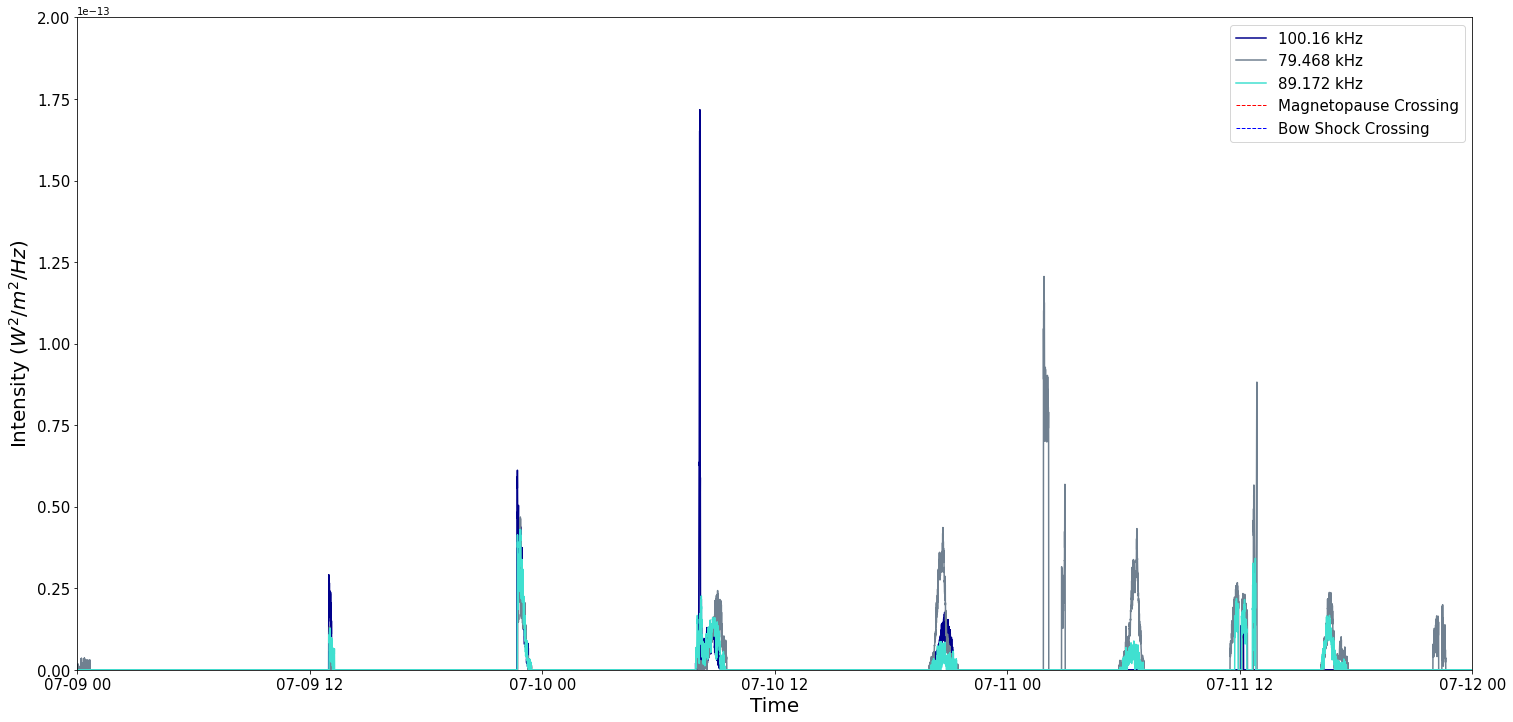

In [74]:

plt.figure(figsize = (25,12))



plt.plot(time_n, timeseries_nKom[:,41], color = 'darkblue', label = '100.16 kHz')

plt.plot(time_n, timeseries_nKom[:,39], color = 'slategray', label = '79.468 kHz')

plt.plot(time_n, timeseries_nKom[:,40], color = 'turquoise', label = '89.172 kHz')



plt.axvline(x = datetime.datetime(2016, 7, 14, 21, 18), color='r', linestyle='dashed', linewidth=1, label = "Magnetopause Crossing")
plt.axvline(x = datetime.datetime(2016, 7, 15, 7, 16), color='r', linestyle='dashed', linewidth=1)
plt.axvline(x = datetime.datetime(2016, 7, 15, 17, 6), color='r', linestyle='dashed', linewidth=1)
plt.axvline(x = datetime.datetime(2016, 7, 15, 19, 11), color='r', linestyle='dashed', linewidth=1)
plt.axvline(x = datetime.datetime(2016, 7, 16, 23, 17), color='r', linestyle='dashed', linewidth=1)
plt.axvline(x = datetime.datetime(2016, 7, 19, 17, 26), color='r', linestyle='dashed', linewidth=1)
plt.axvline(x = datetime.datetime(2016, 7, 19, 20, 43), color='r', linestyle='dashed', linewidth=1)
plt.axvline(x = datetime.datetime(2016, 7, 20, 9, 18), color='r', linestyle='dashed', linewidth=1)
plt.axvline(x = datetime.datetime(2016, 7, 20, 19, 16), color='r', linestyle='dashed', linewidth=1)
plt.axvline(x = datetime.datetime(2016, 7, 21, 1, 49), color='r', linestyle='dashed', linewidth=1)
plt.axvline(x = datetime.datetime(2016, 7, 21, 2, 2), color='r', linestyle='dashed', linewidth=1)
plt.axvline(x = datetime.datetime(2016, 7, 22, 14, 31), color='r', linestyle='dashed', linewidth=1)
plt.axvline(x = datetime.datetime(2016, 7, 23, 14, 6), color='r', linestyle='dashed', linewidth=1)
plt.axvline(x = datetime.datetime(2016, 7, 23, 19, 54), color='r', linestyle='dashed', linewidth=1)
plt.axvline(x = datetime.datetime(2016, 7, 24, 18, 47), color='r', linestyle='dashed', linewidth=1)

plt.axvline(x = datetime.datetime(2016, 7, 17, 15, 33), color='b', linestyle='dashed', linewidth=1, label = "Bow Shock Crossing")
plt.axvline(x = datetime.datetime(2016, 7, 18, 1, 22), color='b', linestyle='dashed', linewidth=1)
plt.axvline(x = datetime.datetime(2016, 7, 18, 2, 21), color='b', linestyle='dashed', linewidth=1)
plt.axvline(x = datetime.datetime(2016, 7, 18, 21, 18), color='b', linestyle='dashed', linewidth=1)




plt.xlabel("Time", fontsize = 20)
plt.ylabel("Intensity ($W^2/m^2/Hz$)", fontsize =20)
plt.xlim(datetime.datetime(2016, 7, 9), datetime.datetime(2016, 7, 12))
plt.legend()
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.ylim(0, 2e-13)
plt.legend(fontsize=15)
plt.show()

/opt/anaconda3/lib/python3.8/site-packages/IPython/core/pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


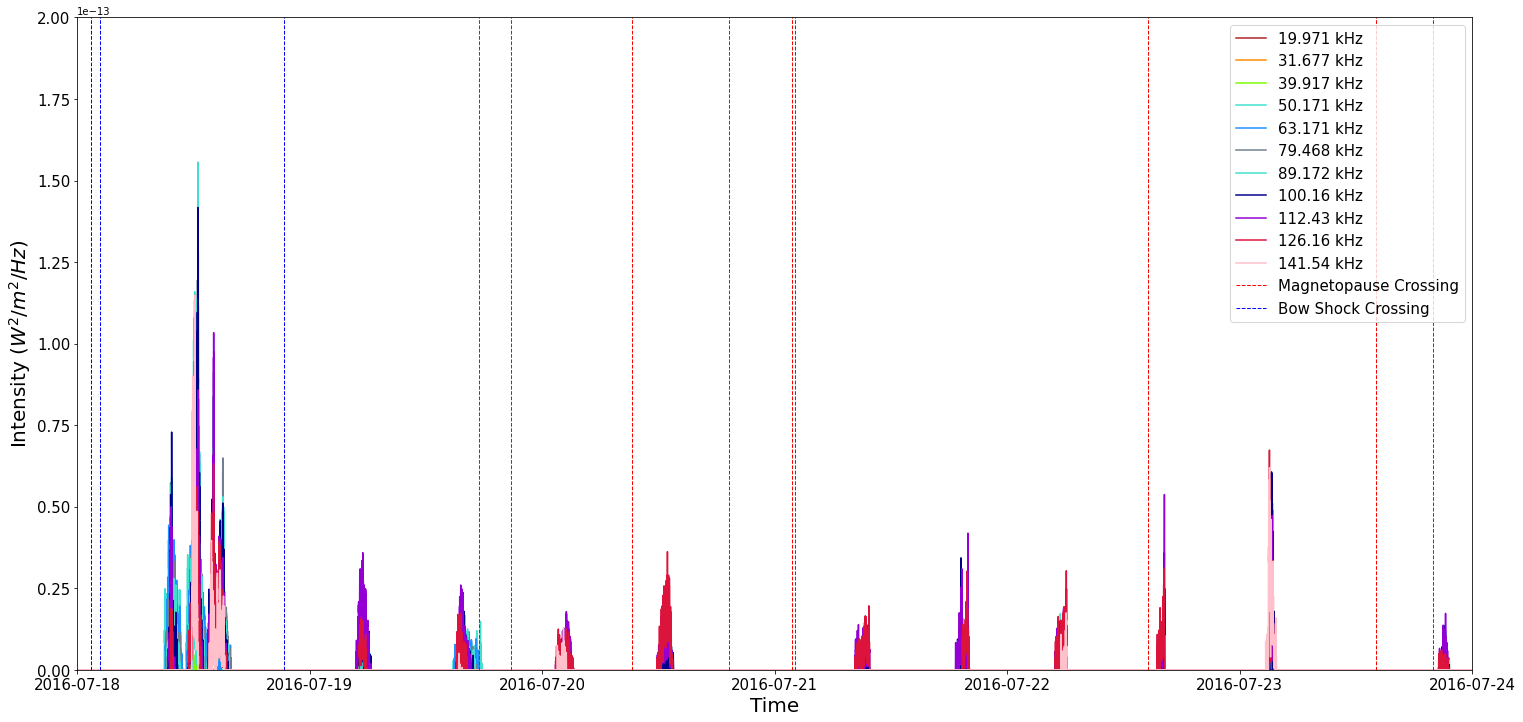

In [29]:
#Timeseries for compression during first orbit
plt.figure(figsize = (25,12))

plt.plot(time_n, timeseries_nKom[:,26], color = 'firebrick', label = '19.971 kHz')

plt.plot(time_n, timeseries_nKom[:,31], color = 'darkorange', label = '31.677 kHz')

plt.plot(time_n, timeseries_nKom[:,33], color = 'lawngreen', label = '39.917 kHz')

plt.plot(time_n, timeseries_nKom[:,35], color = 'turquoise', label = '50.171 kHz')

plt.plot(time_n, timeseries_nKom[:,37], color = 'dodgerblue', label = '63.171 kHz')

plt.plot(time_n, timeseries_nKom[:,39], color = 'slategray', label = '79.468 kHz')

plt.plot(time_n, timeseries_nKom[:,40], color = 'turquoise', label = '89.172 kHz')

plt.plot(time_n, timeseries_nKom[:,41], color = 'darkblue', label = '100.16 kHz')

plt.plot(time_n, timeseries_nKom[:,42], color = 'darkviolet', label = '112.43 kHz')

plt.plot(time_n, timeseries_nKom[:,43], color = 'crimson', label = '126.16 kHz')

plt.plot(time_n, timeseries_nKom[:,44], color = 'pink', label = '141.54 kHz')


plt.axvline(x = datetime.datetime(2016, 7, 14, 21, 18), color='r', linestyle='dashed', linewidth=1, label = "Magnetopause Crossing")
plt.axvline(x = datetime.datetime(2016, 7, 15, 7, 16), color='r', linestyle='dashed', linewidth=1)
plt.axvline(x = datetime.datetime(2016, 7, 15, 17, 6), color='r', linestyle='dashed', linewidth=1)
plt.axvline(x = datetime.datetime(2016, 7, 15, 19, 11), color='r', linestyle='dashed', linewidth=1)
plt.axvline(x = datetime.datetime(2016, 7, 16, 23, 17), color='r', linestyle='dashed', linewidth=1)
plt.axvline(x = datetime.datetime(2016, 7, 19, 17, 26), color='r', linestyle='dashed', linewidth=1)
plt.axvline(x = datetime.datetime(2016, 7, 19, 20, 43), color='r', linestyle='dashed', linewidth=1)
plt.axvline(x = datetime.datetime(2016, 7, 20, 9, 18), color='r', linestyle='dashed', linewidth=1)
plt.axvline(x = datetime.datetime(2016, 7, 20, 19, 16), color='r', linestyle='dashed', linewidth=1)
plt.axvline(x = datetime.datetime(2016, 7, 21, 1, 49), color='r', linestyle='dashed', linewidth=1)
plt.axvline(x = datetime.datetime(2016, 7, 21, 2, 2), color='r', linestyle='dashed', linewidth=1)
plt.axvline(x = datetime.datetime(2016, 7, 22, 14, 31), color='r', linestyle='dashed', linewidth=1)
plt.axvline(x = datetime.datetime(2016, 7, 23, 14, 6), color='r', linestyle='dashed', linewidth=1)
plt.axvline(x = datetime.datetime(2016, 7, 23, 19, 54), color='r', linestyle='dashed', linewidth=1)
plt.axvline(x = datetime.datetime(2016, 7, 24, 18, 47), color='r', linestyle='dashed', linewidth=1)

plt.axvline(x = datetime.datetime(2016, 7, 17, 15, 33), color='b', linestyle='dashed', linewidth=1, label = "Bow Shock Crossing")
plt.axvline(x = datetime.datetime(2016, 7, 18, 1, 22), color='b', linestyle='dashed', linewidth=1)
plt.axvline(x = datetime.datetime(2016, 7, 18, 2, 21), color='b', linestyle='dashed', linewidth=1)
plt.axvline(x = datetime.datetime(2016, 7, 18, 21, 18), color='b', linestyle='dashed', linewidth=1)




plt.xlabel("Time", fontsize = 20)
plt.ylabel("Intensity ($W^2/m^2/Hz$)", fontsize =20)
plt.xlim(datetime.datetime(2016, 7, 18), datetime.datetime(2016, 7, 24))
plt.legend()
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.ylim(0, 2e-13)
plt.legend(fontsize=15)
plt.show()

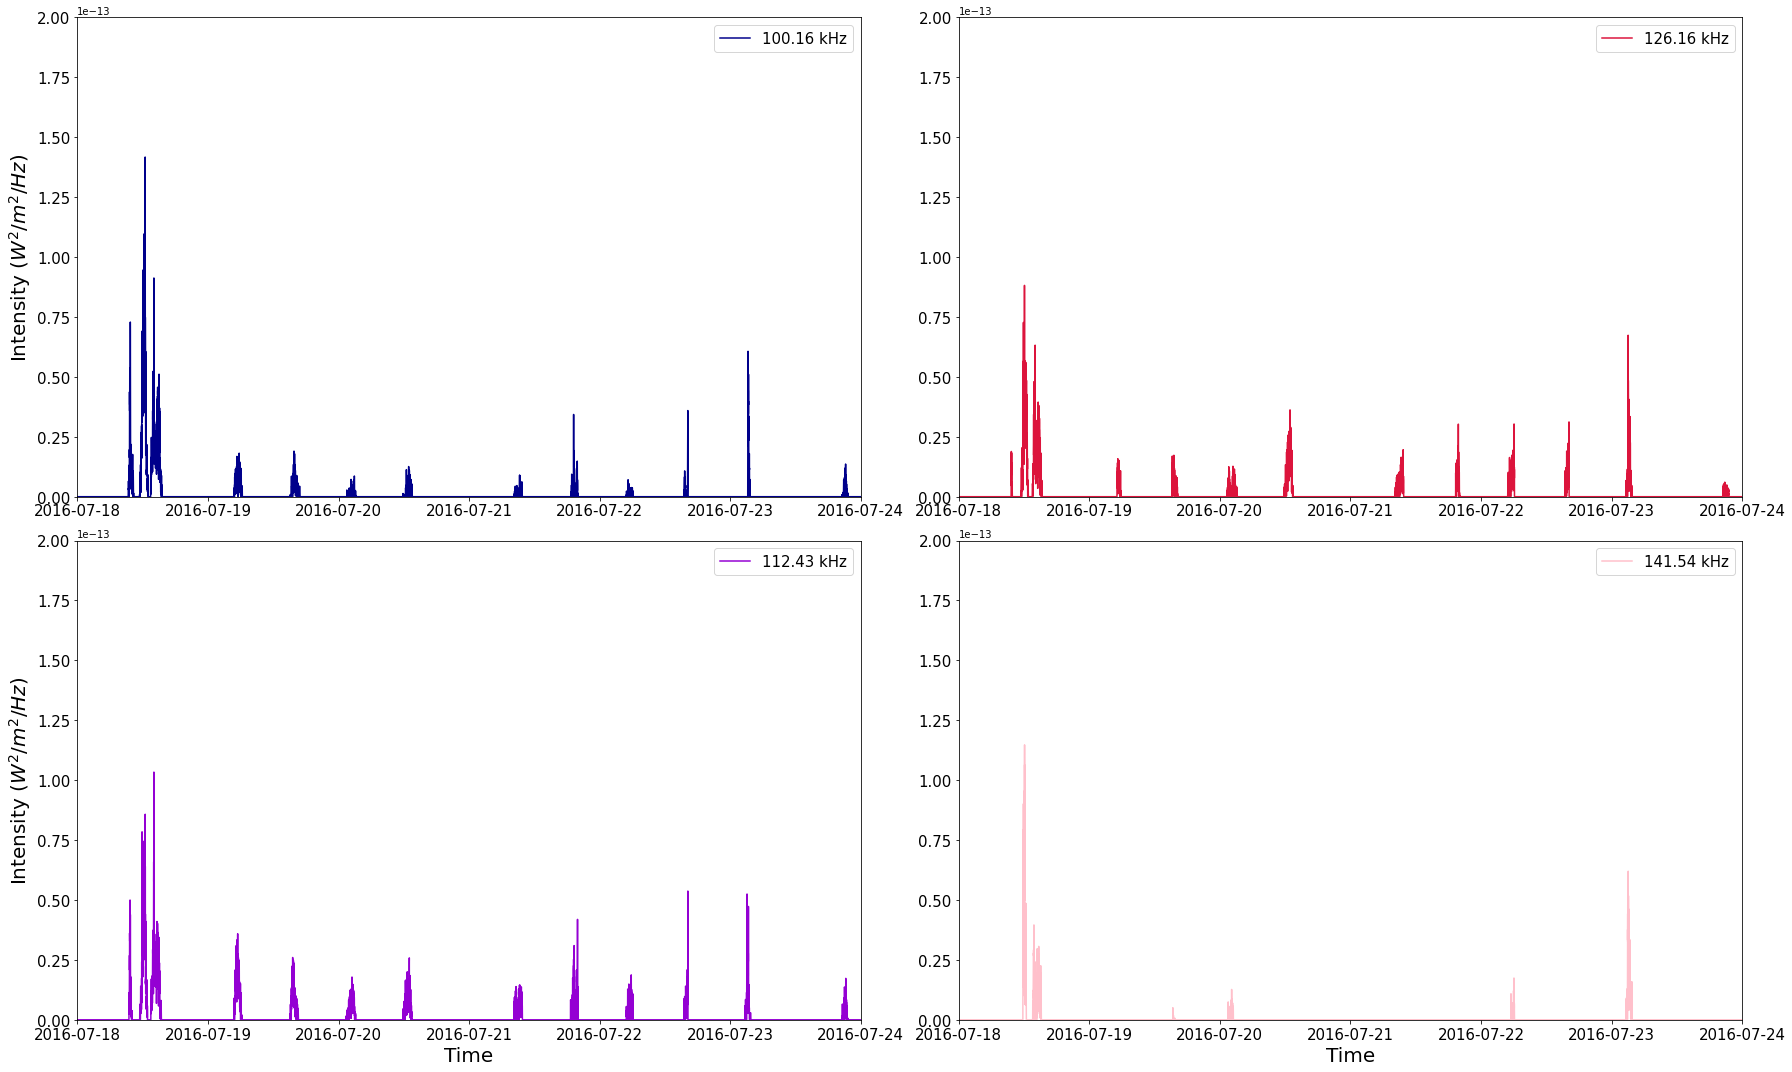

In [41]:
#Timeseries for compression during first orbit
fig = plt.figure(figsize = (25,15))


ax = fig.add_subplot(221)
plt.plot(time_n, timeseries_nKom[:,41], color = 'darkblue', label = '100.16 kHz')
plt.ylabel("Intensity ($W^2/m^2/Hz$)", fontsize =20)
plt.xlim(datetime.datetime(2016, 7, 18), datetime.datetime(2016, 7, 24))
plt.legend()
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.ylim(0, 2e-13)
plt.legend(fontsize=15)


ax2 = fig.add_subplot(222)
plt.plot(time_n, timeseries_nKom[:,43], color = 'crimson', label = '126.16 kHz')


plt.xlim(datetime.datetime(2016, 7, 18), datetime.datetime(2016, 7, 24))
plt.legend()
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.ylim(0, 2e-13)
plt.legend(fontsize=15)


ax3 = fig.add_subplot(223)
plt.plot(time_n, timeseries_nKom[:,42], color = 'darkviolet', label = '112.43 kHz')
plt.xlabel("Time", fontsize = 20)
plt.ylabel("Intensity ($W^2/m^2/Hz$)", fontsize =20)
plt.xlim(datetime.datetime(2016, 7, 18), datetime.datetime(2016, 7, 24))
plt.legend()
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.ylim(0, 2e-13)
plt.legend(fontsize=15)


ax4 = fig.add_subplot(224)
plt.plot(time_n, timeseries_nKom[:,44], color = 'pink', label = '141.54 kHz')
plt.xlabel("Time", fontsize = 20)

plt.xlim(datetime.datetime(2016, 7, 18), datetime.datetime(2016, 7, 24))
plt.legend()
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.ylim(0, 2e-13)
plt.legend(fontsize=15)





plt.tight_layout()
plt.show()

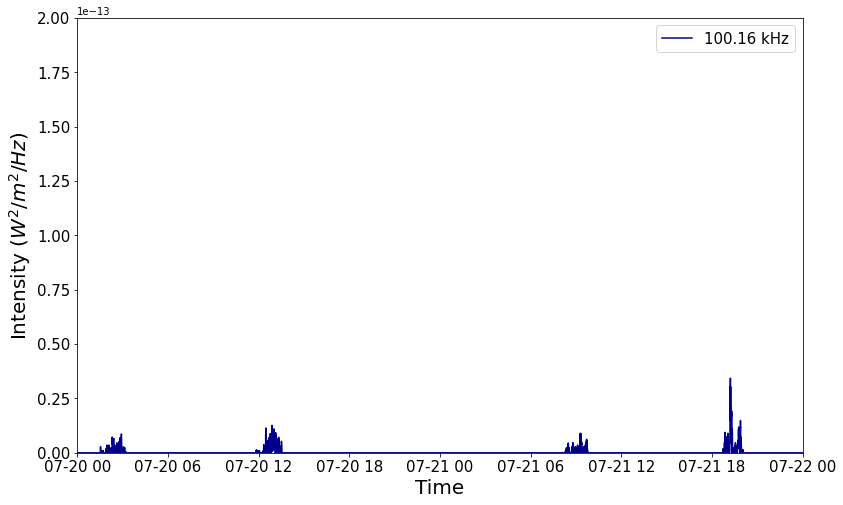

In [46]:
plt.figure(figsize = (13,8))



plt.plot(time_n, timeseries_nKom[:,41], color = 'darkblue', label = '100.16 kHz')




plt.xlabel("Time", fontsize = 20)
plt.ylabel("Intensity ($W^2/m^2/Hz$)", fontsize =20)
plt.xlim(datetime.datetime(2016, 7, 20), datetime.datetime(2016, 7, 22))
plt.legend()
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.ylim(0, 2e-13)
plt.legend(fontsize=15)
plt.show()

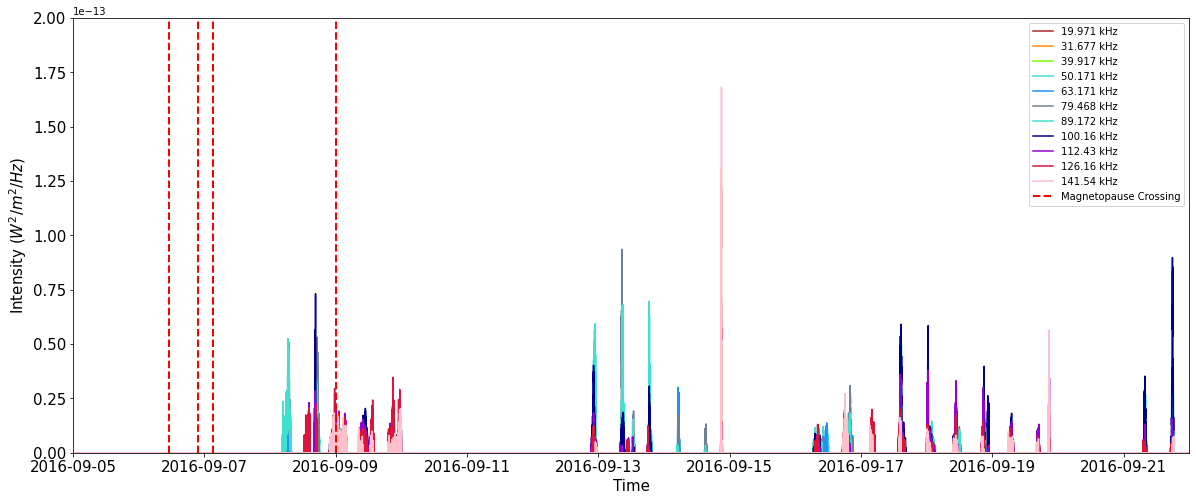

In [52]:
#Timeseries for compression on orbit two
plt.figure(figsize = (25,12))

plt.plot(time_n, timeseries_nKom[:,26], color = 'firebrick', label = '19.971 kHz')

plt.plot(time_n, timeseries_nKom[:,31], color = 'darkorange', label = '31.677 kHz')

plt.plot(time_n, timeseries_nKom[:,33], color = 'lawngreen', label = '39.917 kHz')

plt.plot(time_n, timeseries_nKom[:,35], color = 'turquoise', label = '50.171 kHz')

plt.plot(time_n, timeseries_nKom[:,37], color = 'dodgerblue', label = '63.171 kHz')

plt.plot(time_n, timeseries_nKom[:,39], color = 'slategray', label = '79.468 kHz')

plt.plot(time_n, timeseries_nKom[:,40], color = 'turquoise', label = '89.172 kHz')

plt.plot(time_n, timeseries_nKom[:,41], color = 'darkblue', label = '100.16 kHz')

plt.plot(time_n, timeseries_nKom[:,42], color = 'darkviolet', label = '112.43 kHz')

plt.plot(time_n, timeseries_nKom[:,43], color = 'crimson', label = '126.16 kHz')

plt.plot(time_n, timeseries_nKom[:,44], color = 'pink', label = '141.54 kHz')

plt.axvline(x = datetime.datetime(2016, 9, 6, 11, 2), color='r', linestyle='dashed', linewidth=2, label = 'Magnetopause Crossing')
plt.axvline(x = datetime.datetime(2016, 9, 6, 21, 47), color='r', linestyle='dashed', linewidth=2)
plt.axvline(x = datetime.datetime(2016, 9, 7, 3, 15), color='r', linestyle='dashed', linewidth=2)
plt.axvline(x = datetime.datetime(2016, 9, 8, 23, 56), color='r', linestyle='dashed', linewidth=2)



#plt.axvspan(datetime.datetime(2016, 7, 14, 21, 18), datetime.datetime(2016, 7, 15, 7, 16), alpha=0.05, color='r', label = 'Magnetosheath')
#plt.axvspan(datetime.datetime(2016, 7, 15, 7, 16), datetime.datetime(2016, 7, 15, 17, 6), alpha=0.05, color='g', label = 'Magnetosphere')





plt.xlabel("Time", fontsize = 15)
plt.ylabel("Intensity ($W^2/m^2/Hz$)", fontsize =15)
plt.xlim(datetime.datetime(2016, 9, 5), datetime.datetime(2016, 9, 22))
plt.legend()
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.ylim(0, 2e-13)
plt.show()

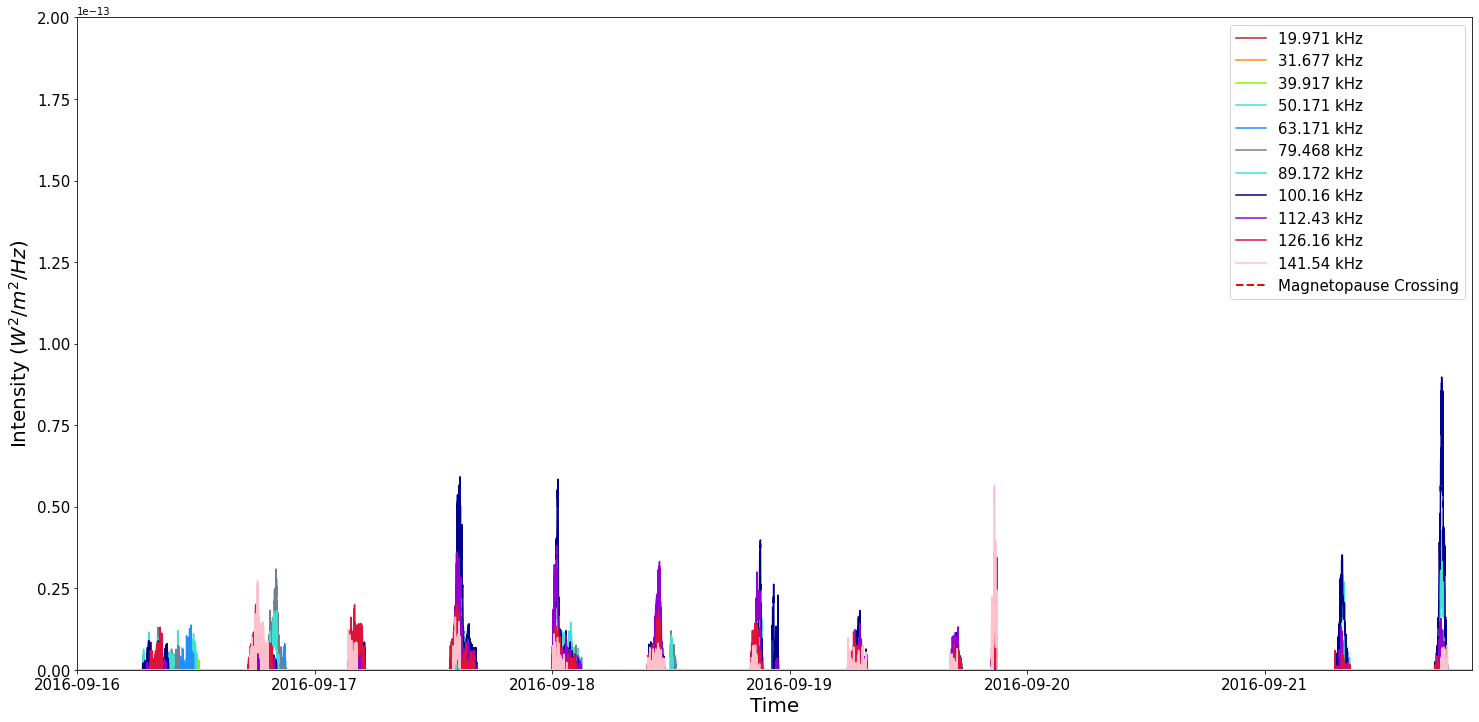

In [68]:
#Timeseries for compression on orbit two
plt.figure(figsize = (25,12))

plt.plot(time_n, timeseries_nKom[:,26], color = 'firebrick', label = '19.971 kHz')

plt.plot(time_n, timeseries_nKom[:,31], color = 'darkorange', label = '31.677 kHz')

plt.plot(time_n, timeseries_nKom[:,33], color = 'lawngreen', label = '39.917 kHz')

plt.plot(time_n, timeseries_nKom[:,35], color = 'turquoise', label = '50.171 kHz')

plt.plot(time_n, timeseries_nKom[:,37], color = 'dodgerblue', label = '63.171 kHz')

plt.plot(time_n, timeseries_nKom[:,39], color = 'slategray', label = '79.468 kHz')

plt.plot(time_n, timeseries_nKom[:,40], color = 'turquoise', label = '89.172 kHz')

plt.plot(time_n, timeseries_nKom[:,41], color = 'darkblue', label = '100.16 kHz')

plt.plot(time_n, timeseries_nKom[:,42], color = 'darkviolet', label = '112.43 kHz')

plt.plot(time_n, timeseries_nKom[:,43], color = 'crimson', label = '126.16 kHz')

plt.plot(time_n, timeseries_nKom[:,44], color = 'pink', label = '141.54 kHz')

plt.axvline(x = datetime.datetime(2016, 9, 6, 11, 2), color='r', linestyle='dashed', linewidth=2, label = 'Magnetopause Crossing')
plt.axvline(x = datetime.datetime(2016, 9, 6, 21, 47), color='r', linestyle='dashed', linewidth=2)
plt.axvline(x = datetime.datetime(2016, 9, 7, 3, 15), color='r', linestyle='dashed', linewidth=2)
plt.axvline(x = datetime.datetime(2016, 9, 8, 23, 56), color='r', linestyle='dashed', linewidth=2)



#plt.axvspan(datetime.datetime(2016, 7, 14, 21, 18), datetime.datetime(2016, 7, 15, 7, 16), alpha=0.05, color='r', label = 'Magnetosheath')
#plt.axvspan(datetime.datetime(2016, 7, 15, 7, 16), datetime.datetime(2016, 7, 15, 17, 6), alpha=0.05, color='g', label = 'Magnetosphere')





plt.xlabel("Time", fontsize = 20)
plt.ylabel("Intensity ($W^2/m^2/Hz$)", fontsize =20)
plt.xlim(datetime.datetime(2016, 9, 16), datetime.datetime(2016, 9, 21, 21))
plt.legend(fontsize =15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.ylim(0, 2e-13)
plt.show()

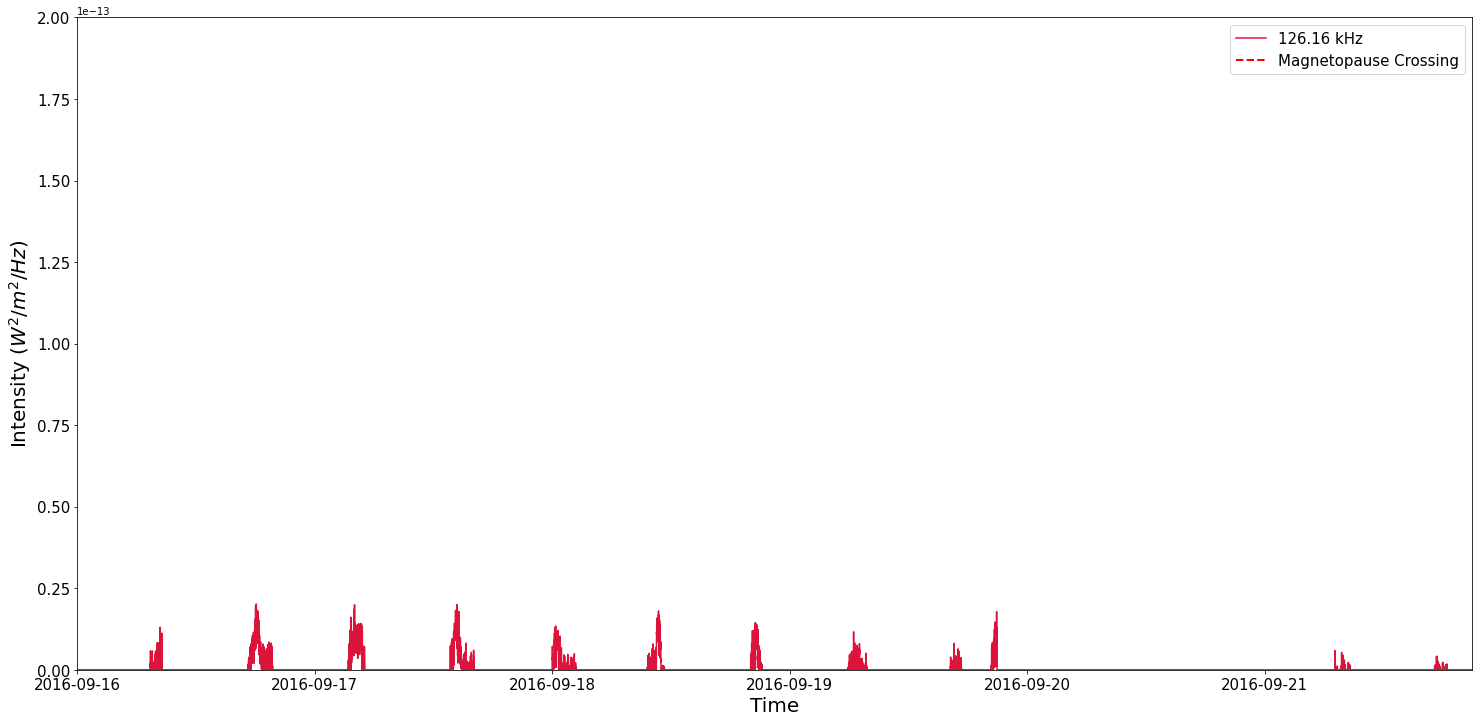

In [73]:
#Timeseries for compression on orbit two
plt.figure(figsize = (25,12))




plt.plot(time_n, timeseries_nKom[:,43], color = 'crimson', label = '126.16 kHz')

plt.axvline(x = datetime.datetime(2016, 9, 6, 11, 2), color='r', linestyle='dashed', linewidth=2, label = 'Magnetopause Crossing')
plt.axvline(x = datetime.datetime(2016, 9, 6, 21, 47), color='r', linestyle='dashed', linewidth=2)
plt.axvline(x = datetime.datetime(2016, 9, 7, 3, 15), color='r', linestyle='dashed', linewidth=2)
plt.axvline(x = datetime.datetime(2016, 9, 8, 23, 56), color='r', linestyle='dashed', linewidth=2)



#plt.axvspan(datetime.datetime(2016, 7, 14, 21, 18), datetime.datetime(2016, 7, 15, 7, 16), alpha=0.05, color='r', label = 'Magnetosheath')
#plt.axvspan(datetime.datetime(2016, 7, 15, 7, 16), datetime.datetime(2016, 7, 15, 17, 6), alpha=0.05, color='g', label = 'Magnetosphere')



plt.xlim(datetime.datetime(2016, 9, 16), datetime.datetime(2016, 9, 21, 21))

plt.xlabel("Time", fontsize = 20)
plt.ylabel("Intensity ($W^2/m^2/Hz$)", fontsize =20)

plt.legend(fontsize =15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.ylim(0, 2e-13)
plt.show()

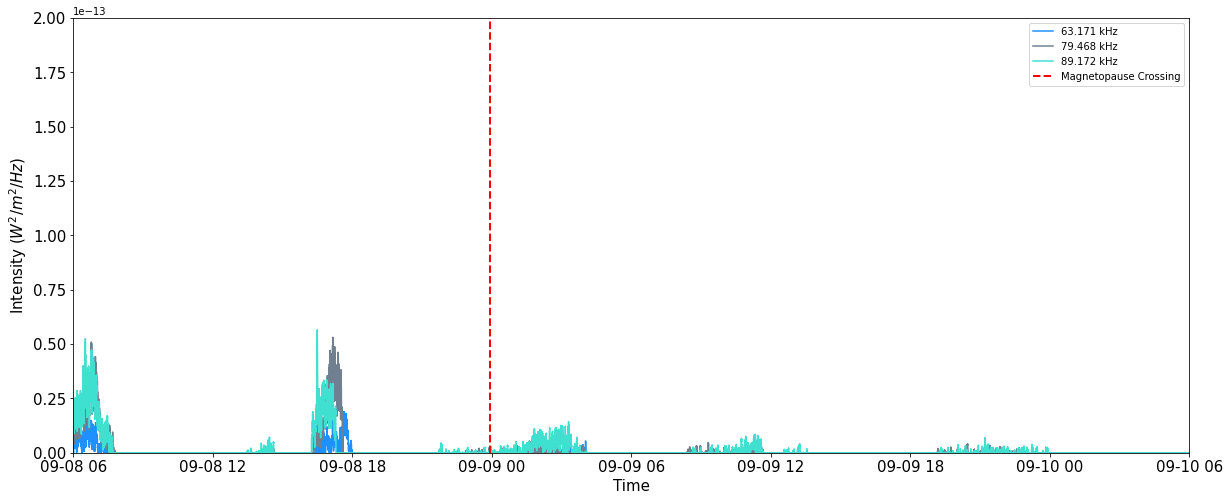

In [60]:
#Timeseries for compression on orbit two
plt.figure(figsize = (20,8))



plt.plot(time_n, timeseries_nKom[:,37], color = 'dodgerblue', label = '63.171 kHz')
plt.plot(time_n, timeseries_nKom[:,39], color = 'slategray', label = '79.468 kHz')
plt.plot(time_n, timeseries_nKom[:,40], color = 'turquoise', label = '89.172 kHz')

plt.axvline(x = datetime.datetime(2016, 9, 6, 11, 2), color='r', linestyle='dashed', linewidth=2, label = 'Magnetopause Crossing')
plt.axvline(x = datetime.datetime(2016, 9, 6, 21, 47), color='r', linestyle='dashed', linewidth=2)
plt.axvline(x = datetime.datetime(2016, 9, 7, 3, 15), color='r', linestyle='dashed', linewidth=2)
plt.axvline(x = datetime.datetime(2016, 9, 8, 23, 56), color='r', linestyle='dashed', linewidth=2)



#plt.axvspan(datetime.datetime(2016, 7, 14, 21, 18), datetime.datetime(2016, 7, 15, 7, 16), alpha=0.05, color='r', label = 'Magnetosheath')
#plt.axvspan(datetime.datetime(2016, 7, 15, 7, 16), datetime.datetime(2016, 7, 15, 17, 6), alpha=0.05, color='g', label = 'Magnetosphere')





plt.xlabel("Time", fontsize = 15)
plt.ylabel("Intensity ($W^2/m^2/Hz$)", fontsize =15)
plt.xlim(datetime.datetime(2016, 9, 8, 6), datetime.datetime(2016, 9, 10, 6))
plt.legend()
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.ylim(0, 2e-13)
plt.show()

In [36]:
print(frequencies_n)

[  1.001       1.123       1.2695      1.416       1.5869      1.7822
   2.002       2.2461002   2.5147      2.832       3.1738      3.54
   3.9795      4.4677997   5.0049      5.6152      6.2988      7.0801
   7.959       8.9355     10.01       11.23       12.622      14.16
  15.869      17.798      19.971      19.958      22.339      25.085
  28.198      31.677      35.522      39.917      44.861      50.171
  56.213      63.171      70.862      79.468      89.172     100.16
 112.43      126.16      141.54      140.14      157.23      177.73
 198.24      222.17      249.51      280.27     ]


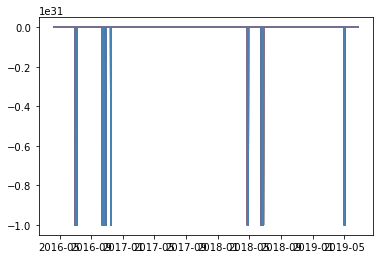

In [37]:
#All of the frequency bands




plt.plot(time_n, timeseries_nKom[:,21], color = 'black', label = '11.23')
plt.plot(time_n, timeseries_nKom[:,22], color = 'blue', label = '12.622')
plt.plot(time_n, timeseries_nKom[:,23], color = 'red', label = '14.16')
plt.plot(time_n, timeseries_nKom[:,24], color = 'cyan', label = '15.869 ')
plt.plot(time_n, timeseries_nKom[:,25], color = 'orange', label = '17.798')
plt.plot(time_n, timeseries_nKom[:,26], color = 'lightgreen', label = '19.971')
plt.plot(time_n, timeseries_nKom[:,27], color = 'darkslategrey', label = '19.958')
plt.plot(time_n, timeseries_nKom[:,28], color = 'lime', label = '22.339 kHz')
plt.plot(time_n, timeseries_nKom[:,29], color = 'magenta', label = '25.085 kHz')
plt.plot(time_n, timeseries_nKom[:,30], color = 'darkgreen', label = '28.198 kHz')
plt.plot(time_n, timeseries_nKom[:,31], color = 'gold', label = '31.677 kHz')
plt.plot(time_n, timeseries_nKom[:,32], color = 'mediumvioletred', label = '35.522 kHz')
plt.plot(time_n, timeseries_nKom[:,33], color = 'dimgrey', label = '39.917 kHz')
plt.plot(time_n, timeseries_nKom[:,34], color = 'cadetblue', label = '44.861 kHz')
plt.plot(time_n, timeseries_nKom[:,35], color = 'chocolate', label = '50.171 kHz')
plt.plot(time_n, timeseries_nKom[:,36], color = 'green', label = '56.213 kHz')
plt.plot(time_n, timeseries_nKom[:,37], color = 'mediumslateblue', label = '63.171 kHz')
plt.plot(time_n, timeseries_nKom[:,38], color = 'violet', label = '70.862 kHz')
plt.plot(time_n, timeseries_nKom[:,39], color = 'firebrick', label = '79.468 kHz')
plt.plot(time_n, timeseries_nKom[:,40], color = 'turquoise', label = '89.172 kHz')
plt.plot(time_n, timeseries_nKom[:,41], color = 'crimson', label = '100.16 kHz')
plt.plot(time_n, timeseries_nKom[:,42], color = 'steelblue', label = '112.43 kHz')

# Draw the BS / MP boundaries, given a Dynamic pressure (Pdyn) value

In [30]:
#Add Joy model standoffs to dataframe
def pdyn_to_mp(Pdyn=0.319, equatorial = False, noon_midnight = False, dawn_dusk = False):
	#set dynamic pressure as an entry

	
	deg=180.0 / np.pi
	#create grid
	xdatapts = ((np.arange(5001.0)*0.1 - 250.0)/120.0)
	xdatapts
	amagp = -0.134 + 0.488*Pdyn**(-.25)
	bmagp = -0.581 - 0.225*Pdyn**(-.25)
	cmagp = -0.186 - 0.016*Pdyn**(-.25)
	dmagp = -0.014 + 0.096*Pdyn
	emagp = -0.814 - 0.811*Pdyn
	fmagp = -0.050 + 0.168*Pdyn


	if equatorial: # z = 0, x = xdatapts, y : E*y**2+(F*x+D)*y + (A + B*x) = 0 
		aplot = emagp
		bplot = dmagp + fmagp*xdatapts
		cplot = amagp + bmagp*xdatapts + cmagp*(xdatapts**2)

	if noon_midnight: # y = 0, x = xdatapts, z : -z**2 + C*x**2 + B *x+ A = 0
		aplot = -1
		bplot = 0
		cplot = bmagp*xdatapts + bmagp*xdatapts + amagp

	if dawn_dusk:# x = 0, y = xdatapts, z : -z**2 + E*y**2+ D*y + A = 0 
		aplot = -1
		bplot = 0
		cplot =  emagp*xdatapts**2 + dmagp*amagp + amagp 


	#split to plot dawn side (0-180) 
	yplotplus = (-1*bplot + np.sqrt((bplot**2) - 4*aplot*cplot))/(2*aplot)
	#and split to make dusk side (180-360)
	yplotminus = (-1*bplot - np.sqrt((bplot**2) - 4*aplot*cplot))/(2*aplot)
	#rescale x and y to jovian radii as the calculations assume R/120
	yplotplused = 120*yplotplus
	yplotminused = 120*yplotminus
	#calculate the radial distance in Rj 0-180, then 180-360 as 2 separate halves of msphere
	xdataptsed = xdatapts*120.

	rad0plus = np.sqrt(xdataptsed*xdataptsed + yplotplused*yplotplused + 0j)
	rad180plus = np.sqrt(xdataptsed*xdataptsed + yplotminused*yplotminused + 0j)
	lt0plus = 180 - (np.arccos(xdataptsed/rad0plus)*deg)
	lt180plus = 180 + (np.arccos(xdataptsed/rad180plus)*deg)
	#put together 2 sides of MP using a dataframe
	rjltdawndf = pd.DataFrame(rad0plus)
	rjltdawndf.columns = ['Rad']
	rjltdawndf['LT']=lt0plus
	rjltduskdf = pd.DataFrame(np.flip(rad180plus))
	rjltduskdf.columns = ['Rad']
	rjltduskdf['LT']=np.flip(lt180plus)
	mprjlt=pd.concat([rjltdawndf,rjltduskdf])
	mprjlt



	#plt.plot(rjltdawndf.LT,rjltdawndf.Rad, '-b')
	#plt.plot(rjltduskdf.LT,rjltduskdf.Rad, '-b')


	return([xdataptsed, xdataptsed],[yplotplused,yplotminused])
	return
	

#Add Joy model standoffs to dataframe
def pdyn_to_bs(Pdyn=0.319, equatorial = False, noon_midnight = False, dawn_dusk = False):
	#set dynamic pressure as an entry
	deg=180.0 / np.pi
	#create grid
	xdatapts = ((np.arange(5001.0)*0.1 - 250.0)/120.0)
	xdatapts
	amagp = -1.107 + 1.591*Pdyn**(-.25)
	bmagp = -0.566 - 0.812*Pdyn**(-.25)
	cmagp =  0.048 - 0.059*Pdyn**(-.25)
	dmagp =  0.077 - 0.038*Pdyn
	emagp = -0.874 - 0.299*Pdyn
	fmagp = -0.055 + 0.124*Pdyn
	bplot = dmagp + fmagp*xdatapts
	aplot = emagp
	cplot = amagp + bmagp*xdatapts + cmagp*(xdatapts**2)
	#split to plot dawn side (0-180)
	
	yplotplus = (-1*bplot + np.sqrt((bplot**2) - 4*aplot*cplot))/(2*aplot)
	#and split to make dusk side (180-360)
	
	yplotminus = (-1*bplot - np.sqrt((bplot**2) - 4*aplot*cplot))/(2*aplot)
	#rescale x and y to jovian radii as the calculations assume R/120
	yplotplused = 120*yplotplus
	yplotminused = 120*yplotminus
	#calculate the radial distance in Rj 0-180, then 180-360 as 2 separate halves of msphere
	xdataptsed = xdatapts*120.
	
	rad0plus = np.sqrt(xdataptsed*xdataptsed + yplotplused*yplotplused + 0j)
	rad180plus = np.sqrt(xdataptsed*xdataptsed + yplotminused*yplotminused + 0j)
	lt0plus = 180 - (np.arccos(xdataptsed/rad0plus)*deg)
	lt180plus = 180 + (np.arccos(xdataptsed/rad180plus)*deg)
	#put together 2 sides of MP using a dataframe
	rjltdawndf = pd.DataFrame(rad0plus)
	rjltdawndf.columns = ['Rad']
	rjltdawndf['LT']=lt0plus
	rjltduskdf = pd.DataFrame(np.flip(rad180plus))
	rjltduskdf.columns = ['Rad']
	rjltduskdf['LT']=np.flip(lt180plus)
	mprjlt=pd.concat([rjltdawndf,rjltduskdf])




#	plt.plot(rjltdawndf.LT,rjltdawndf.Rad, '-k')
#	plt.plot(rjltduskdf.LT,rjltduskdf.Rad,'-k')


	return([xdataptsed, xdataptsed],[yplotplused,yplotminused])


In [31]:
def ms_boundaries_to_pdyn(x,y,z,magnetopause = False, bow_shock = False):
	
	#Inputs:
	#(x, y, z): JSE coordinates of the magnetopause or bow shock in planetary radius 

	#Ouput:
	# Pdyn (dynamic pressure) in nPa


	# In order to reduce numerical errors associated
	# with the least squares fitting process all lengths were scaled
	# by 120 (RJ /120).
	x/=120
	y/=120
	z/=120

	# Joy et al., 2002's equation:
	# A(Pdyn) + B(Pdyn)*x + C(Pdyn)*x**2 + D(Pdyn) * y + E(Pdyn)* y **2 + F(Pdyn)*x*y - z**2 = 0
	if bow_shock:
		#A = -1.107 + 1.591*Pdyn**(-.25)
		A_0 = -1.107
		A_1 = 1.591
		#B = -0.566 - 0.812*Pdyn**(-.25)
		B_0 = -0.566
		B_1 = - 0.812
		#C =  0.048 - 0.059*Pdyn**(-.25)
		C_0 =  0.048
		C_1 = - 0.059
		#D =  0.077 - 0.038*Pdyn
		D_0 = 0.077
		D_1 = - 0.038
		#E = -0.874 - 0.299*Pdyn
		E_0 = -0.874
		E_1 = - 0.299
		#F = -0.055 + 0.124*Pdyn
		F_0 = -0.055
		F_1 = + 0.124

	if magnetopause:
		#A = -0.134 + 0.488*Pdyn**(-.25)
		A_0 = -0.134
		A_1 = 0.488
		#B = -0.581 - 0.225*Pdyn**(-.25)
		B_0 = -0.581
		B_1 = - 0.225
		#C = -0.186 - 0.016*Pdyn**(-.25)
		C_0 = -0.186
		C_1 = - 0.016
		#D = -0.014 + 0.096*Pdyn
		D_0 = -0.014
		D_1 = 0.096
		#E = -0.814 - 0.811*Pdyn
		E_0 = -0.814
		E_1 = - 0.811
		#F = -0.050 + 0.168*Pdyn
		F_0 = -0.050
		F_1 = 0.168


	#Joy et al., 2020's equation with Pdyn being the unkown:
#		0 =
#		A_0 + B_0*x + C_0*x**2 + D_0*y +E_0 * y**2 +F_0* x * y - z**2
#		+  Pdyn**(-.25)*(A_1 + B_1*x + C_1*x**2) +
#		+ Pdyn*(F_1*x*y + D_1**y + E_1*y**2) 

# 		with P_tmp = Pdyn**(-1/4)
#		0 = 
#		(A_0 + B_0*x + C_0*x**2 + D_0*y +E_0 * y**2 +F_0* x * y - z**2)
#		+ P_tmp * (A_1 + B_1*x + C_1*x**2) +
#		+ P_tmp**(-4) (F_1*x*y + D_1**y + E_1*y**2)

#		0 = 
#		P_tmp**4 (A_0 + B_0*x + C_0*x**2 + D_0*y +E_0 * y**2 +F_0* x * y - z**2)
#		+ P_tmp**5 * (A_1 + B_1*x + C_1*x**2) +
#		+ (F_1*x*y + D_1**y + E_1*y**2)

#		a * P_tmp**5 + b * P_tmp**4 + f = 0

	b = A_0 +B_0*x + C_0*x**2 + D_0*y + E_0 * y**2 + F_0* x * y - z**2
	a = (A_1 + B_1*x + C_1*x**2)
	f = (F_1*x*y + D_1**y + E_1*y**2)

	f = nppol.Polynomial([f,0,0,0,b,a])


	roots = f.roots()

	roots = roots[(np.isreal(roots)) & (np.isreal(roots) > 0)]
	roots = roots.real
	#print(roots)
	#	P_tmp = Pdyn**(-1/4) --> Pdyn = tmp**(-4)
	roots = roots**(-4)

	return(roots)
	



#	#Joy et al., 2002's equation:
#	A + B*x + C*x**2 + D*y + E*y**2 + F*x*y - z**2 = 0
#
#	# 
#	if bow_shock:
#		A = -1.107 + 1.591*Pdyn**(-.25)
#		B = -0.566 - 0.812*Pdyn**(-.25)
#		C =  0.048 - 0.059*Pdyn**(-.25)
#		D =  0.077 - 0.038*Pdyn
#		E = -0.874 - 0.299*Pdyn
#		F = -0.055 + 0.124*Pdyn
#
#	if magnetopause:
#		A = -0.134 + 0.488*Pdyn**(-.25)
#		B = -0.581 - 0.225*Pdyn**(-.25)
#		C = -0.186 - 0.016*Pdyn**(-.25)
#		D = -0.014 + 0.096*Pdyn
#		E = -0.814 - 0.811*Pdyn
#		F = -0.050 + 0.168*Pdyn
#
#	# Pdyn is the only unkown:
#	<=> 0 = -1.107 + 1.591*Pdyn**(-.25) 
#		+ (-0.566 - 0.812*Pdyn**(-.25)) *x
#		+ (0.048 - 0.059*Pdyn**(-.25)) *x**2
#		+ (0.077 - 0.038*Pdyn) * y
#		+ (-0.874 - 0.299*Pdyn) * y**2
#		+ (-0.055 + 0.124*Pdyn) * x * y
#		- z**2
#
#
#
#		0 = 
#		- 1.107 -0.566*x + 0.048*x**2 + 0.077*y - 0.874 * y**2 - 0.055* x * y - z**2
#		+ 1.591*Pdyn**(-.25) 
#		- 0.812*Pdyn**(-.25)*x
#		- 0.059*Pdyn**(-.25) *x**2
#		- 0.038*Pdyn * y
#		- 0.299*Pdyn * y**2
#	    + 0.124*Pdyn * x * y
#		
#		
#	<=> 0 =
#		- 1.107 -0.566*x + 0.048*x**2 + 0.077*y - 0.874 * y**2 - 0.055* x * y - z**2
#		+  Pdyn**(-.25)*(1.591 - 0.812*x - 0.059*x**2) + Pdyn*(0.124*x*y - 0.038**y - 0.299*y**2) 
#	
#	then if:
#	b = - 1.107 -0.566*x + 0.048*x**2 + 0.077*y - 0.874 * y**2 - 0.055* x * y - z**2
#	a = (1.591 - 0.812*x - 0.059*x**2)
#	c = (0.124*x*y - 0.038**y - 0.299*y**2)
#	
#	<=> b + a* Pdyn**(-1/4)  + c* Pdyn = 0
#	
#	if P_tmp = Pdyn**(-1/4) <=> P_tmp = 1/Pdyn**(1/4) <=> P_tmp**4 = 1/Pdyn <=> Pdyn = P_tmp**-4 
#	
#	<=> b + a* P_tmp  + c* P_tmp**-4 = 0	
#	<=> b*P_tmp**4 + a* P_tmp*P_tmp**4  + c* P_tmp**-4 * P_tmp**4 = 0
#	<=> b*P_tmp**4 + a* P_tmp**5  + c = 0
#	
#	<=> a* P_tmp**5 + b*P_tmp**4 + c = 0
#	a = a & b = b & f = c
#	<=>
#	# Using the Tschirnhaus transformation: P = Y -b/a --> Y = P + b/a
#	Y**5 + p*Y**3 + q*Y**2 + r*Y +s = 0
#
#	with:
#	p = (- 2 b**2)/5a**2
#	q = (4*b**3)/25*a**2
#	r = (- 3b**4)/125*a**4
#	s = (3125*a**4*f + 4b**5)/3125a**5
#

pdyn = [0.24044393]


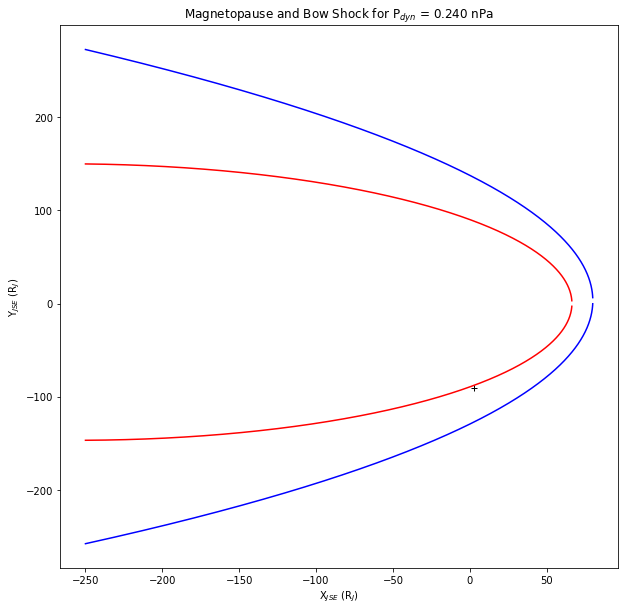

In [32]:
warnings.filterwarnings('ignore') #Hiding runtime warnings

#Plotting the predicted MP and BS positions given a set of coordiantes using the Joy model to give the upstream pdyn

#[x, y, z] position of a magnetopause crossing:
x_mp = 2.9
y_mp = -90
z_mp = 0

# determination of the dynamic pressure from [x, y, z] position (in JSE coordinate system ) of a magnetopause crossing
pdyn = ms_boundaries_to_pdyn(x_mp, y_mp, z_mp, magnetopause = True)

print("pdyn =", pdyn)
# determination of bow shock position (in equatorial plane, i.e. z = 0) for a given dynamic pressure
(x_eq_bs,y_eq_bs) = pdyn_to_bs(pdyn, equatorial = True)
# determination of magnetopause position (in equatorial plane, i.e. z = 0) for a given dynamic pressure
(x_eq_mp,y_eq_mp) = pdyn_to_mp(pdyn, equatorial = True)


#plotting
plt.figure(figsize=(10,10))

plt.title('Magnetopause and Bow Shock for P$_{dyn}$ = '+('%.3f' % pdyn[0])+' nPa')
plt.xlabel('X$_{JSE}$ (R$_J$)')
plt.ylabel('Y$_{JSE}$ (R$_J$)')

# plotting magnetopause crossing
plt.plot(x_mp, y_mp, '+k')
# plotting magnetopause boundaries
plt.plot(x_eq_mp[0], y_eq_mp[0], '-r')
plt.plot(x_eq_mp[1], y_eq_mp[1], '-r')
# plotting bow shock boundaries
plt.plot(x_eq_bs[0], y_eq_bs[0], '-b')
plt.plot(x_eq_bs[1], y_eq_bs[1], '-b')



plt.tight_layout
plt.show()

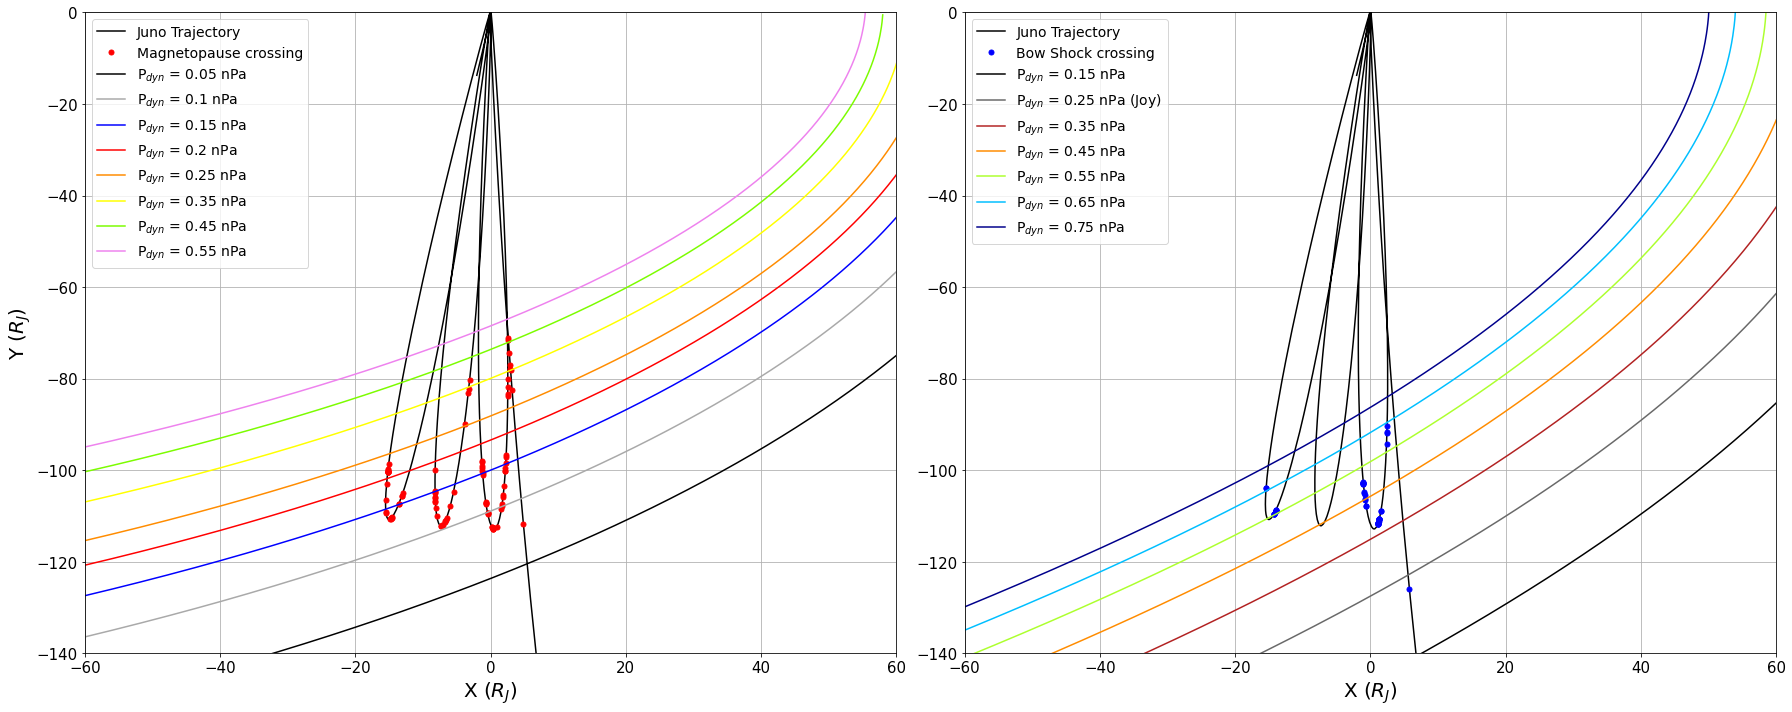

In [33]:
#Creating a "Rainbow Plot" a series of MP pdyn positions overlayed on the Juno trajectory and MP crossings
(x_eq_mp,y_eq_mp) = pdyn_to_mp(Pdyn=0.05, equatorial = True)
(x_eq_mp2,y_eq_mp2) = pdyn_to_mp(Pdyn=0.1, equatorial = True)
(x_eq_mp3,y_eq_mp3) = pdyn_to_mp(Pdyn=0.15, equatorial = True)
(x_eq_mp4,y_eq_mp4) = pdyn_to_mp(Pdyn=0.2, equatorial = True)
(x_eq_mp5,y_eq_mp5) = pdyn_to_mp(Pdyn=0.25, equatorial = True)
(x_eq_mp6,y_eq_mp6) = pdyn_to_mp(Pdyn=0.35, equatorial = True)
(x_eq_mp7,y_eq_mp7) = pdyn_to_mp(Pdyn=0.45, equatorial = True)
(x_eq_mp8,y_eq_mp8) = pdyn_to_mp(Pdyn=0.55, equatorial = True)



fig = plt.figure(figsize = (25,10))


ax = fig.add_subplot(121)
plt.plot(XcoordJSO[5000:56000], YcoordJSO[5000:56000], color = 'k', label = 'Juno Trajectory')
plt.plot(XcoordJSO1[0:97], YcoordJSO1[0:97], 'o', color = 'r', label = 'Magnetopause crossing', markersize = 5)


plt.plot(x_eq_mp[0], y_eq_mp[0], label = ('P$_{dyn}$ = 0.05 nPa'), color = 'black')
plt.plot(x_eq_mp[1], y_eq_mp[1])

plt.plot(x_eq_mp2[0], y_eq_mp2[0], label = ('P$_{dyn}$ = 0.1 nPa'), color = 'darkgrey')
plt.plot(x_eq_mp2[1], y_eq_mp2[1])

plt.plot(x_eq_mp3[0], y_eq_mp3[0], label = ('P$_{dyn}$ = 0.15 nPa'), color = 'blue')
plt.plot(x_eq_mp3[1], y_eq_mp3[1])

plt.plot(x_eq_mp4[0], y_eq_mp4[0], label = ('P$_{dyn}$ = 0.2 nPa'), color = 'red')
plt.plot(x_eq_mp4[1], y_eq_mp4[1])

plt.plot(x_eq_mp5[0], y_eq_mp5[0], label = ('P$_{dyn}$ = 0.25 nPa'), color = 'darkorange')
plt.plot(x_eq_mp5[1], y_eq_mp5[1])

plt.plot(x_eq_mp6[0], y_eq_mp6[0], label = ('P$_{dyn}$ = 0.35 nPa'), color = 'yellow')
plt.plot(x_eq_mp6[1], y_eq_mp6[1])

plt.plot(x_eq_mp7[0], y_eq_mp7[0], label = ('P$_{dyn}$ = 0.45 nPa'), color = 'lawngreen')
plt.plot(x_eq_mp7[1], y_eq_mp7[1])

plt.plot(x_eq_mp8[0], y_eq_mp8[0], label = ('P$_{dyn}$ = 0.55 nPa'),color = 'violet')
plt.plot(x_eq_mp8[1], y_eq_mp8[1])




plt.ylim(-140,0)
plt.xlim(-60,60)
plt.xlabel('X $(R_J)$',fontsize = 20)
plt.ylabel('Y $(R_J)$',fontsize = 20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.grid()
plt.legend(fontsize = 14)






#Creating a "Rainbow Plot" a series of BS pdyn positions overlayed on the Juno trajectory and BS crossings


(x_eq_bs,y_eq_bs) = pdyn_to_bs(Pdyn=0.15, equatorial = True)
(x_eq_bs2,y_eq_bs2) = pdyn_to_bs(Pdyn=0.25, equatorial = True)
(x_eq_bs3,y_eq_bs3) = pdyn_to_bs(Pdyn=0.35, equatorial = True)
(x_eq_bs4,y_eq_bs4) = pdyn_to_bs(Pdyn=0.45, equatorial = True)
(x_eq_bs5,y_eq_bs5) = pdyn_to_bs(Pdyn=0.55, equatorial = True)
(x_eq_bs6,y_eq_bs6) = pdyn_to_bs(Pdyn=0.65, equatorial = True)
(x_eq_bs7,y_eq_bs7) = pdyn_to_bs(Pdyn=0.75, equatorial = True)
(x_eq_bs8,y_eq_bs8) = pdyn_to_bs(Pdyn=0.8, equatorial = True)


ax2 = fig.add_subplot(122)
plt.plot(XcoordJSO[5000:56000], YcoordJSO[5000:56000], color = 'k', label = 'Juno Trajectory')
plt.plot(XcoordJSO2[0:51], YcoordJSO2[0:51], 'o', color = 'b', label = 'Bow Shock crossing', markersize = 5)

plt.plot(x_eq_bs[0], y_eq_bs[0], label = ('P$_{dyn}$ = 0.15 nPa'), color = 'black')
plt.plot(x_eq_bs[1], y_eq_bs[1])

plt.plot(x_eq_bs2[0], y_eq_bs2[0], label = ('P$_{dyn}$ = 0.25 nPa (Joy)'), color = 'dimgrey')
plt.plot(x_eq_bs2[1], y_eq_bs2[1])

plt.plot(x_eq_bs3[0], y_eq_bs3[0], label = ('P$_{dyn}$ = 0.35 nPa'), color = 'firebrick')
plt.plot(x_eq_bs3[1], y_eq_bs3[1])

plt.plot(x_eq_bs4[0], y_eq_bs4[0], label = ('P$_{dyn}$ = 0.45 nPa'), color = 'darkorange')
plt.plot(x_eq_bs4[1], y_eq_bs4[1])

plt.plot(x_eq_bs5[0], y_eq_bs5[0], label = ('P$_{dyn}$ = 0.55 nPa'), color = 'greenyellow')
plt.plot(x_eq_bs5[1], y_eq_bs5[1])

plt.plot(x_eq_bs6[0], y_eq_bs6[0], label = ('P$_{dyn}$ = 0.65 nPa'), color = 'deepskyblue')
plt.plot(x_eq_bs6[1], y_eq_bs6[1])

plt.plot(x_eq_bs7[0], y_eq_bs7[0], label = ('P$_{dyn}$ = 0.75 nPa'), color = 'darkblue')
plt.plot(x_eq_bs7[1], y_eq_bs7[1])




plt.ylim(-140,0)
plt.xlim(-60,60)
plt.xlabel('X $(R_J)$',fontsize = 20)

plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.grid()
plt.legend(fontsize = 14)
plt.tight_layout()
plt.show()

In [34]:
# determination of the dynamic pressure from [x, y, z] position (in JSE coordinate system ) of a magnetopause crossing
pdyn = ms_boundaries_to_pdyn(XcoordJSO1[2], YcoordJSO1[2], ZcoordJSO1[2], magnetopause = True)

print("pdyn =", pdyn)

pdyn = [0.27507463]


In [35]:
#Pdyn for BS crossing coordinates - not working
#[x, y, z] position of a Bow Shock crossing:
x_bs = -0.611727
y_bs = -107.927
z_bs = -5.89126

# determination of the dynamic pressure from [x, y, z] position (in JSE coordinate system ) of a Bow Shock crossing
pdyn = ms_boundaries_to_pdyn(x_bs, y_bs, z_bs, bow_shock = True)

print("pdyn =", pdyn)



pdyn = []


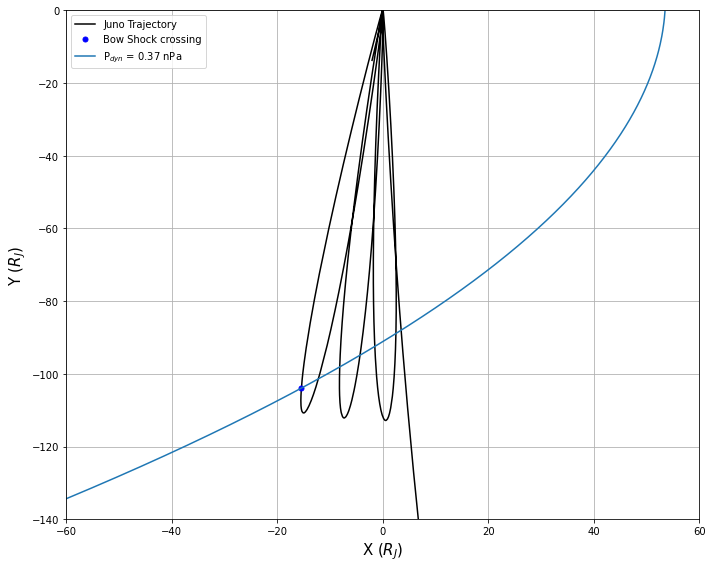

In [36]:
#Trying to find pdyn for bow shock crossings by fitting curves by eye - For some reason the Joy model is unable to
#return an upstream pdyn for the bs as it was for the mp


#(x_eq_bs,y_eq_bs) = pdyn_to_bs(Pdyn=0.229, equatorial = True)
#(x_eq_bs1,y_eq_bs1) = pdyn_to_bs(Pdyn=0.633, equatorial = True)
#(x_eq_bs2,y_eq_bs2) = pdyn_to_bs(Pdyn=0.609, equatorial = True)
#(x_eq_bs3,y_eq_bs3) = pdyn_to_bs(Pdyn=0.609, equatorial = True)
#(x_eq_bs4,y_eq_bs4) = pdyn_to_bs(Pdyn=0.575, equatorial = True)
#(x_eq_bs5,y_eq_bs5) = pdyn_to_bs(Pdyn=0.397, equatorial = True)
#(x_eq_bs6,y_eq_bs6) = pdyn_to_bs(Pdyn=0.397, equatorial = True)
#(x_eq_bs7,y_eq_bs7) = pdyn_to_bs(Pdyn=0.381, equatorial = True)
#(x_eq_bs8,y_eq_bs8) = pdyn_to_bs(Pdyn=0.381, equatorial = True)
#(x_eq_bs9,y_eq_bs9) = pdyn_to_bs(Pdyn=0.381, equatorial = True)
#(x_eq_bs10,y_eq_bs10) = pdyn_to_bs(Pdyn=0.377, equatorial = True)
#(x_eq_bs11,y_eq_bs11) = pdyn_to_bs(Pdyn=0.377, equatorial = True)
#(x_eq_bs12,y_eq_bs12) = pdyn_to_bs(Pdyn=0.377, equatorial = True)
#(x_eq_bs13,y_eq_bs13) = pdyn_to_bs(Pdyn=0.377, equatorial = True)
#(x_eq_bs14,y_eq_bs14) = pdyn_to_bs(Pdyn=0.374, equatorial = True)
#(x_eq_bs15,y_eq_bs15) = pdyn_to_bs(Pdyn=0.371, equatorial = True)
#(x_eq_bs16,y_eq_bs16) = pdyn_to_bs(Pdyn=0.371, equatorial = True)
#(x_eq_bs17,y_eq_bs17) = pdyn_to_bs(Pdyn=0.371, equatorial = True)
#(x_eq_bs18,y_eq_bs18) = pdyn_to_bs(Pdyn=0.371, equatorial = True)
#(x_eq_bs19,y_eq_bs19) = pdyn_to_bs(Pdyn=0.371, equatorial = True)
#(x_eq_bs20,y_eq_bs20) = pdyn_to_bs(Pdyn=0.368, equatorial = True)
#(x_eq_bs21,y_eq_bs21) = pdyn_to_bs(Pdyn=0.368, equatorial = True)
#(x_eq_bs22,y_eq_bs22) = pdyn_to_bs(Pdyn=0.368, equatorial = True)
#(x_eq_bs23,y_eq_bs23) = pdyn_to_bs(Pdyn=0.425, equatorial = True)
#(x_eq_bs24,y_eq_bs24) = pdyn_to_bs(Pdyn=0.433, equatorial = True)
#(x_eq_bs25,y_eq_bs25) = pdyn_to_bs(Pdyn=0.444, equatorial = True)
#(x_eq_bs26,y_eq_bs26) = pdyn_to_bs(Pdyn=0.448, equatorial = True)
#(x_eq_bs27,y_eq_bs27) = pdyn_to_bs(Pdyn=0.462, equatorial = True)
#(x_eq_bs28,y_eq_bs28) = pdyn_to_bs(Pdyn=0.465, equatorial = True)
#(x_eq_bs29,y_eq_bs29) = pdyn_to_bs(Pdyn=0.468, equatorial = True)
#(x_eq_bs30,y_eq_bs30) = pdyn_to_bs(Pdyn=0.492, equatorial = True)
#(x_eq_bs31,y_eq_bs31) = pdyn_to_bs(Pdyn=0.495, equatorial = True)
#(x_eq_bs32,y_eq_bs32) = pdyn_to_bs(Pdyn=0.496, equatorial = True)
#(x_eq_bs33,y_eq_bs33) = pdyn_to_bs(Pdyn=0.496, equatorial = True)
#(x_eq_bs34,y_eq_bs34) = pdyn_to_bs(Pdyn=0.496, equatorial = True)
#(x_eq_bs35,y_eq_bs35) = pdyn_to_bs(Pdyn=0.496, equatorial = True)
#(x_eq_bs36,y_eq_bs36) = pdyn_to_bs(Pdyn=0.500, equatorial = True)
#(x_eq_bs37,y_eq_bs37) = pdyn_to_bs(Pdyn=0.558, equatorial = True)
#(x_eq_bs38,y_eq_bs38) = pdyn_to_bs(Pdyn=0.558, equatorial = True)
#(x_eq_bs39,y_eq_bs39) = pdyn_to_bs(Pdyn=0.558, equatorial = True)
#(x_eq_bs40,y_eq_bs40) = pdyn_to_bs(Pdyn=0.556, equatorial = True)
#(x_eq_bs41,y_eq_bs41) = pdyn_to_bs(Pdyn=0.556, equatorial = True)
#(x_eq_bs42,y_eq_bs42) = pdyn_to_bs(Pdyn=0.556, equatorial = True)
#(x_eq_bs43,y_eq_bs43) = pdyn_to_bs(Pdyn=0.556, equatorial = True)
#(x_eq_bs44,y_eq_bs44) = pdyn_to_bs(Pdyn=0.556, equatorial = True)
#(x_eq_bs45,y_eq_bs45) = pdyn_to_bs(Pdyn=0.551, equatorial = True)
#(x_eq_bs46,y_eq_bs46) = pdyn_to_bs(Pdyn=0.551, equatorial = True)
#(x_eq_bs47,y_eq_bs47) = pdyn_to_bs(Pdyn=0.551, equatorial = True)
#(x_eq_bs48,y_eq_bs48) = pdyn_to_bs(Pdyn=0.551, equatorial = True)
#(x_eq_bs49,y_eq_bs49) = pdyn_to_bs(Pdyn=0.661, equatorial = True)
(x_eq_bs50,y_eq_bs50) = pdyn_to_bs(Pdyn=0.661, equatorial = True)





plt.figure(figsize = (10,8))
plt.plot(XcoordJSO[5000:56000], YcoordJSO[5000:56000], color = 'k', label = 'Juno Trajectory')
plt.plot(XcoordJSO2[50], YcoordJSO2[50], 'o', color = 'b', label = 'Bow Shock crossing', markersize = 5)

#plt.plot(x_eq_bs[0], y_eq_bs[0], label = ('P$_{dyn}$ = 0.229 nPa'))
#plt.plot(x_eq_bs[1], y_eq_bs[1])

#plt.plot(x_eq_bs1[0], y_eq_bs1[0], label = ('P$_{dyn}$ = 0.37 nPa'))
#plt.plot(x_eq_bs1[1], y_eq_bs1[1])

#plt.plot(x_eq_bs2[0], y_eq_bs2[0], label = ('P$_{dyn}$ = 0.37 nPa'))
#plt.plot(x_eq_bs2[1], y_eq_bs2[1])

#plt.plot(x_eq_bs3[0], y_eq_bs3[0], label = ('P$_{dyn}$ = 0.37 nPa'))
#plt.plot(x_eq_bs3[1], y_eq_bs3[1])

#plt.plot(x_eq_bs4[0], y_eq_bs4[0], label = ('P$_{dyn}$ = 0.37 nPa'))
#plt.plot(x_eq_bs4[1], y_eq_bs4[1])

#plt.plot(x_eq_bs5[0], y_eq_bs5[0], label = ('P$_{dyn}$ = 0.37 nPa'))
#plt.plot(x_eq_bs5[1], y_eq_bs5[1])

#plt.plot(x_eq_bs6[0], y_eq_bs6[0], label = ('P$_{dyn}$ = 0.37 nPa'))
#plt.plot(x_eq_bs6[1], y_eq_bs6[1])

#plt.plot(x_eq_bs7[0], y_eq_bs7[0], label = ('P$_{dyn}$ = 0.37 nPa'))
#plt.plot(x_eq_bs7[1], y_eq_bs7[1])

#plt.plot(x_eq_bs8[0], y_eq_bs8[0], label = ('P$_{dyn}$ = 0.37 nPa'))
#plt.plot(x_eq_bs8[1], y_eq_bs8[1])

#plt.plot(x_eq_bs9[0], y_eq_bs9[0], label = ('P$_{dyn}$ = 0.37 nPa'))
#plt.plot(x_eq_bs9[1], y_eq_bs9[1])

#plt.plot(x_eq_bs10[0], y_eq_bs10[0], label = ('P$_{dyn}$ = 0.37 nPa'))
#plt.plot(x_eq_bs10[1], y_eq_bs10[1])

#plt.plot(x_eq_bs11[0], y_eq_bs11[0], label = ('P$_{dyn}$ = 0.37 nPa'))
#plt.plot(x_eq_bs11[1], y_eq_bs11[1])

#plt.plot(x_eq_bs12[0], y_eq_bs12[0], label = ('P$_{dyn}$ = 0.37 nPa'))
#plt.plot(x_eq_bs12[1], y_eq_bs12[1])

#plt.plot(x_eq_bs13[0], y_eq_bs13[0], label = ('P$_{dyn}$ = 0.37 nPa'))
#plt.plot(x_eq_bs13[1], y_eq_bs13[1])

#plt.plot(x_eq_bs14[0], y_eq_bs14[0], label = ('P$_{dyn}$ = 0.37 nPa'))
#plt.plot(x_eq_bs14[1], y_eq_bs14[1])

#plt.plot(x_eq_bs15[0], y_eq_bs15[0], label = ('P$_{dyn}$ = 0.37 nPa'))
#plt.plot(x_eq_bs15[1], y_eq_bs15[1])

#plt.plot(x_eq_bs16[0], y_eq_bs16[0], label = ('P$_{dyn}$ = 0.37 nPa'))
#plt.plot(x_eq_bs16[1], y_eq_bs16[1])

#plt.plot(x_eq_bs17[0], y_eq_bs17[0], label = ('P$_{dyn}$ = 0.37 nPa'))
#plt.plot(x_eq_bs17[1], y_eq_bs17[1])

#plt.plot(x_eq_bs18[0], y_eq_bs18[0], label = ('P$_{dyn}$ = 0.37 nPa'))
#plt.plot(x_eq_bs18[1], y_eq_bs18[1])

#plt.plot(x_eq_bs19[0], y_eq_bs19[0], label = ('P$_{dyn}$ = 0.37 nPa'))
#plt.plot(x_eq_bs19[1], y_eq_bs19[1])

#plt.plot(x_eq_bs20[0], y_eq_bs20[0], label = ('P$_{dyn}$ = 0.37 nPa'))
#plt.plot(x_eq_bs20[1], y_eq_bs20[1])

#plt.plot(x_eq_bs21[0], y_eq_bs21[0], label = ('P$_{dyn}$ = 0.37 nPa'))
#plt.plot(x_eq_bs21[1], y_eq_bs21[1])

#plt.plot(x_eq_bs22[0], y_eq_bs22[0], label = ('P$_{dyn}$ = 0.37 nPa'))
#plt.plot(x_eq_bs22[1], y_eq_bs22[1])

#plt.plot(x_eq_bs23[0], y_eq_bs23[0], label = ('P$_{dyn}$ = 0.37 nPa'))
#plt.plot(x_eq_bs23[1], y_eq_bs23[1])

#plt.plot(x_eq_bs24[0], y_eq_bs24[0], label = ('P$_{dyn}$ = 0.37 nPa'))
#plt.plot(x_eq_bs24[1], y_eq_bs24[1])

#plt.plot(x_eq_bs25[0], y_eq_bs25[0], label = ('P$_{dyn}$ = 0.37 nPa'))
#plt.plot(x_eq_bs25[1], y_eq_bs25[1])

#plt.plot(x_eq_bs26[0], y_eq_bs26[0], label = ('P$_{dyn}$ = 0.37 nPa'))
#plt.plot(x_eq_bs26[1], y_eq_bs26[1])

#plt.plot(x_eq_bs27[0], y_eq_bs27[0], label = ('P$_{dyn}$ = 0.37 nPa'))
#plt.plot(x_eq_bs27[1], y_eq_bs27[1])

#plt.plot(x_eq_bs28[0], y_eq_bs28[0], label = ('P$_{dyn}$ = 0.37 nPa'))
#plt.plot(x_eq_bs28[1], y_eq_bs28[1])

#plt.plot(x_eq_bs29[0], y_eq_bs29[0], label = ('P$_{dyn}$ = 0.37 nPa'))
#plt.plot(x_eq_bs29[1], y_eq_bs29[1])

#plt.plot(x_eq_bs30[0], y_eq_bs30[0], label = ('P$_{dyn}$ = 0.37 nPa'))
#plt.plot(x_eq_bs30[1], y_eq_bs30[1])

#plt.plot(x_eq_bs31[0], y_eq_bs31[0], label = ('P$_{dyn}$ = 0.37 nPa'))
#plt.plot(x_eq_bs31[1], y_eq_bs31[1])

#plt.plot(x_eq_bs32[0], y_eq_bs32[0], label = ('P$_{dyn}$ = 0.37 nPa'))
#plt.plot(x_eq_bs32[1], y_eq_bs32[1])

#plt.plot(x_eq_bs33[0], y_eq_bs33[0], label = ('P$_{dyn}$ = 0.37 nPa'))
#plt.plot(x_eq_bs33[1], y_eq_bs33[1])

#plt.plot(x_eq_bs34[0], y_eq_bs34[0], label = ('P$_{dyn}$ = 0.37 nPa'))
#plt.plot(x_eq_bs34[1], y_eq_bs34[1])

#plt.plot(x_eq_bs35[0], y_eq_bs35[0], label = ('P$_{dyn}$ = 0.37 nPa'))
#plt.plot(x_eq_bs35[1], y_eq_bs35[1])

#plt.plot(x_eq_bs36[0], y_eq_bs36[0], label = ('P$_{dyn}$ = 0.37 nPa'))
#plt.plot(x_eq_bs36[1], y_eq_bs36[1])

#plt.plot(x_eq_bs37[0], y_eq_bs37[0], label = ('P$_{dyn}$ = 0.37 nPa'))
#plt.plot(x_eq_bs37[1], y_eq_bs37[1])

#plt.plot(x_eq_bs38[0], y_eq_bs38[0], label = ('P$_{dyn}$ = 0.37 nPa'))
#plt.plot(x_eq_bs38[1], y_eq_bs38[1])

#plt.plot(x_eq_bs39[0], y_eq_bs39[0], label = ('P$_{dyn}$ = 0.37 nPa'))
#plt.plot(x_eq_bs39[1], y_eq_bs39[1])

#plt.plot(x_eq_bs40[0], y_eq_bs40[0], label = ('P$_{dyn}$ = 0.37 nPa'))
#plt.plot(x_eq_bs40[1], y_eq_bs40[1])

#plt.plot(x_eq_bs41[0], y_eq_bs41[0], label = ('P$_{dyn}$ = 0.37 nPa'))
#plt.plot(x_eq_bs41[1], y_eq_bs41[1])

#plt.plot(x_eq_bs42[0], y_eq_bs42[0], label = ('P$_{dyn}$ = 0.37 nPa'))
#plt.plot(x_eq_bs42[1], y_eq_bs42[1])

#plt.plot(x_eq_bs43[0], y_eq_bs43[0], label = ('P$_{dyn}$ = 0.37 nPa'))
#plt.plot(x_eq_bs43[1], y_eq_bs43[1])

#plt.plot(x_eq_bs44[0], y_eq_bs44[0], label = ('P$_{dyn}$ = 0.37 nPa'))
#plt.plot(x_eq_bs44[1], y_eq_bs44[1])

#plt.plot(x_eq_bs45[0], y_eq_bs45[0], label = ('P$_{dyn}$ = 0.37 nPa'))
#plt.plot(x_eq_bs45[1], y_eq_bs45[1])

#plt.plot(x_eq_bs46[0], y_eq_bs46[0], label = ('P$_{dyn}$ = 0.37 nPa'))
#plt.plot(x_eq_bs46[1], y_eq_bs46[1])

#plt.plot(x_eq_bs47[0], y_eq_bs47[0], label = ('P$_{dyn}$ = 0.37 nPa'))
#plt.plot(x_eq_bs47[1], y_eq_bs47[1])

#plt.plot(x_eq_bs48[0], y_eq_bs48[0], label = ('P$_{dyn}$ = 0.37 nPa'))
#plt.plot(x_eq_bs48[1], y_eq_bs48[1])

#plt.plot(x_eq_bs49[0], y_eq_bs49[0], label = ('P$_{dyn}$ = 0.37 nPa'))
#plt.plot(x_eq_bs49[1], y_eq_bs49[1])

plt.plot(x_eq_bs50[0], y_eq_bs50[0], label = ('P$_{dyn}$ = 0.37 nPa'))
plt.plot(x_eq_bs50[1], y_eq_bs50[1])




plt.ylim(-140,0)
plt.xlim(-60,60)
plt.xlabel('X $(R_J)$',fontsize = 15)
plt.ylabel('Y $(R_J)$',fontsize = 15)
plt.grid()
plt.legend()
plt.tight_layout()
plt.show()

In [30]:
#Plotting the MP boundary for the median Pdyn values for mp crossings

np.median(pdyns_mp)

0.2042984665032533

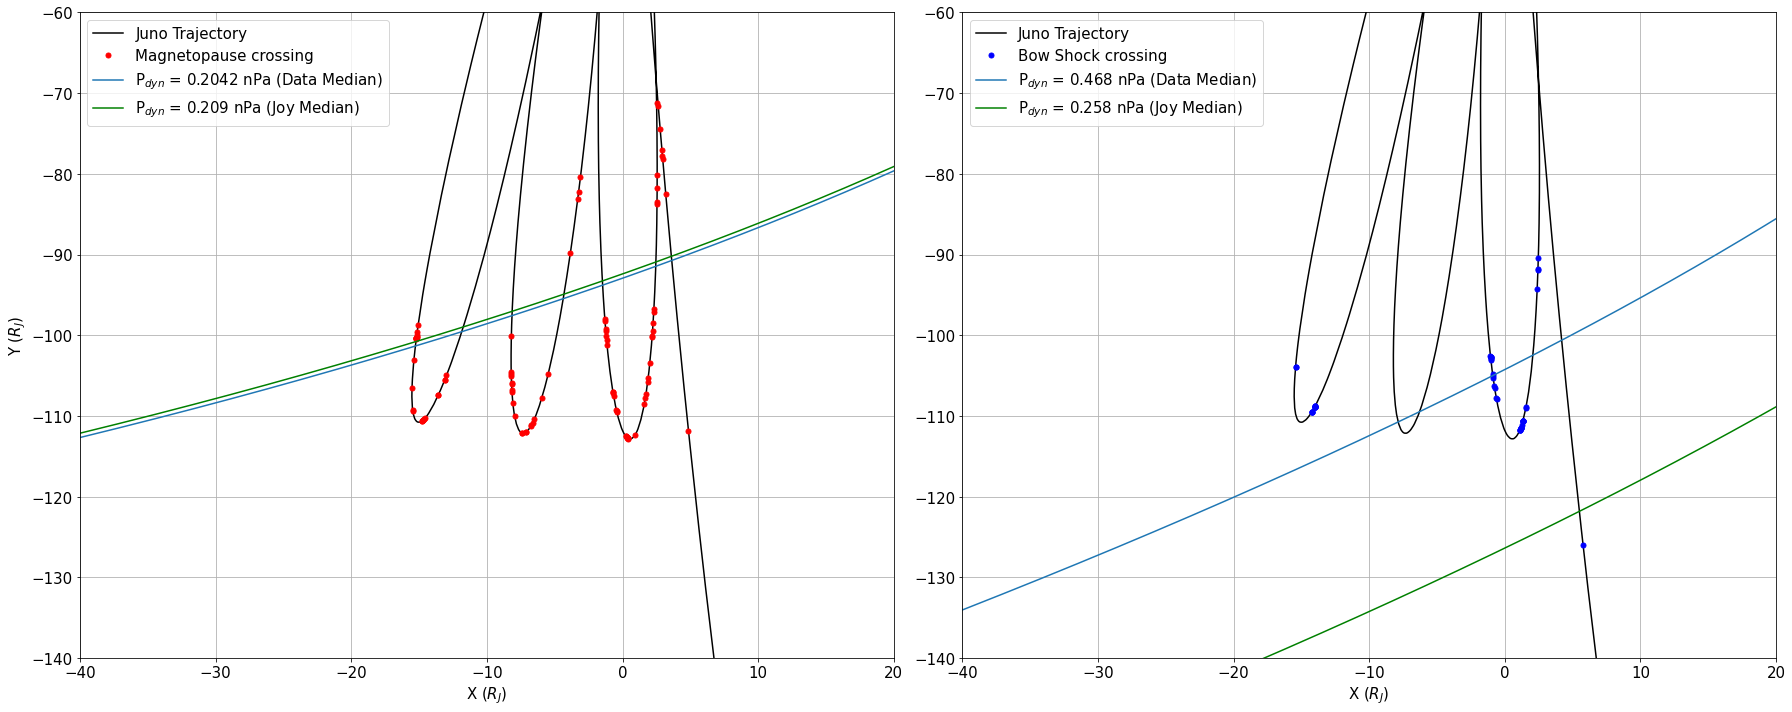

<Figure size 432x288 with 0 Axes>

In [37]:

(x_eq_mp,y_eq_mp) = pdyn_to_mp(Pdyn=0.2042984665032533, equatorial = True)
(x_eq_mp1,y_eq_mp1) = pdyn_to_mp(Pdyn=0.209, equatorial = True)



fig = plt.figure(figsize = (25,10))

ax5 = fig.add_subplot(121)
plt.plot(XcoordJSO[5000:56000], YcoordJSO[5000:56000], color = 'k', label = 'Juno Trajectory')
plt.plot(XcoordJSO1[0:97], YcoordJSO1[0:97], 'o', color = 'r', label = 'Magnetopause crossing', markersize = 5)


plt.plot(x_eq_mp[0], y_eq_mp[0], label = ('P$_{dyn}$ = 0.2042 nPa (Data Median)'), color = 'tab:blue')
plt.plot(x_eq_mp[1], y_eq_mp[1])

plt.plot(x_eq_mp1[0], y_eq_mp1[0], label = ('P$_{dyn}$ = 0.209 nPa (Joy Median)'), color = 'g')
plt.plot(x_eq_mp1[1], y_eq_mp1[1])




plt.ylim(-140,-60)
plt.xlim(-40,20)
plt.xlabel('X $(R_J)$',fontsize = 15)
plt.ylabel('Y $(R_J)$',fontsize = 15)
plt.grid()
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend(fontsize=15)





(x_eq_bs,y_eq_bs) = pdyn_to_bs(Pdyn=0.468, equatorial = True)
(x_eq_bs1,y_eq_bs1) = pdyn_to_bs(Pdyn=0.258, equatorial = True)

ax6 = fig.add_subplot(122)
plt.plot(XcoordJSO[5000:56000], YcoordJSO[5000:56000], color = 'k', label = 'Juno Trajectory')
plt.plot(XcoordJSO2[0:51], YcoordJSO2[0:51], 'o', color = 'b', label = 'Bow Shock crossing', markersize = 5)

plt.plot(x_eq_bs[0], y_eq_bs[0], label = ('P$_{dyn}$ = 0.468 nPa (Data Median)'), color = 'tab:blue')
plt.plot(x_eq_bs[1], y_eq_bs[1])

plt.plot(x_eq_bs1[0], y_eq_bs1[0], label = ('P$_{dyn}$ = 0.258 nPa (Joy Median)'), color = 'g')
plt.plot(x_eq_bs1[1], y_eq_bs1[1])



plt.ylim(-140,-60)
plt.xlim(-40,20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('X $(R_J)$',fontsize = 15)

plt.grid()
plt.legend(fontsize = 15)
plt.tight_layout()
plt.show()





plt.tight_layout()
plt.show()

# Pdyn Histograms

In [38]:
#pdyn for XYZ of mp crossing using function to store in an array for histogram

pdyns = []
for i in range(len(XcoordJSO1)):
    #pressure for each x and y value
    pdyn1 = ms_boundaries_to_pdyn(XcoordJSO1[i], YcoordJSO1[i], ZcoordJSO1[i], magnetopause = True)
    pdyns.append(pdyn1)
    
    
pdyns_mp = np.concatenate(pdyns, axis = 0)    
print(pdyns_mp)    

[0.19584008 0.26354472 0.27507463 0.2759437  0.27788837 0.28524611
 0.29319204 0.26981663 0.265153   0.26075804 0.25985465 0.29517954
 0.22734768 0.2264729  0.22321731 0.22079314 0.2192485  0.21921123
 0.21154613 0.20733449 0.20637722 0.20293709 0.20199647 0.20031898
 0.19168665 0.19046784 0.19047622 0.19048251 0.19059584 0.19063527
 0.19068947 0.19086394 0.19088025 0.19637267 0.19675048 0.19689885
 0.20043036 0.20117759 0.20128842 0.20132064 0.213617   0.21492453
 0.21589461 0.21726468 0.21785212 0.21984341 0.22050703 0.26717495
 0.26227179 0.25986551 0.24261028 0.20735265 0.20056822 0.19481758
 0.19382486 0.19315855 0.19279608 0.19121669 0.19102391 0.19060775
 0.19060701 0.19427122 0.1973903  0.20005642 0.20046565 0.201936
 0.20217203 0.20389869 0.20448426 0.20499236 0.21429714 0.20560301
 0.20429847 0.20429847 0.20030349 0.20023022 0.19367448 0.19339668
 0.19321748 0.19315462 0.19305195 0.19291824 0.19275779 0.19450866
 0.19481052 0.19972736 0.20664942 0.21214756 0.212256   0.212318

In [39]:
print(pdyns_mp[96])
print(pdyns_mp[70])

0.2156661745224616
0.21429713509204756


In [40]:
#Sorting by decreasing pdyn for mp
np.argsort(-pdyns_mp)

array([11,  6,  5,  4,  3,  2,  7, 47,  8,  1, 48,  9, 49, 10, 50, 12, 13,
       14, 15, 46, 45, 16, 17, 44, 43, 42, 96, 41, 70, 95, 40, 94, 93, 92,
       91, 90, 89, 88, 87, 18, 51, 19, 86, 20, 71, 69, 68, 73, 72, 67, 21,
       66, 22, 65, 39, 38, 37, 52, 64, 36, 23, 74, 75, 63, 85, 62, 35, 34,
       33,  0, 53, 84, 83, 61, 54, 76, 77, 78, 55, 79, 80, 81, 56, 82, 24,
       57, 58, 32, 31, 30, 29, 59, 60, 28, 27, 26, 25])

In [41]:
pdyns_mp[np.argsort(-pdyns_mp)]

array([0.29517954, 0.29319204, 0.28524611, 0.27788837, 0.2759437 ,
       0.27507463, 0.26981663, 0.26717495, 0.265153  , 0.26354472,
       0.26227179, 0.26075804, 0.25986551, 0.25985465, 0.24261028,
       0.22734768, 0.2264729 , 0.22321731, 0.22079314, 0.22050703,
       0.21984341, 0.2192485 , 0.21921123, 0.21785212, 0.21726468,
       0.21589461, 0.21566617, 0.21492453, 0.21429714, 0.21375598,
       0.213617  , 0.21315781, 0.21261724, 0.21258588, 0.21236661,
       0.21231859, 0.21231859, 0.212256  , 0.21214756, 0.21154613,
       0.20735265, 0.20733449, 0.20664942, 0.20637722, 0.20560301,
       0.20499236, 0.20448426, 0.20429847, 0.20429847, 0.20389869,
       0.20293709, 0.20217203, 0.20199647, 0.201936  , 0.20132064,
       0.20128842, 0.20117759, 0.20056822, 0.20046565, 0.20043036,
       0.20031898, 0.20030349, 0.20023022, 0.20005642, 0.19972736,
       0.1973903 , 0.19689885, 0.19675048, 0.19637267, 0.19584008,
       0.19481758, 0.19481052, 0.19450866, 0.19427122, 0.19382

In [42]:
pdyns_bs = np.array([0.229, 0.633, 0.609, 0.609, 0.575, 0.397, 0.397, 0.381, 0.381, 0.381, 0.377, 0.377, 0.377, 0.377, 0.374, 0.371, 0.371, 0.371, 0.371, 0.371, 0.368, 0.368, 0.368, 0.425, 0.433, 0.444, 0.448, 0.462, 0.465, 0.468, 0.492, 0.495, 0.496, 0.496, 0.496, 0.496, 0.500, 0.558, 0.558, 0.558, 0.556, 0.556, 0.556, 0.556, 0.556, 0.551, 0.551, 0.551, 0.551, 0.661, 0.661])
print(pdyns_bs)

[0.229 0.633 0.609 0.609 0.575 0.397 0.397 0.381 0.381 0.381 0.377 0.377
 0.377 0.377 0.374 0.371 0.371 0.371 0.371 0.371 0.368 0.368 0.368 0.425
 0.433 0.444 0.448 0.462 0.465 0.468 0.492 0.495 0.496 0.496 0.496 0.496
 0.5   0.558 0.558 0.558 0.556 0.556 0.556 0.556 0.556 0.551 0.551 0.551
 0.551 0.661 0.661]


In [43]:
np.argsort(-pdyns_bs)

array([50, 49,  1,  2,  3,  4, 37, 38, 39, 44, 43, 42, 41, 40, 48, 46, 47,
       45, 36, 32, 35, 34, 33, 31, 30, 29, 28, 27, 26, 25, 24, 23,  5,  6,
        7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22,  0])

In [44]:
pdyns_bs[np.argsort(-pdyns_bs)]

array([0.661, 0.661, 0.633, 0.609, 0.609, 0.575, 0.558, 0.558, 0.558,
       0.556, 0.556, 0.556, 0.556, 0.556, 0.551, 0.551, 0.551, 0.551,
       0.5  , 0.496, 0.496, 0.496, 0.496, 0.495, 0.492, 0.468, 0.465,
       0.462, 0.448, 0.444, 0.433, 0.425, 0.397, 0.397, 0.381, 0.381,
       0.381, 0.377, 0.377, 0.377, 0.377, 0.374, 0.371, 0.371, 0.371,
       0.371, 0.371, 0.368, 0.368, 0.368, 0.229])

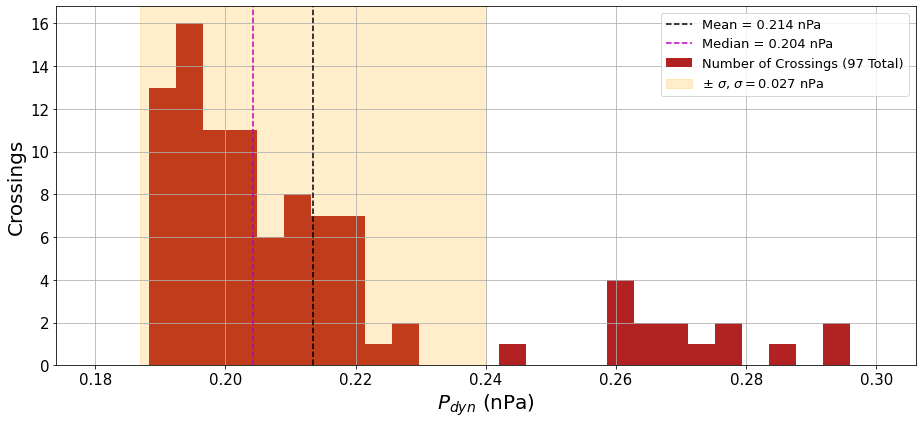

0.2134934452238918
0.2042984665032533
0.02655502379814917


In [45]:
#Histogram of pdyn for MP crossings
bins_pdyns_mp = np.linspace(0.18, 0.30, 30)

xstd1 = (pdyns_mp.mean() - np.std(pdyns_mp))
xstd2 = (pdyns_mp.mean() + np.std(pdyns_mp))



fig = plt.figure(figsize = (25,6))
ax = fig.add_subplot(121)
plt.hist(pdyns_mp, bins_pdyns_mp, stacked = True ,histtype='bar', color = 'firebrick', density=False,linewidth = 3, label = "Number of Crossings (97 Total)")
plt.axvline(pdyns_mp.mean(), color='k', linestyle='dashed', linewidth=1.5, label = 'Mean = 0.214 nPa')
plt.axvline(np.median(pdyns_mp), color='m', linestyle='dashed', linewidth=1.5, label = 'Median = 0.204 nPa')
ax.axvspan(xstd1, xstd2, alpha=0.2, color='orange', label = "$\pm$ $\sigma$, $\sigma = 0.027$ nPa")
plt.xlabel('$P_{dyn}$ (nPa)', fontsize = 20)
plt.ylabel('Crossings', fontsize = 20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.grid()
plt.legend(fontsize=13)

plt.tight_layout()
plt.show()

print(pdyns_mp.mean())
print(np.median(pdyns_mp))
print(np.std(pdyns_mp))

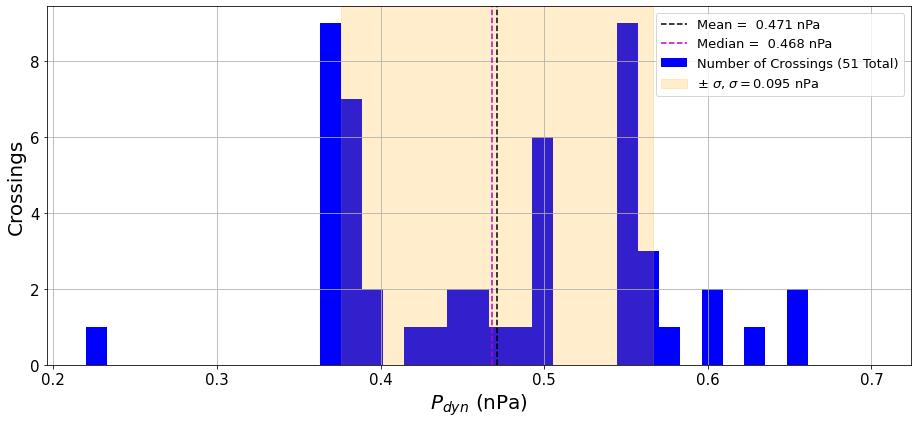

0.47115686274509805
0.468
0.09512393825622088


In [46]:
#Manually storing pdyn for BS crossings in an array
pdyns_bs = np.array([0.229, 0.633, 0.609, 0.609, 0.575, 0.397, 0.397, 0.381, 0.381, 0.381, 0.377, 0.377, 0.377, 0.377, 0.374, 0.371, 0.371, 0.371, 0.371, 0.371, 0.368, 0.368, 0.368, 0.425, 0.433, 0.444, 0.448, 0.462, 0.465, 0.468, 0.492, 0.495, 0.496, 0.496, 0.496, 0.496, 0.500, 0.558, 0.558, 0.558, 0.556, 0.556, 0.556, 0.556, 0.556, 0.551, 0.551, 0.551, 0.551, 0.661, 0.661])

bins_pdyns_bs = np.linspace(0.22, 0.7, 38)
xstd3 = (pdyns_bs.mean() - np.std(pdyns_bs))
xstd4 = (pdyns_bs.mean() + np.std(pdyns_bs))

#Histogram of pdyn for MP crossings
fig = plt.figure(figsize = (25,6))
ax = fig.add_subplot(121)
plt.hist(pdyns_bs, bins_pdyns_bs, stacked = True ,histtype='bar', density=False, color = 'blue', linewidth = 3, label = "Number of Crossings (51 Total)")
plt.axvline(pdyns_bs.mean(), color='k', linestyle='dashed', linewidth=1.5, label = 'Mean =  0.471 nPa')
plt.axvline(np.median(pdyns_bs), color='m', linestyle='dashed', linewidth=1.5, label = 'Median =  0.468 nPa')
ax.axvspan(xstd3, xstd4, alpha=0.2, color='orange', label = "$\pm$ $\sigma$, $\sigma = 0.095$ nPa")
plt.xlabel('$P_{dyn}$ (nPa)', fontsize = 20)
plt.ylabel('Crossings', fontsize = 20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.grid()
plt.legend(fontsize=13)

plt.tight_layout()
plt.show()

print(pdyns_bs.mean())
print(np.median(pdyns_bs))
print(np.std(pdyns_bs))




# Plot of Z against sqrt(x^2 + Y^2)

In [47]:

def sqrt_xy(x,y):
    return np.sqrt(x**2 + y**2)

In [48]:
new_coords = sqrt_xy(XcoordJSO, YcoordJSO)
print(new_coords)

[315.17956714 315.15337333 315.12717954 ...  14.02843191  14.06635362
  14.10417757]


In [49]:
new_coords1 = sqrt_xy(XcoordJSO1, YcoordJSO1)
print(new_coords1)

[111.94974301  82.53601909  78.18891935  77.86813046  77.1537693
  74.49351977  71.69500859  80.12976773  81.84373362  83.4824466
  83.82213138  71.24291612  96.72549216  97.09180061  98.46419508
  99.49550715 100.15681804 100.17279811 103.50255256 105.36492519
 105.79129751 107.33188842 107.75519244 108.51191203 112.38070587
 112.78684176 112.77880508 112.77277807 112.68652521 112.65946969
 112.62340595 112.51326371 112.5032535  109.54677765 109.35288144
 109.27692294 107.49401468 107.12226029 107.06729647 107.05130737
 101.1524673  100.54589513 100.09820855  99.46924701  99.2007341
  98.29566356  97.99577129  80.4422997   82.2688352   83.17602192
  89.89674448 104.87873139 107.95334672 110.58230783 111.03280063
 111.33277985 111.49478166 112.1765614  112.25295438 112.37118823
 112.36353374 110.26864324 108.64362115 107.28822888 107.08236026
 106.34712581 106.2296946  105.37556265 105.08775838 104.83874947
 100.38995397 105.77814675 106.37553033 106.37553033 108.21516104
 108.24901669

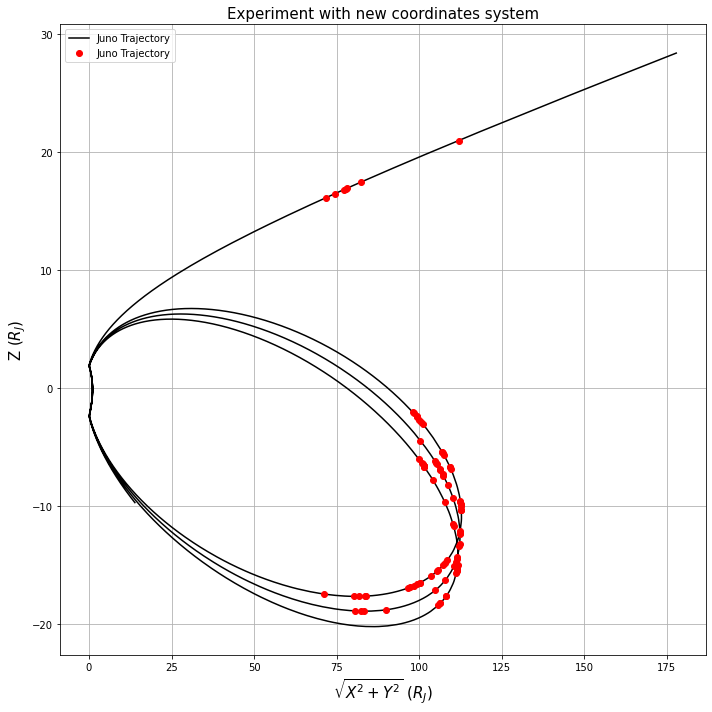

In [50]:
plt.figure(figsize = (10,10))
plt.plot(new_coords[5000:56000],ZcoordJSO[5000:56000], color = 'k', label = 'Juno Trajectory')
plt.plot(new_coords1[0:97],ZcoordJSO1[0:97], 'o', color = 'r', label = 'Juno Trajectory')
#plt.ylim(-140,0)
#plt.xlim(-60,60)
plt.title('Experiment with new coordinates system', fontsize = 15)
plt.xlabel('$\sqrt{X^2 + Y^2}$ $(R_J)$' ,fontsize = 15)
plt.ylabel('Z $(R_J)$',fontsize = 15)
plt.grid()
plt.legend()

plt.tight_layout()

plt.show()

# An Example of how the crossings are determined with Bmag data

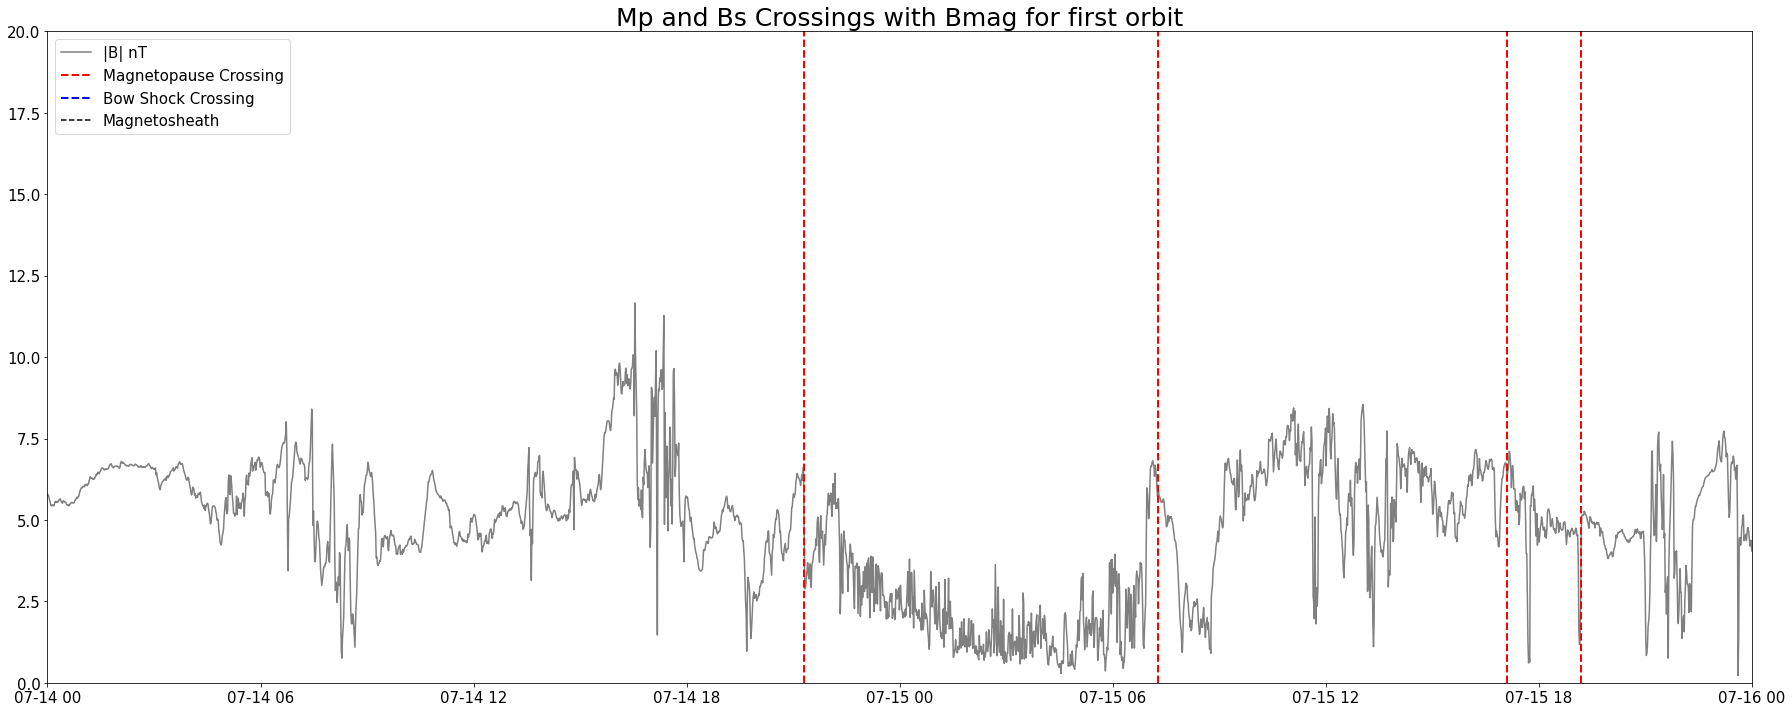

In [51]:
#The Bmag data for the first orbit with mp and bs crossings overlayed
plt.figure(figsize=(25,10))
plt.plot(time_table[0: 200000], Bmag[0: 200000], "-", color = 'gray', label = "|B| nT" )
plt.axvline(x = datetime.datetime(2016, 9, 6, 11, 2), color='r', linestyle='dashed', linewidth=2, label = 'Magnetopause Crossing')
plt.axvline(x = datetime.datetime(2016, 9, 8, 23, 56), color='r', linestyle='dashed', linewidth=2)
plt.axvline(x = datetime.datetime(2016, 7, 17, 15, 33), color='b', linestyle='dashed', linewidth=2, label = 'Bow Shock Crossing')
plt.axvline(x = datetime.datetime(2016, 7, 18, 1, 2), color='b', linestyle='dashed', linewidth=2)
plt.axvline(x = datetime.datetime(2016, 7, 18, 2, 21), color='b', linestyle='dashed', linewidth=2)
plt.axvline(x = datetime.datetime(2016, 7, 18, 21, 18), color='b', linestyle='dashed', linewidth=2)
plt.axvline(x = datetime.datetime(2016, 7, 25, 22, 5), color='b', linestyle='dashed', linewidth=2)
plt.axvline(x = datetime.datetime(2016, 7, 25, 22, 50), color='b', linestyle='dashed', linewidth=2)
plt.axvline(x = datetime.datetime(2016, 7, 27, 9, 34), color='b', linestyle='dashed', linewidth=2)
plt.axvline(x = datetime.datetime(2016, 7, 27, 9, 37), color='b', linestyle='dashed', linewidth=2)
plt.axvline(x = datetime.datetime(2016, 7, 27, 9, 47), color='b', linestyle='dashed', linewidth=2)
plt.axvline(x = datetime.datetime(2016, 7, 27, 11, 38), color='b', linestyle='dashed', linewidth=2)
plt.axvline(x = datetime.datetime(2016, 7, 27, 11, 45), color='b', linestyle='dashed', linewidth=2)
plt.axvline(x = datetime.datetime(2016, 7, 27, 11, 51), color='b', linestyle='dashed', linewidth=2)
plt.axvline(x = datetime.datetime(2016, 7, 27, 23, 41), color='b', linestyle='dashed', linewidth=2)
plt.axvline(x = datetime.datetime(2016, 7, 28, 10, 28), color='b', linestyle='dashed', linewidth=2)
plt.axvline(x = datetime.datetime(2016, 7, 28, 11, 11), color='b', linestyle='dashed', linewidth=2)
plt.axvline(x = datetime.datetime(2016, 7, 28, 11, 36), color='b', linestyle='dashed', linewidth=2)
plt.axvline(x = datetime.datetime(2016, 7, 28, 12, 3), color='b', linestyle='dashed', linewidth=2)
plt.axvline(x = datetime.datetime(2016, 7, 28, 12, 10), color='b', linestyle='dashed', linewidth=2)
plt.axvline(x = datetime.datetime(2016, 7, 28, 17, 57), color='b', linestyle='dashed', linewidth=2)
plt.axvline(x = datetime.datetime(2016, 7, 28, 20, 39), color='b', linestyle='dashed', linewidth=2)
plt.axvline(x = datetime.datetime(2016, 7, 28, 12, 56), color='b', linestyle='dashed', linewidth=2)
plt.axvline(x = datetime.datetime(2016, 7, 28, 21, 9), color='b', linestyle='dashed', linewidth=2)
plt.axvline(x = datetime.datetime(2016, 8, 8, 1, 39), color='b', linestyle='dashed', linewidth=2)
plt.axvline(x = datetime.datetime(2016, 8, 8, 3, 39), color='b', linestyle='dashed', linewidth=2)
plt.axvline(x = datetime.datetime(2016, 8, 8, 22, 40), color='b', linestyle='dashed', linewidth=2)
plt.axvline(x = datetime.datetime(2016, 8, 9, 3, 22), color='b', linestyle='dashed', linewidth=2)
plt.axvline(x = datetime.datetime(2016, 8, 9, 16, 2), color='b', linestyle='dashed', linewidth=2)
plt.axvline(x = datetime.datetime(2016, 8, 9, 20, 37), color='b', linestyle='dashed', linewidth=2)
plt.axvline(x = datetime.datetime(2016, 8, 9, 23, 10), color='b', linestyle='dashed', linewidth=2)
plt.axvline(x = datetime.datetime(2016, 8, 10, 19, 45), color='b', linestyle='dashed', linewidth=2)
plt.axvline(x = datetime.datetime(2016, 8, 10, 21, 56), color='b', linestyle='dashed', linewidth=2)
plt.axvline(x = datetime.datetime(2016, 8, 10, 23, 39), color='b', linestyle='dashed', linewidth=2)
plt.axvline(x = datetime.datetime(2016, 8, 10, 19, 49), color='b', linestyle='dashed', linewidth=2)
plt.axvline(x = datetime.datetime(2016, 8, 11, 0, 3), color='b', linestyle='dashed', linewidth=2)
plt.axvline(x = datetime.datetime(2016, 8, 11, 0, 12), color='b', linestyle='dashed', linewidth=2)
plt.axvline(x = datetime.datetime(2016, 8, 11, 1, 38), color='b', linestyle='dashed', linewidth=2)
plt.axvline(x = datetime.datetime(2016, 7, 14, 21, 18), color='r', linestyle='dashed', linewidth=2)
plt.axvline(x = datetime.datetime(2016, 7, 15, 7, 16), color='r', linestyle='dashed', linewidth=2)
plt.axvline(x = datetime.datetime(2016, 7, 15, 17, 6), color='r', linestyle='dashed', linewidth=2)
plt.axvline(x = datetime.datetime(2016, 7, 15, 19, 11), color='r', linestyle='dashed', linewidth=2)
plt.axvline(x = datetime.datetime(2016, 7, 16, 23, 7), color='r', linestyle='dashed', linewidth=2)
plt.axvline(x = datetime.datetime(2016, 7, 19, 17, 26), color='r', linestyle='dashed', linewidth=2)
plt.axvline(x = datetime.datetime(2016, 7, 19, 20, 43), color='r', linestyle='dashed', linewidth=2)
plt.axvline(x = datetime.datetime(2016, 7, 20, 9, 18), color='r', linestyle='dashed', linewidth=2)
plt.axvline(x = datetime.datetime(2016, 7, 20, 19, 16), color='r', linestyle='dashed', linewidth=2)
plt.axvline(x = datetime.datetime(2016, 7, 21, 1, 49), color='r', linestyle='dashed', linewidth=2)
plt.axvline(x = datetime.datetime(2016, 7, 21, 2, 2), color='r', linestyle='dashed', linewidth=2)
plt.axvline(x = datetime.datetime(2016, 7, 22, 14, 31), color='r', linestyle='dashed', linewidth=2)
plt.axvline(x = datetime.datetime(2016, 7, 23, 14, 6), color='r', linestyle='dashed', linewidth=2)
plt.axvline(x = datetime.datetime(2016, 7, 23, 19, 54), color='r', linestyle='dashed', linewidth=2)
plt.axvline(x = datetime.datetime(2016, 7, 24, 18, 47), color='r', linestyle='dashed', linewidth=2)
plt.axvline(x = datetime.datetime(2016, 7, 25, 1, 12), color='r', linestyle='dashed', linewidth=2)
plt.axvline(x = datetime.datetime(2016, 7, 25, 14, 33), color='r', linestyle='dashed', linewidth=2)
plt.axvline(x = datetime.datetime(2016, 7, 30, 0, 22), color='r', linestyle='dashed', linewidth=2)
plt.axvline(x = datetime.datetime(2016, 8, 1, 19, 36), color='r', linestyle='dashed', linewidth=2)
plt.axvline(x = datetime.datetime(2016, 8, 1, 20, 57), color='r', linestyle='dashed', linewidth=2)
plt.axvline(x = datetime.datetime(2016, 8, 1, 21, 55), color='r', linestyle='dashed', linewidth=2)
plt.axvline(x = datetime.datetime(2016, 8, 2, 8, 13), color='r', linestyle='dashed', linewidth=2)
plt.axvline(x = datetime.datetime(2016, 8, 2, 10, 50), color='r', linestyle='dashed', linewidth=2)
plt.axvline(x = datetime.datetime(2016, 8, 2, 13, 59), color='r', linestyle='dashed', linewidth=2)
plt.axvline(x = datetime.datetime(2016, 8, 2, 22, 49), color='r', linestyle='dashed', linewidth=2)
plt.axvline(x = datetime.datetime(2016, 8, 6, 19, 56), color='r', linestyle='dashed', linewidth=2)
plt.axvline(x = datetime.datetime(2016, 8, 6, 23, 50), color='r', linestyle='dashed', linewidth=2)
plt.axvline(x = datetime.datetime(2016, 8, 7, 1, 20), color='r', linestyle='dashed', linewidth=2)
plt.axvline(x = datetime.datetime(2016, 8, 8, 8, 44), color='r', linestyle='dashed', linewidth=2)
plt.axvline(x = datetime.datetime(2016, 8, 8, 14, 35), color='r', linestyle='dashed', linewidth=2)
plt.axvline(x = datetime.datetime(2016, 8, 8, 15, 26), color='r', linestyle='dashed', linewidth=2)
plt.axvline(x = datetime.datetime(2016, 8, 8, 15, 38), color='r', linestyle='dashed', linewidth=2)
plt.axvline(x = datetime.datetime(2016, 8, 11, 17, 12), color='r', linestyle='dashed', linewidth=2)
plt.axvline(x = datetime.datetime(2016, 8, 11, 23, 25), color='r', linestyle='dashed', linewidth=2)
plt.axvline(x = datetime.datetime(2016, 8, 12, 3, 56), color='r', linestyle='dashed', linewidth=2)
plt.axvline(x = datetime.datetime(2016, 8, 12, 10, 5), color='r', linestyle='dashed', linewidth=2)
plt.axvline(x = datetime.datetime(2016, 8, 12, 12, 39), color='r', linestyle='dashed', linewidth=2)
plt.axvline(x = datetime.datetime(2016, 8, 12, 21, 11), color='r', linestyle='dashed', linewidth=2)
plt.axvline(x = datetime.datetime(2016, 8, 12, 23, 55), color='r', linestyle='dashed', linewidth=2)
plt.plot((datetime.datetime(2016, 9, 6, 11, 2), datetime.datetime(2016, 9, 8, 23, 56)), (17.8, 17.8), 'k-', linestyle = 'dashed', label = 'Magnetosheath')
plt.legend(fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlim(datetime.datetime(2016, 7, 14), datetime.datetime(2016, 7, 16))
plt.ylim(0,20)
plt.title('Mp and Bs Crossings with Bmag for first orbit', fontsize = 25)

plt.tight_layout()
plt.show()

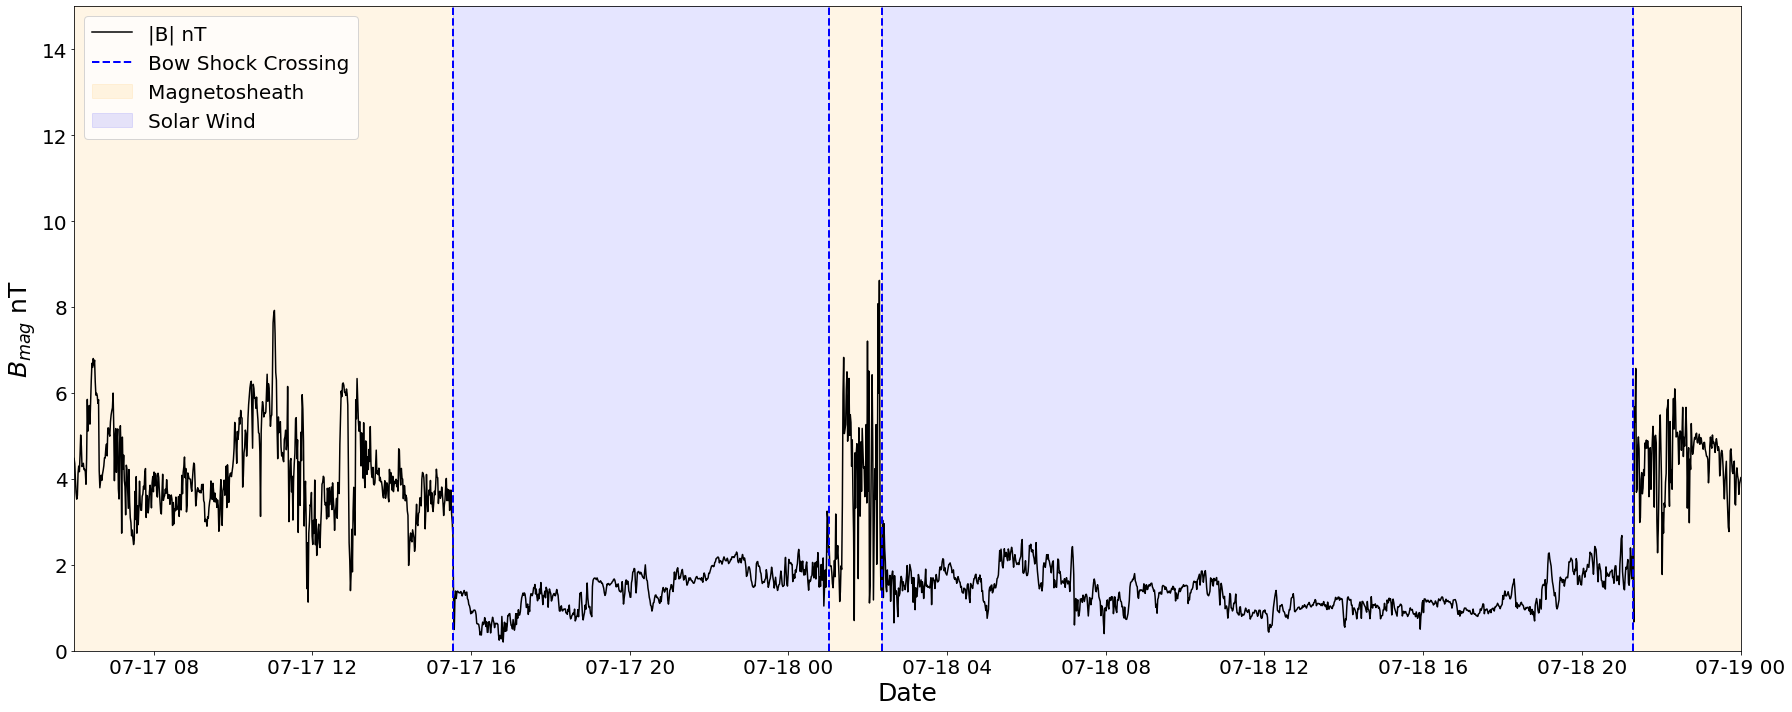

In [52]:
#The Bmag data for the first orbit with mp and bs crossings overlayed
plt.figure(figsize=(25,10))

plt.plot(time_table[0: 200000], Bmag[0: 200000], "-", color = 'k', label = "|B| nT" )
plt.axvline(x = datetime.datetime(2016, 7, 17, 15, 33), color='b', linestyle='dashed', linewidth=2, label = 'Bow Shock Crossing')
plt.axvline(x = datetime.datetime(2016, 7, 18, 1, 2), color='b', linestyle='dashed', linewidth=2)
plt.axvline(x = datetime.datetime(2016, 7, 18, 2, 21), color='b', linestyle='dashed', linewidth=2)
plt.axvline(x = datetime.datetime(2016, 7, 18, 21, 18), color='b', linestyle='dashed', linewidth=2)
plt.axvspan(datetime.datetime(2016, 7, 15, 15, 33), datetime.datetime(2016, 7, 17, 15, 33), alpha=0.1, color='orange', label = "Magnetosheath")
plt.axvspan(datetime.datetime(2016, 7, 17, 15, 33), datetime.datetime(2016, 7, 18, 1, 2), alpha=0.1, color='blue', label = "Solar Wind")
plt.axvspan(datetime.datetime(2016, 7, 18, 1, 2), datetime.datetime(2016, 7, 18, 2, 21), alpha=0.1, color='orange')
plt.axvspan(datetime.datetime(2016, 7, 18, 2, 21), datetime.datetime(2016, 7, 18, 21, 18), alpha=0.1, color='blue')
plt.axvspan(datetime.datetime(2016, 7, 18, 21, 18), datetime.datetime(2016, 7, 22, 2, 21), alpha=0.1, color='orange')
plt.legend(fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlim(datetime.datetime(2016, 7, 17, 6), datetime.datetime(2016, 7, 19))
plt.ylim(0,15)
plt.xlabel("Date", fontsize = 25)
plt.ylabel("$B_{mag}$ nT", fontsize = 25)


plt.tight_layout()
plt.show()

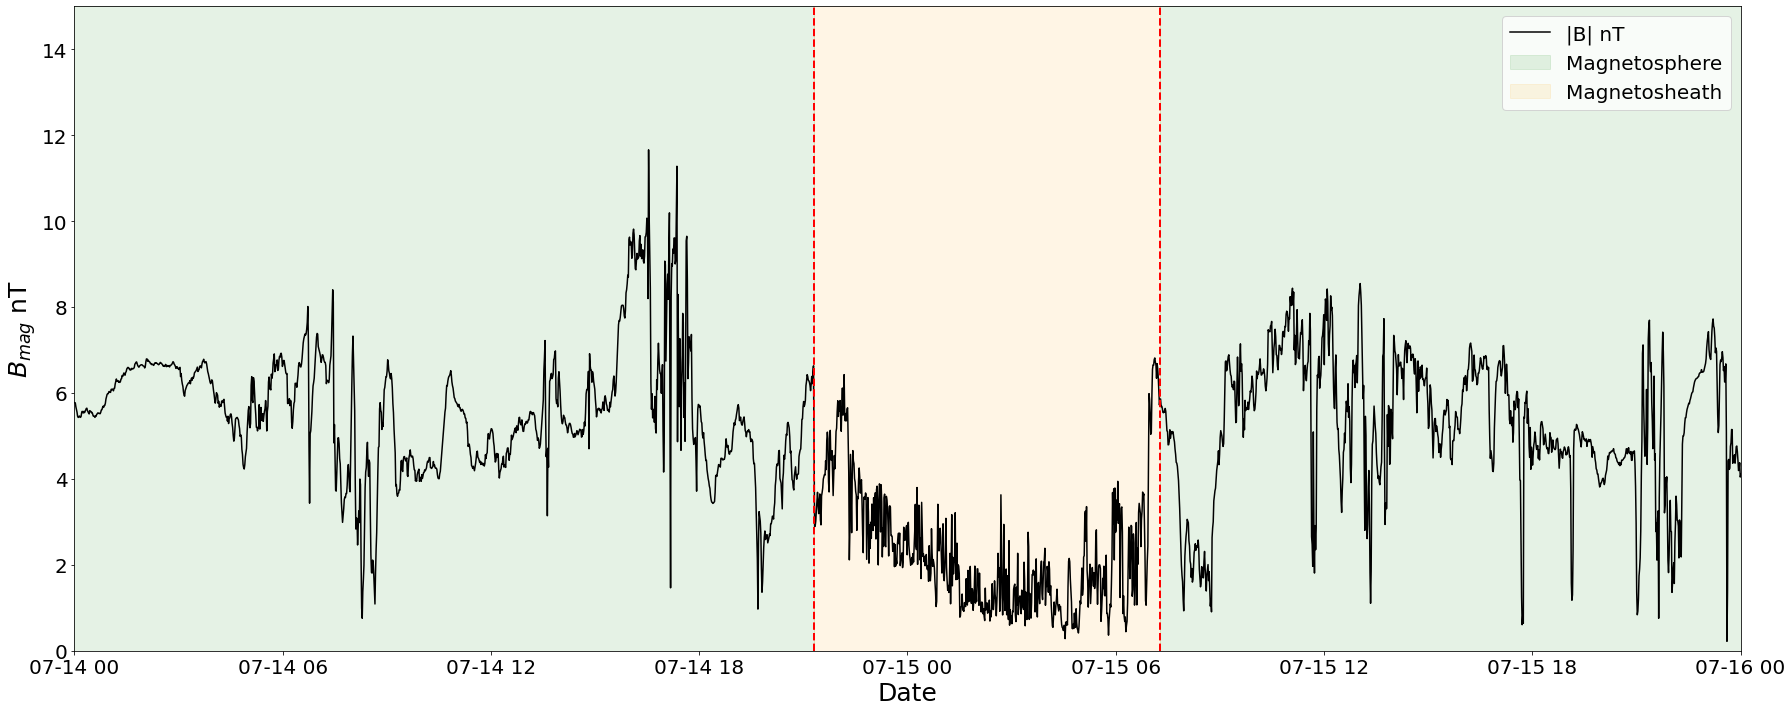

In [53]:
#The Bmag data for the first orbit with mp and bs crossings overlayed
plt.figure(figsize=(25,10))
plt.plot(time_table[0: 200000], Bmag[0: 200000], "-", color = 'k', label = "|B| nT" )
plt.axvline(x = datetime.datetime(2016, 7, 14, 21, 18), color='r', linestyle='dashed', linewidth=2)
plt.axvline(x = datetime.datetime(2016, 7, 15, 7, 16), color='r', linestyle='dashed', linewidth=2)
plt.axvspan(datetime.datetime(2016, 7, 12, 15, 33), datetime.datetime(2016, 7, 14, 21, 18), alpha=0.1, color='green', label = "Magnetosphere")
plt.axvspan(datetime.datetime(2016, 7, 14, 21, 18), datetime.datetime(2016, 7, 15, 7, 16), alpha=0.1, color='orange', label = "Magnetosheath")
plt.axvspan(datetime.datetime(2016, 7, 15, 7, 16), datetime.datetime(2016, 7, 18, 21, 18), alpha=0.1, color='green')
plt.legend(fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlim(datetime.datetime(2016, 7, 14), datetime.datetime(2016, 7, 16))
plt.ylim(0,15)
plt.xlabel("Date", fontsize = 25)
plt.ylabel("$B_{mag}$ nT", fontsize = 25)

plt.tight_layout()
plt.show()